# Import Library

In [47]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma
from bokeh.models import ColumnDataSource
import plotly.graph_objects as px
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import PolynomialFeatures

# Libraries for model training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error
from numpy import newaxis
import math
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import scipy.stats as stats

import kerastuner as kt
from sklearn.metrics import r2_score

These are all necessary libraries that we need

# Data Preparation

In [48]:
#importing our dataset as a pandas dataframe
df = pd.read_csv('prices-split-adjusted.csv')
df2 = pd.read_csv('prices-split-adjusted.csv') #this is for if we need to check original dataframe

In [49]:
df #taking a look to dataframe 


date symbol        open       close         low        high  \
0       2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1       2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2       2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3       2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4       2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   
...            ...    ...         ...         ...         ...         ...   
851259  2016-12-30    ZBH  103.309998  103.199997  102.849998  103.930000   
851260  2016-12-30   ZION   43.070000   43.040001   42.689999   43.310001   
851261  2016-12-30    ZTS   53.639999   53.529999   53.270000   53.740002   
851262  2016-12-30    AIV   44.730000   45.450001   44.410000   45.590000   
851263  2016-12-30    FTV   54.200001   53.630001   53.389999   54.480000   

           volume  
0       2163600.0  
1       2386400.0  
2       2489500.0  
3       2006300.0  
4       1408600.0  
...           ...  
851259   973800.0  
851260  1938100.0  
851261  1701200.0  
851262  1380900.0  
851263   705100.0  

[851264 rows x 7 columns]

In [50]:
df.iloc[0][2]   

123.43

iloc is for chosing spesific data this means and this code gives 0. rows and 3. coloumn on this dataframe its 123.43

In [51]:
#This code is for chck there is no NaN value at this dataset
nan_row = df[df.isna().any(axis=1)]
nan_row

Empty DataFrame
Columns: [date, symbol, open, close, low, high, volume]
Index: []

This code shows the NaN variables in this Df, there is no data printed that means we dont have any NaN data.

In [52]:
#checking for duplicated values
df.duplicated().sum()

0

This code shows the dublicated variables in this Df, there is no data printed that means we dont have any dublicated data.

In [53]:
df.describe() #this function describe some analytic information about our data frame

open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       64.993618      65.011913      64.336541      65.639748   
std        75.203893      75.201216      74.459518      75.906861   
min         1.660000       1.590000       1.500000       1.810000   
25%        31.270000      31.292776      30.940001      31.620001   
50%        48.459999      48.480000      47.970001      48.959999   
75%        75.120003      75.139999      74.400002      75.849998   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08

The code df.describe() generates a basic statistical summary of a pandas DataFrame. This summary includes key statistical information about the data, such as:

    1. Count: It provides the total number of observations in the dataset.
    2. Mean: It gives the arithmetic mean (average) of the data.
    3. Std: It provides the standard deviation of the data, measuring how spread out the data is.
    4. Min: It shows the minimum value in the data.
    5. 25%: It displays the lower quartile (25th percentile) value of the data.
    6. 50%: It represents the median or the middle value (50th percentile) of the data.
    7. 75%: It reveals the upper quartile (75th percentile) value of the data.
    8. Max: It presents the maximum value in the data.
    
The output of df.describe() provides these statistics for each numerical column. These statistics are very useful for understanding the data, performing initial analysis, and, for instance, detecting outliers.

##### Correlation matrix and HeatMap

<Axes: >

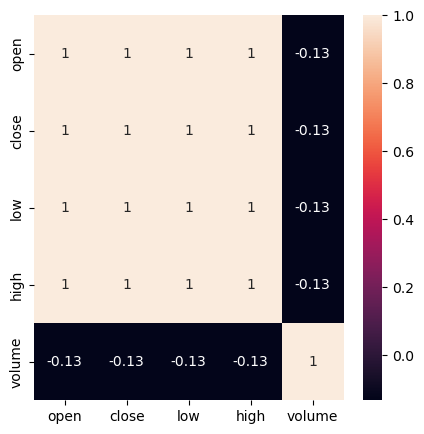

In [54]:
# Selecting only numeric columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']) #this code selects "float64" and "int64" data and 
                                                                    #save this data as name numerical_columns dataframe
df_val = numerical_columns #numerical_columns copies dataframe as df_val
df_numerical_columns = numerical_columns
# Calculating the correlation matrix
cormap = numerical_columns.corr()

# Process of drawing heatmap
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cormap, annot=True)


A correlation matrix is a matrix that measures the relationships between numerical variables in a data frame. The cells of this matrix show the strength and direction of the relationship between two variables. Specifically:

    * If a cell contains a positive value, it indicates a positive relationship between two variables (when one variable    increases, the other also increases).
    * If a cell contains a negative value, it indicates a negative relationship between two variables (when one variable increases, the other decreases).
    * If a cell is close to zero, it indicates that there is not a strong relationship between the two variables.
    
Finally, the code creates a heatmap. A heatmap visually represents the correlation matrix. Each cell is represented by a color tone, allowing users to quickly distinguish between high and low correlations. The annot=True parameter adds numerical values to the cells, displaying the exact values of the correlations.

And as a result we can say that volume column is not correlated with our other columns, that means we can drop volume column because it has no effect for our close values.

In [55]:
df_A = df[df['symbol']=='A']   # Choosin stock values for any company 
df_A

date symbol       open      close        low       high  \
251     2010-01-04      A  22.453504  22.389128  22.267525  22.625180   
718     2010-01-05      A  22.324749  22.145923  22.002861  22.331903   
1186    2010-01-06      A  22.067240  22.067240  22.002861  22.174536   
1654    2010-01-07      A  22.017168  22.038626  21.816881  22.045780   
2122    2010-01-08      A  21.917024  22.031474  21.745350  22.067240   
...            ...    ...        ...        ...        ...        ...   
848764  2016-12-23      A  46.080002  46.200001  45.930000  46.230000   
849264  2016-12-27      A  46.369999  46.509998  46.320000  46.660000   
849764  2016-12-28      A  46.509998  45.720001  45.680000  46.700001   
850264  2016-12-29      A  45.680000  45.639999  45.570000  46.000000   
850764  2016-12-30      A  45.759998  45.560001  45.380001  45.820000   

           volume  
251     3815500.0  
718     4186000.0  
1186    3243700.0  
1654    3095100.0  
2122    3733900.0  
...           ...  
848764   727700.0  
849264  1535500.0  
849764  1177300.0  
850264   891000.0  
850764  1216100.0  

[1762 rows x 7 columns]

df_A is a dataframe include only Company which name is 'A'.

In [56]:
df_YHOO = df[df['symbol']=='YHOO']   # Choosin stock values for any company 
df_YHOO

date symbol       open      close        low       high  \
713     2010-01-04   YHOO  16.940001  17.100000  16.879999  17.200001   
1181    2010-01-05   YHOO  17.219999  17.230000  17.000000  17.230000   
1649    2010-01-06   YHOO  17.170000  17.170000  17.070000  17.299999   
2117    2010-01-07   YHOO  16.809999  16.700001  16.570000  16.900000   
2585    2010-01-08   YHOO  16.680000  16.700001  16.620001  16.760000   
...            ...    ...        ...        ...        ...        ...   
849257  2016-12-23   YHOO  38.459999  38.660000  38.369999  38.810001   
849757  2016-12-27   YHOO  38.590000  38.919998  38.500000  39.070000   
850257  2016-12-28   YHOO  39.119999  38.730000  38.709999  39.220001   
850757  2016-12-29   YHOO  38.759998  38.639999  38.480000  38.930000   
851257  2016-12-30   YHOO  38.720001  38.669998  38.430000  39.000000   

            volume  
713     16587400.0  
1181    11718100.0  
1649    16422000.0  
2117    31816300.0  
2585    15470000.0  
...            ...  
849257   3840100.0  
849757   4240300.0  
850257   4393500.0  
850757   4170200.0  
851257   6431600.0  

[1762 rows x 7 columns]

df_YHOO is a dataframe include only Company which name is 'A'. Most generally we discussed that we can continue wit company 'YHOO'

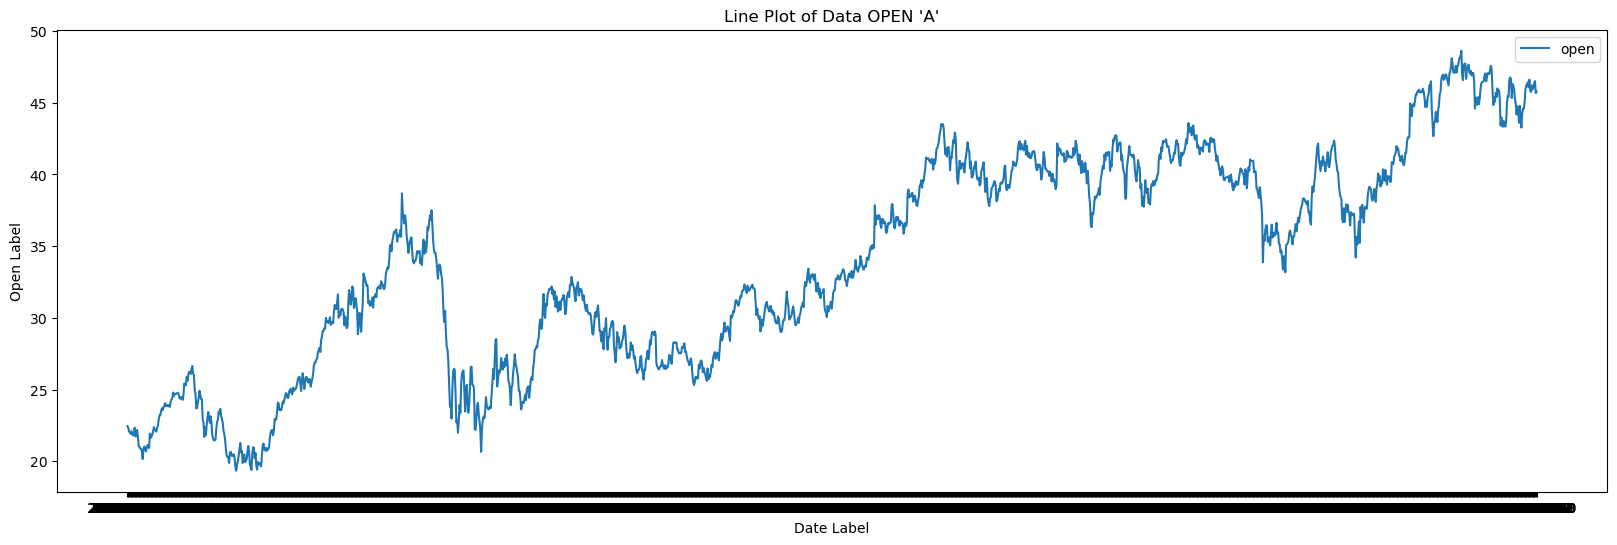

In [57]:
# Define the x-axis variable (e.g., dates or index)
x_variable = df_A['date']  # Assuming the index represents time or dates

# Plot each column in the DataFrame except for 'date', 'symbol', 'low', 'high', and 'volume'
columns_to_plot = df.drop(['date', 'symbol', 'low', 'high', 'volume', 'close'], axis=1).columns

# Set the figure size here
plt.figure(figsize=(20, 6))

# Create line plots for each column
for column in columns_to_plot:
    sns.lineplot(x=x_variable, y=df[column], label=column)

# Show the legend
plt.legend()
plt.xlabel("Date Label")  # Replace with your x-axis label
plt.ylabel("Open Label")  # Replace with your y-axis label
plt.title("Line Plot of Data OPEN 'A'")
plt.show()


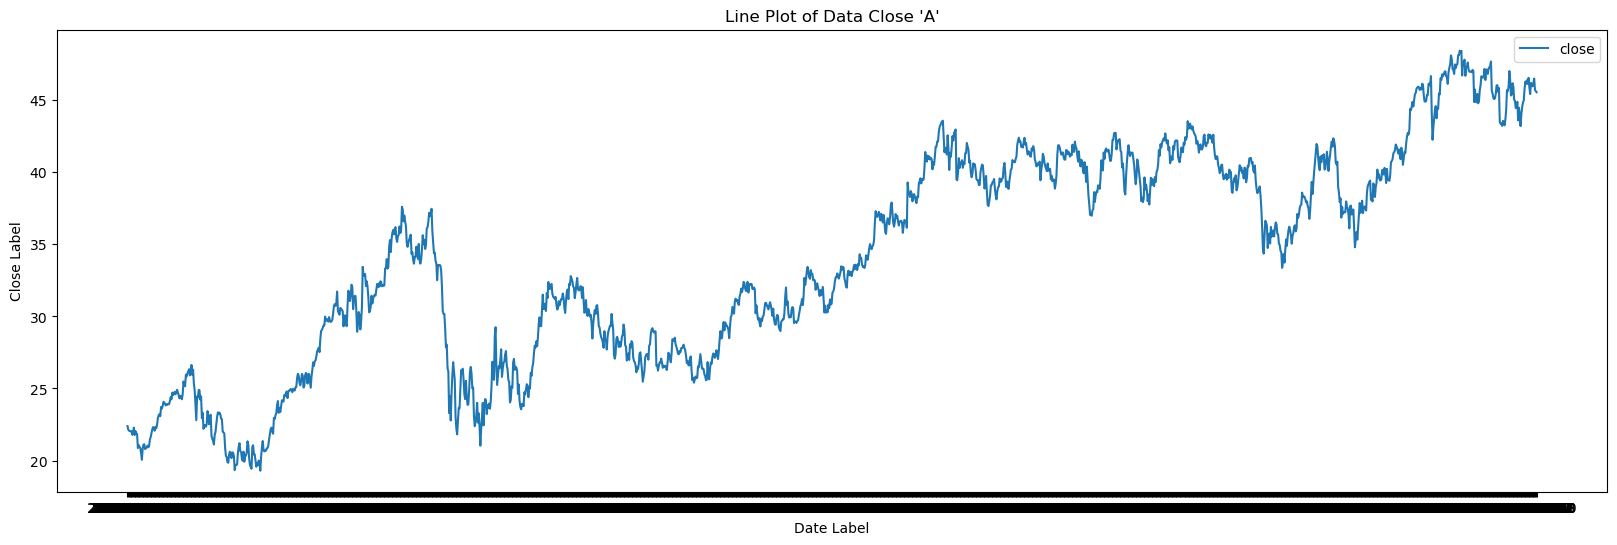

In [58]:
# Define the x-axis variable (e.g., dates or index)
x_variable = df_A['date']  # Assuming the index represents time or dates

# Plot each column in the DataFrame except for 'date', 'symbol', 'low', 'high', and 'volume'
columns_to_plot = df.drop(['date', 'symbol', 'low', 'high', 'volume', 'open'], axis=1).columns

# Set the figure size here
plt.figure(figsize=(20, 6))

# Create line plots for each column
for column in columns_to_plot:
    sns.lineplot(x=x_variable, y=df[column], label=column)

# Show the legend
plt.legend()
plt.xlabel("Date Label")  # Replace with your x-axis label
plt.ylabel("Close Label")  # Replace with your y-axis label
plt.title("Line Plot of Data Close 'A'")
plt.show()

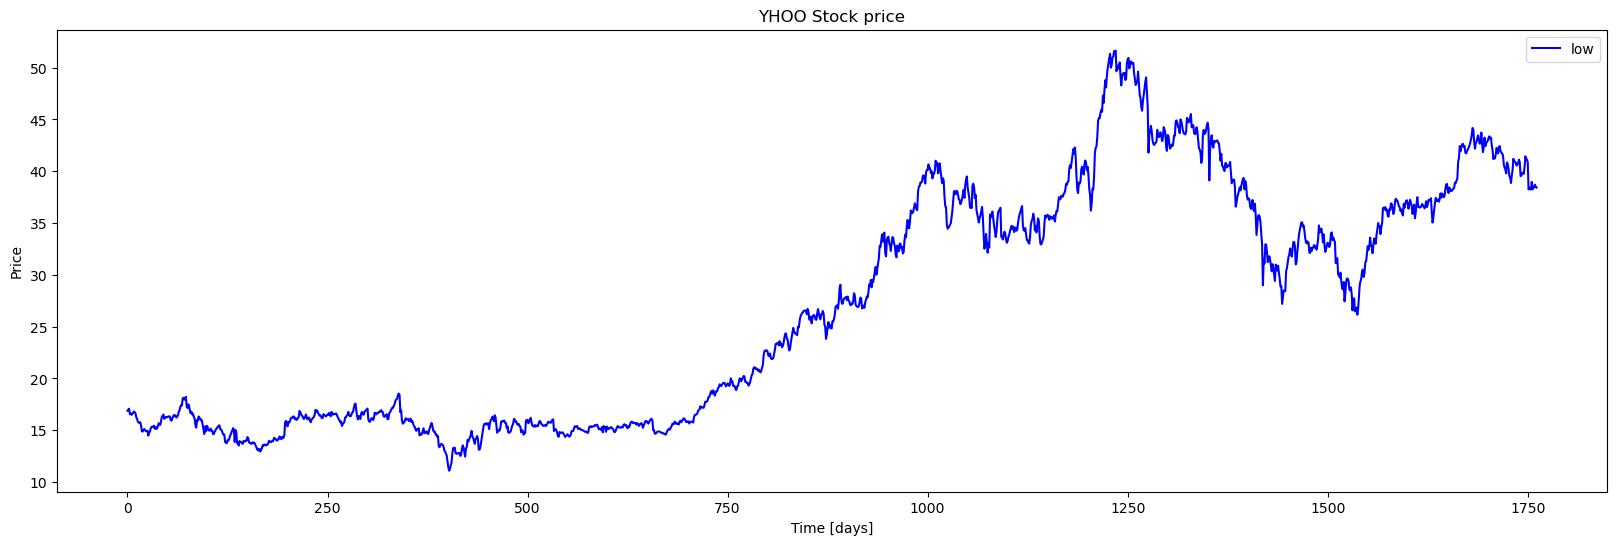

In [59]:
#plotting YHOO low & high price
plt.figure(figsize = (20, 6))
plt.plot(df_YHOO.low.values, color='blue', label='low')
plt.title('YHOO Stock price')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')

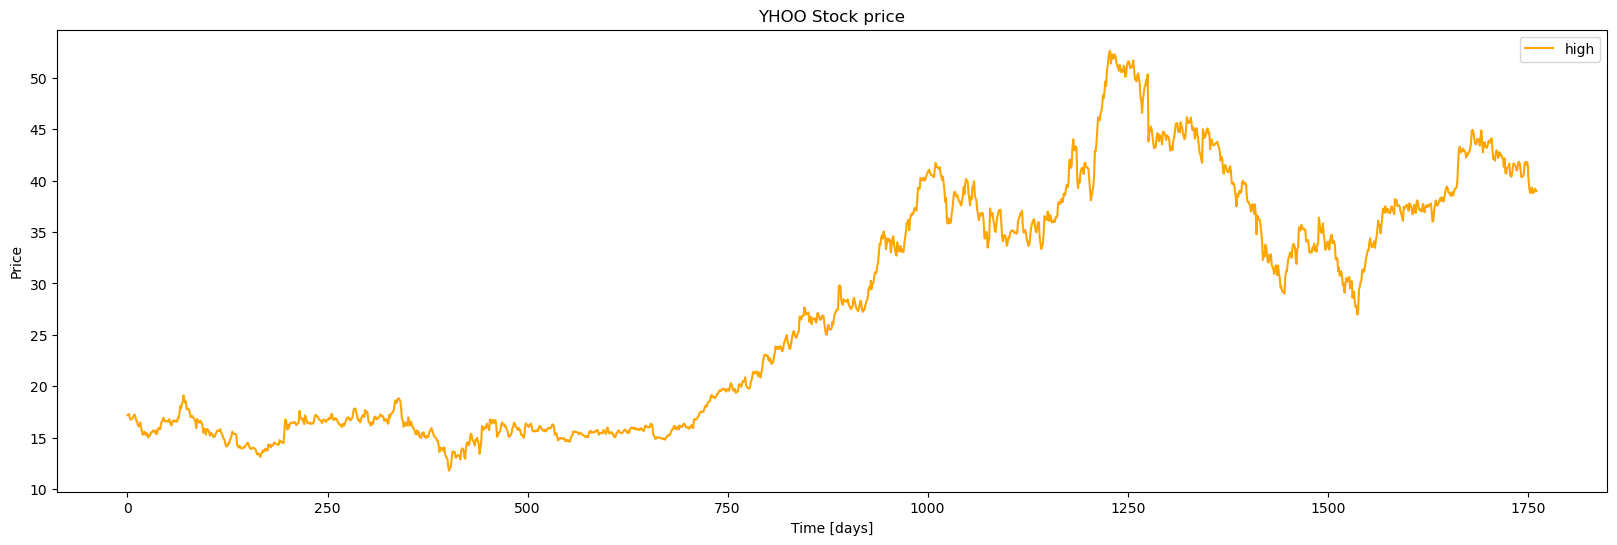

In [60]:
#plotting YHOO low & high price
plt.figure(figsize = (20, 6))
plt.plot(df_YHOO.high.values, color='orange', label='high')
plt.title('YHOO Stock price')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')

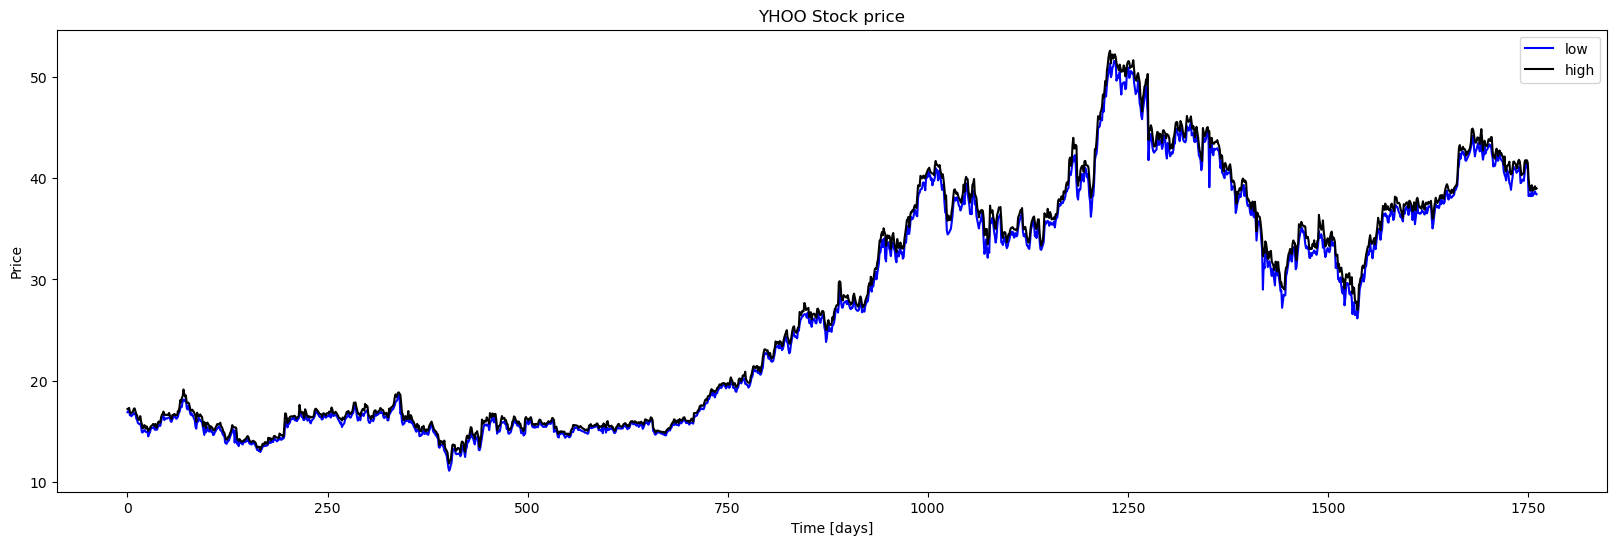

In [61]:
#plotting YHOO low & high price
plt.figure(figsize = (20, 6))
plt.plot(df_YHOO.low.values, color='blue', label='low')
plt.plot(df_YHOO.high.values, color='black', label='high')
plt.title('YHOO Stock price')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')

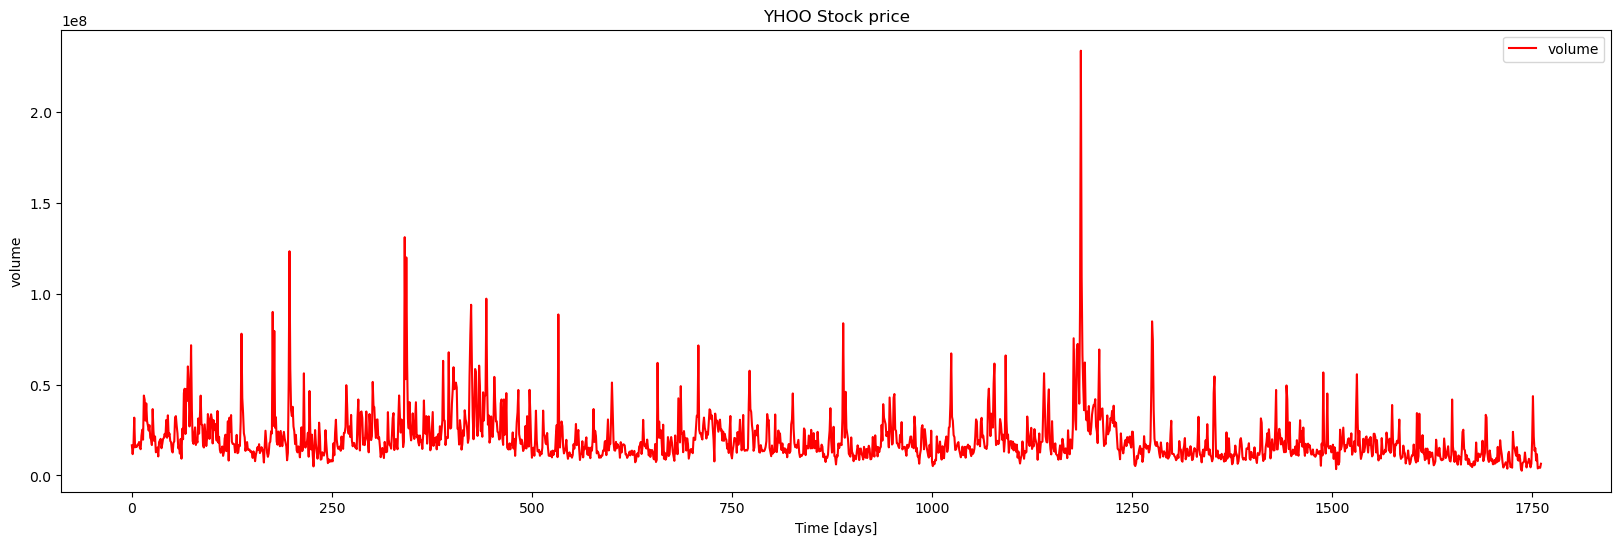

In [62]:
#plotting YHOO low & high price
plt.figure(figsize = (20, 6))
plt.plot(df_YHOO.volume.values, color='red', label='volume')
plt.title('YHOO Stock price')
plt.xlabel('Time [days]')
plt.ylabel('volume')
plt.legend(loc='best')

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ANILERMAN\AppData\Local\Temp\ipykernel_7444\500853190.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


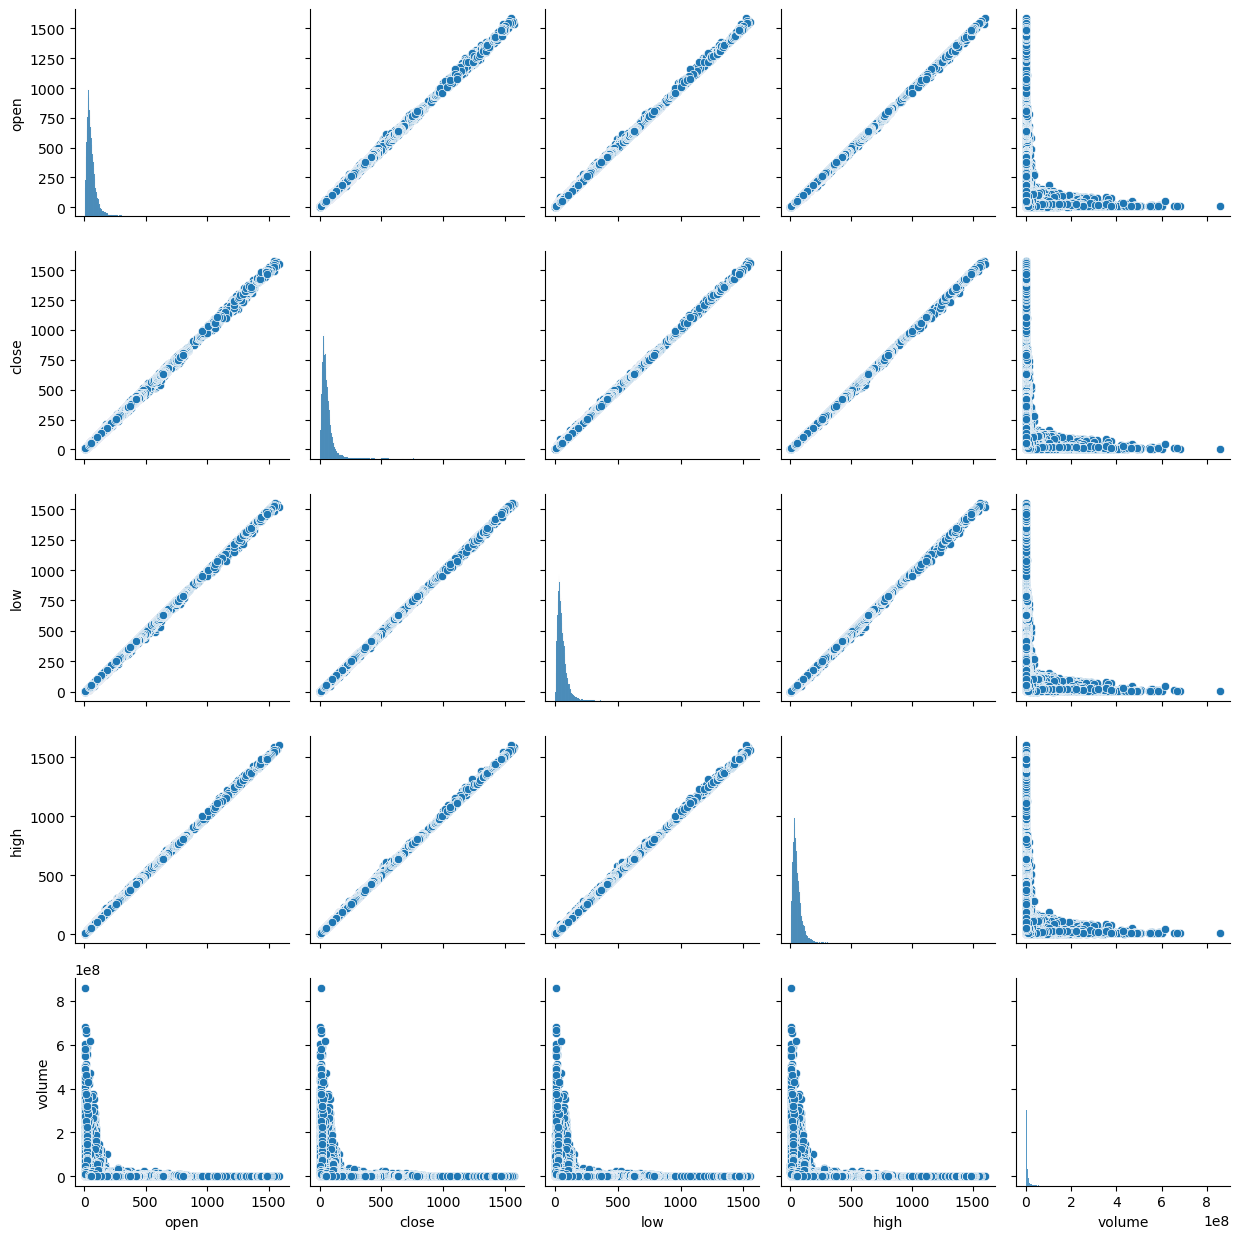

In [17]:
sns.pairplot(df)  #plot a correlation chart comparing each column to each other
plt.tight_layout()

In [18]:
df_val = numerical_columns.drop('volume', axis=1) #with this code we drop the volume columns 
                                                    #because this is less coreleated others
df_val

open       close         low        high
0       123.430000  125.839996  122.309998  126.250000
1       125.239998  119.980003  119.940002  125.540001
2       116.379997  114.949997  114.930000  119.739998
3       115.480003  116.620003  113.500000  117.440002
4       117.010002  114.970001  114.089996  117.330002
...            ...         ...         ...         ...
851259  103.309998  103.199997  102.849998  103.930000
851260   43.070000   43.040001   42.689999   43.310001
851261   53.639999   53.529999   53.270000   53.740002
851262   44.730000   45.450001   44.410000   45.590000
851263   54.200001   53.630001   53.389999   54.480000

[851264 rows x 4 columns]

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ANILERMAN\AppData\Local\Temp\ipykernel_7444\3889687930.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


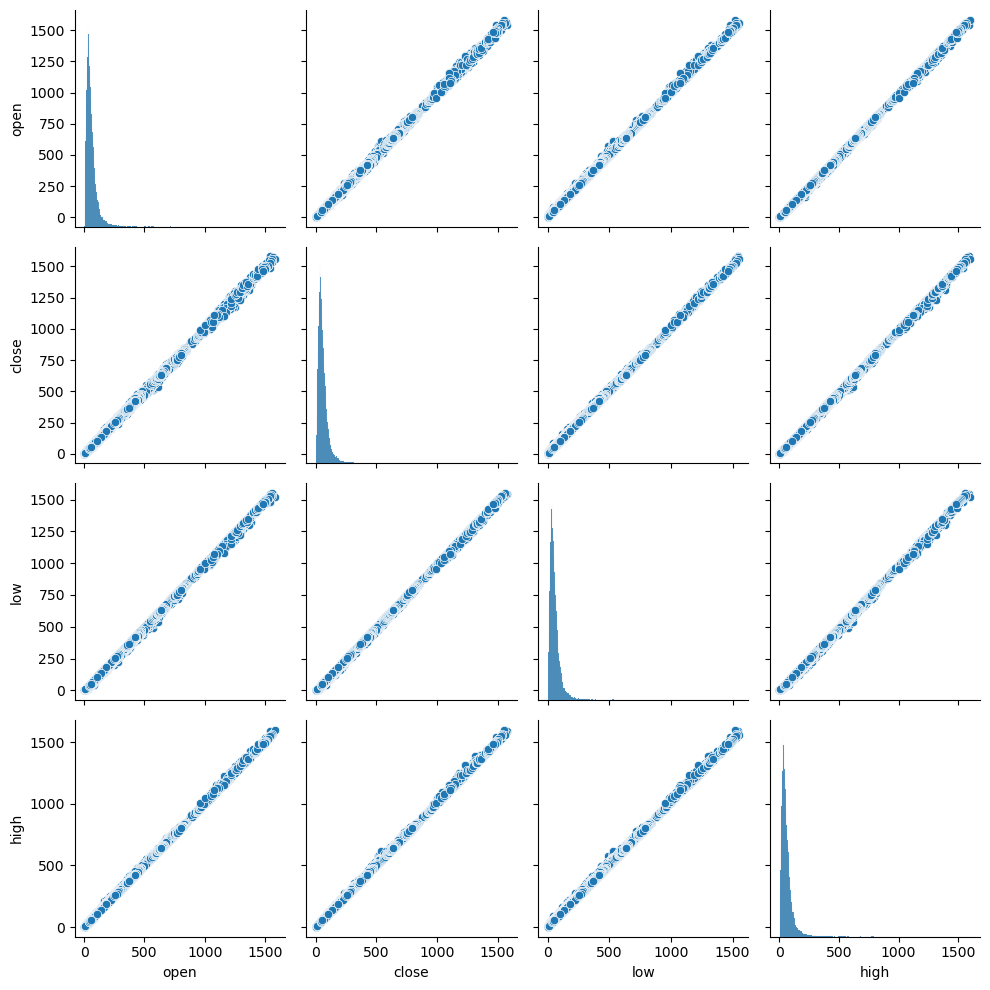

In [19]:
sns.pairplot(df_val) # correlation graph without "volume" columns
plt.tight_layout()

In [63]:
X = df_val.drop(['close'], axis=1) #we dropt "close" columns because we will build a model for predict this columns
y = df_val['close']                #and save this columns to another dataframe to test our prediction
X

open         low        high     volume
0       123.430000  122.309998  126.250000  2163600.0
1       125.239998  119.940002  125.540001  2386400.0
2       116.379997  114.930000  119.739998  2489500.0
3       115.480003  113.500000  117.440002  2006300.0
4       117.010002  114.089996  117.330002  1408600.0
...            ...         ...         ...        ...
851259  103.309998  102.849998  103.930000   973800.0
851260   43.070000   42.689999   43.310001  1938100.0
851261   53.639999   53.270000   53.740002  1701200.0
851262   44.730000   44.410000   45.590000  1380900.0
851263   54.200001   53.389999   54.480000   705100.0

[851264 rows x 4 columns]

In [64]:
import plotly.express as px

# Create a line chart using data
fig = px.line(df_A, x='date', y='open', title='Open Prices Over Time For Company "A"')

# Add range selector for x axis
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1 Day", step="day", stepmode="backward"),
            dict(count=7, label="1 Week", step="day", stepmode="backward"),  # 7 gün olarak ayarlandı
            dict(count=30, label="1 Month", step="day", stepmode="backward"),  # 30 gün olarak ayarlandı
        ])
    ),
    rangeslider=dict(
        visible=True
    )
)

# Show Graph
fig.show()


In [65]:


# Create a line chart using data
fig = px.line(df_A, x='date', y='close', title='Close Prices Over Time For Company "A"', color_discrete_sequence=['orange'])

# Add range selector for x axis
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1 Day", step="day", stepmode="backward"),     # set to 1 day 
            dict(count=7, label="1 Week", step="day", stepmode="backward"),    # set to 7 days
            dict(count=30, label="1 Month", step="day", stepmode="backward"),  # set to 30 days
        ])
    ),
    rangeslider=dict(
        visible=True
    )
)

# show graph
fig.show()

## Value Scaling  

### MinMax Scalling 

1. **Min-Max Scaling (MinMaxScaler):**
   - *Advantages:*
     - Scales data to a specific range (usually [0, 1]), compressing the data into this range.
     - Resistant to outliers.
   - *Disadvantages:*
     - Can compress data if the data distribution has a large range.
     
Min-Max Scaling is useful for most machine learning models, especially when working with optimization algorithms like gradient descent. Ensuring that data falls within the same scale range can aid in faster model training and contribute to better results.

Min-Max Scaling doesn't alter the original distribution of data; it simply transforms it into a specific range. Therefore, it's a common practice to use MinMaxScaler when you need to scale your data into the range of 0 to 1 or when you want it to fall within a particular range.

In [23]:
scaler_MinMaxScaler = MinMaxScaler()
X_MinMaxScaler = pd.DataFrame(scaler_MinMaxScaler.fit_transform(df_val), columns=df_val.columns)
X_MinMaxScaler_with_volume = pd.DataFrame(scaler_MinMaxScaler.fit_transform(df_numerical_columns), columns=df_numerical_columns.columns)
X_MinMaxScaler.head()

open     close       low      high
0  0.076934  0.078812  0.078020  0.077818
1  0.078078  0.075095  0.076490  0.077374
2  0.072480  0.071904  0.073254  0.073747
3  0.071911  0.072964  0.072331  0.072309
4  0.072878  0.071917  0.072712  0.072240

In [24]:
X_MinMaxScaler_with_volume

open     close       low      high    volume
0       0.076934  0.078812  0.078020  0.077818  0.002517
1       0.078078  0.075095  0.076490  0.077374  0.002776
2       0.072480  0.071904  0.073254  0.073747  0.002896
3       0.071911  0.072964  0.072331  0.072309  0.002334
4       0.072878  0.071917  0.072712  0.072240  0.001639
...          ...       ...       ...       ...       ...
851259  0.064222  0.064451  0.065453  0.063860  0.001133
851260  0.026163  0.026292  0.026601  0.025952  0.002255
851261  0.032841  0.032946  0.033434  0.032474  0.001979
851262  0.027212  0.027820  0.027712  0.027378  0.001606
851263  0.033195  0.033009  0.033511  0.032937  0.000820

[851264 rows x 5 columns]

In [25]:
X_MinMaxScaler_pred = X_MinMaxScaler.drop(['close'], axis=1)
y_MinMaxScaler_pred = X_MinMaxScaler['close']
y_MinMaxScaler_pred

0         0.078812
1         0.075095
2         0.071904
3         0.072964
4         0.071917
            ...   
851259    0.064451
851260    0.026292
851261    0.032946
851262    0.027820
851263    0.033009
Name: close, Length: 851264, dtype: float64

In [26]:
X_MinMaxScaler_with_volume_pred = X_MinMaxScaler_with_volume.drop(['close'], axis=1)
y_MinMaxScaler_with_volume_pred = X_MinMaxScaler_with_volume['close']
X_MinMaxScaler_with_volume_pred

open       low      high    volume
0       0.076934  0.078020  0.077818  0.002517
1       0.078078  0.076490  0.077374  0.002776
2       0.072480  0.073254  0.073747  0.002896
3       0.071911  0.072331  0.072309  0.002334
4       0.072878  0.072712  0.072240  0.001639
...          ...       ...       ...       ...
851259  0.064222  0.065453  0.063860  0.001133
851260  0.026163  0.026601  0.025952  0.002255
851261  0.032841  0.033434  0.032474  0.001979
851262  0.027212  0.027712  0.027378  0.001606
851263  0.033195  0.033511  0.032937  0.000820

[851264 rows x 4 columns]

### StandardScaler

2. **Z-Score Standardization (StandardScaler):**
   - *Advantages:*
     - Transforms data to have a mean of 0 and a standard deviation of 1, following a normal distribution.
     - More sensitive to outliers and useful for statistical analysis assuming normal distribution.
   - *Disadvantages:*
     - Can compress data if the data distribution is too large or too small.
     
StandardScaler is a data preprocessing technique used for standardizing features (columns). This technique transforms the data in such a way that the mean of the data becomes 0, and the standard deviation becomes 1. StandardScaler is typically used for the following types of datasets:

    - Data Approximating Normal Distribution
    - Linear Regression
    - K-Means Clustering
    - Artificial Neural Networks (This means we can apply this for our method which is LSTM algorith)

In [27]:
scaler_StandardScaler = StandardScaler()
X_StandardScaler = pd.DataFrame(scaler_StandardScaler.fit_transform(df_val), columns=df_val.columns)
#X_StandardScaler_with_volume = pd.DataFrame(scaler_StandardScaler.fit_transform(df_numerical_columns), columns=df_numerical_columns.columns)
X_StandardScaler.head()

open     close       low      high
0  0.777040  0.808871  0.778591  0.798482
1  0.801108  0.730947  0.746761  0.789129
2  0.683295  0.664060  0.679476  0.712719
3  0.671327  0.686267  0.660271  0.682419
4  0.691672  0.664326  0.668195  0.680970

In [28]:
X_StandardScaler_pred = X_StandardScaler.drop(['close'], axis=1)
y_StandardScaler_pred = X_StandardScaler['close']
y_StandardScaler_pred

0         0.808871
1         0.730947
2         0.664060
3         0.686267
4         0.664326
            ...   
851259    0.507812
851260   -0.292175
851261   -0.152683
851262   -0.260128
851263   -0.151353
Name: close, Length: 851264, dtype: float64

### RobustScaler

3. **Robust Scaling (RobustScaler):**
   - *Advantages:*
     - Transforms data using the median and the interquartile range (IQR), making it robust to outliers.
   - *Disadvantages:*
     - May alter data distribution more than not compressing it.

If scaling data using RobustScaler increases RMSE, the issue is likely related to data quality or the model used. In this case, it may be necessary to improve the data quality or choose a more suitable model.

In [29]:
scaler_RobustScaler = RobustScaler()
X_RobustScaler = pd.DataFrame(scaler_RobustScaler.fit_transform(df_val), columns=df_val.columns)
#X_RobustScaler_with_volume = pd.DataFrame(scaler_RobustScaler.fit_transform(df_numerical_columns), columns=df_numerical_columns.columns)
X_RobustScaler.head()

open     close       low      high
0  1.709692  1.764308  1.710538  1.747457
1  1.750969  1.630662  1.656006  1.731404
2  1.548917  1.515945  1.540727  1.600271
3  1.528392  1.554032  1.507823  1.548271
4  1.563284  1.516402  1.521399  1.545784

In [30]:
X_RobustScaler_pred = X_RobustScaler.drop(['close'], axis=1)
y_RobustScaler_pred = X_RobustScaler['close']
y_RobustScaler_pred

0         1.764308
1         1.630662
2         1.515945
3         1.554032
4         1.516402
            ...   
851259    1.247969
851260   -0.124067
851261    0.115173
851262   -0.069104
851263    0.117453
Name: close, Length: 851264, dtype: float64

### Log Scalling

4. **Log Transformation:**
   - *Advantages:*
     - Can transform positively skewed data into a more normal distribution.
   - *Disadvantages:*
     - Cannot be applied if data contains zero or negative values.

Since there are no zero and negative values in the data set, we will also try this scaling model. We predict that this will affect the correct prediction rate.

In [31]:
X_log_transformed = np.log(df_val)
#X_log_transformed_with_volume = np.log(df_numerical_columns)
X_log_transformed.head()

open     close       low      high
0  4.815674  4.835011  4.806559  4.838264
1  4.830232  4.787325  4.786992  4.832624
2  4.756861  4.744497  4.744323  4.785323
3  4.749097  4.758921  4.731803  4.765928
4  4.762259  4.744671  4.736988  4.764990

In [226]:
X_log_transformed_pred = X_log_transformed.drop(['close'], axis=1)
y_log_transformed_pred = X_log_transformed['close']
y_log_transformed_pred

0         4.835011
1         4.787325
2         4.744497
3         4.758921
4         4.744671
            ...   
851259    4.636669
851260    3.762130
851261    3.980242
851262    3.816613
851263    3.982109
Name: close, Length: 851264, dtype: float64

### Power Transformer (Box-Cox ve Yeo-Johnson)

5. **Power Transformer (Box-Cox and Yeo-Johnson):**
   - *Advantages:*
     - Can use different power functions to transform data toward a normal distribution.
   - *Disadvantages:*
     - Determining the appropriate power function can be challenging for some datasets.

**Box-Cox**:

Some advantages and uses of the Box-Cox transformation are:

   - **Advantages:**

- Approximating a Normal Distribution: The Box-Cox transformation can help bring the data closer to a normal distribution. This is important to meet the assumptions of statistical techniques such as regression analysis.

- Variance Balancing: Balances the variance of the data. This transformation can be useful, especially when there are large differences between the variances of different groups.

- Conversion Parameter Optimization: The λ value allows the conversion to be optimized. Usually an iterative process is used to find the value of λ that best fits the data.

  - **Usage areas:**

- Regression Analysis: Box-Cox transformation is used in models such as regression analysis by assuming that the error terms are normally distributed and have constant variance.

- Data Mining: It is used in data mining and feature engineering processes when data needs to be normalized or their variances need to be balanced.

- Machine Learning: Some machine learning algorithms assume that the input data has a normal distribution. Therefore, the Box-Cox transform can be used to improve the performance of these algorithms.

If we look at the usage areas, our model may be suitable and advantageous. Of course, we need to do extra work to determine the correct lambda value.

**Yeo-Johnson**:


   - **Advantages:**
   

- **Generalized Transformation:** Yeo-Johnson, unlike the Box-Cox transformation, can be applied to data including negative values. This is more appropriate in cases where there are negative or zero values in the dataset.

- **Making Data Similar to Normal Distribution:** Yeo-Johnson is used to transform data into a distribution similar to normal distribution. This is important for statistical analysis and some machine learning models because such models want the data to be close to a normal distribution.

- **Comparability Between Variables:** The Yeo-Johnson transformation can help different variables be better compared with each other. Having the data at the same scale and with a similar distribution can make analyzes more reliable.

- **Data Transformation Parameter:** The Yeo-Johnson transformation is controlled by a transformation parameter "lambda" (λ). This parameter allows you to adjust the shape of the transformation. λ can take positive, negative or zero values and affects the shape of the transformation.

   - **Dissavantages:**

- **Parameter Selection:** It is important to choose an appropriate λ parameter for the Yeo-Johnson transformation. Different λ values can change the effect of the transformation, so this parameter needs to be determined accurately.

- **Computational Difficulty:** Yeo-Johnson transform has slightly more computational complexity compared to Box-Cox transform.

If we look at the usage areas, our model may be suitable and advantageous. Of course, we need to do extra work to determine the correct lambda value.

In [33]:
# Box-Cox dönüşümü
scaler_boxcox_transformed = PowerTransformer(method='box-cox')
X_boxcox_transformed = pd.DataFrame(scaler_boxcox_transformed.fit_transform(df_val), columns=df_val.columns)


# Yeo-Johnson dönüşümü
scaler_yeojohnson_transformed = PowerTransformer(method='yeo-johnson')
X_yeojohnson_transformed = pd.DataFrame(scaler_yeojohnson_transformed.fit_transform(df_val), columns=df_val.columns)


In [34]:
X_boxcox_transformed.head()

open     close       low      high
0  1.271874  1.296572  1.272191  1.289305
1  1.290791  1.234550  1.246736  1.281978
2  1.195288  1.178704  1.191136  1.220424
3  1.185160  1.197527  1.174796  1.195135
4  1.202329  1.178931  1.181564  1.193912

In [35]:
X_yeojohnson_transformed.head()

open     close       low      high
0  1.276555  1.301132  1.276924  1.293852
1  1.295382  1.239393  1.251586  1.286560
2  1.200282  1.183754  1.196207  1.225268
3  1.190189  1.202512  1.179924  1.200071
4  1.207298  1.183981  1.186668  1.198853

In [36]:
X_boxcox_transformed_pred = X_boxcox_transformed.drop(['close'], axis=1)
y_boxcox_transformed_pred = X_boxcox_transformed['close']
y_boxcox_transformed_pred

0         1.296572
1         1.234550
2         1.178704
3         1.197527
4         1.178931
            ...   
851259    1.037501
851260   -0.140046
851261    0.159102
851262   -0.064975
851263    0.161646
Name: close, Length: 851264, dtype: float64

In [37]:
X_yeojohnson_transformed_pred = X_yeojohnson_transformed.drop(['close'], axis=1)
y_yeojohnson_transformed_pred = X_yeojohnson_transformed['close']
y_yeojohnson_transformed_pred

0         1.301132
1         1.239393
2         1.183754
3         1.202512
4         1.183981
            ...   
851259    1.042878
851260   -0.140292
851261    0.161314
851262   -0.064570
851263    0.163877
Name: close, Length: 851264, dtype: float64

### Max Absolute Scaling

6. **Max Absolute Scaling:**
   - *Advantages:*
     - Scales data based on absolute values, useful when the sign of data is not important.
   - *Disadvantages:*
     - Less commonly used compared to other scaling methods.
     
Result will be discuss in Linear regression section.

In [38]:
X_max_absolute_scaled = df_val / np.max(np.abs(df_val))
#X_max_absolute_scaled_with_volume = df_numerical_columns / np.max(np.abs(df_numerical_columns))

In [39]:
X_max_absolute_scaled.head()

open     close       low      high
0  0.077099  0.078604  0.076399  0.078860
1  0.078230  0.074944  0.074919  0.078417
2  0.072695  0.071802  0.071790  0.074794
3  0.072133  0.072845  0.070896  0.073357
4  0.073089  0.071815  0.071265  0.073289

In [40]:
X_max_absolute_scaled_pred = X_max_absolute_scaled.drop(['close'], axis=1)
y_max_absolute_scaled_pred = X_max_absolute_scaled['close']
y_max_absolute_scaled_pred

0         0.078604
1         0.074944
2         0.071802
3         0.072845
4         0.071815
            ...   
851259    0.064463
851260    0.026884
851261    0.033437
851262    0.028390
851263    0.033499
Name: close, Length: 851264, dtype: float64

### Quantile Transformer

7. **Quantile Transformer:**
   - *Advantages:*
     - Transforms data into a uniform distribution, robust to outliers.
   - *Disadvantages:*
     - May change the order of data points and make interpretation of the original data difficult.


In [41]:
scaler_QuantileTransformer = QuantileTransformer(output_distribution='uniform')
X_QuantileTransformer = pd.DataFrame(scaler_QuantileTransformer.fit_transform(df_val), columns=df_val.columns)
#X_QuantileTransformer_with_volume = pd.DataFrame(scaler_QuantileTransformer.fit_transform(df_numerical_columns), columns=df_numerical_columns.columns)

In [42]:
X_QuantileTransformer.head()

open     close       low      high
0  0.917181  0.928108  0.918046  0.923029
1  0.920466  0.919503  0.914815  0.921552
2  0.905787  0.909434  0.904207  0.912423
3  0.903860  0.913291  0.900803  0.907351
4  0.907106  0.909468  0.901813  0.907136

In [43]:
X_QuantileTransformer_pred = X_QuantileTransformer.drop(['close'], axis=1)
y_QuantileTransformer_pred = X_QuantileTransformer['close']
y_QuantileTransformer_pred

0         0.928108
1         0.919503
2         0.909434
3         0.913291
4         0.909468
            ...   
851259    0.882192
851260    0.430885
851261    0.564559
851262    0.461655
851263    0.566011
Name: close, Length: 851264, dtype: float64

## 1.13.2. Univariate feature selection

In [44]:
#1.12.3
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

df_val.shape

X_new = SelectKBest(f_classif, k=2).fit_transform(X,y)


X_new.shape

(851264, 2)

In [45]:
X

open         low        high
0       123.430000  122.309998  126.250000
1       125.239998  119.940002  125.540001
2       116.379997  114.930000  119.739998
3       115.480003  113.500000  117.440002
4       117.010002  114.089996  117.330002
...            ...         ...         ...
851259  103.309998  102.849998  103.930000
851260   43.070000   42.689999   43.310001
851261   53.639999   53.270000   53.740002
851262   44.730000   44.410000   45.590000
851263   54.200001   53.389999   54.480000

[851264 rows x 3 columns]

In [46]:
X_new


array([[122.309998, 126.25    ],
       [119.940002, 125.540001],
       [114.93    , 119.739998],
       ...,
       [ 53.27    ,  53.740002],
       [ 44.41    ,  45.59    ],
       [ 53.389999,  54.48    ]])

In [47]:
df_new = pd.DataFrame(X_new, columns=['low', 'high'])
df_new

low        high
0       122.309998  126.250000
1       119.940002  125.540001
2       114.930000  119.739998
3       113.500000  117.440002
4       114.089996  117.330002
...            ...         ...
851259  102.849998  103.930000
851260   42.689999   43.310001
851261   53.270000   53.740002
851262   44.410000   45.590000
851263   53.389999   54.480000

[851264 rows x 2 columns]

In [48]:
X

open         low        high
0       123.430000  122.309998  126.250000
1       125.239998  119.940002  125.540001
2       116.379997  114.930000  119.739998
3       115.480003  113.500000  117.440002
4       117.010002  114.089996  117.330002
...            ...         ...         ...
851259  103.309998  102.849998  103.930000
851260   43.070000   42.689999   43.310001
851261   53.639999   53.270000   53.740002
851262   44.730000   44.410000   45.590000
851263   54.200001   53.389999   54.480000

[851264 rows x 3 columns]

## Split Data For Train and Test

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

# ML MODELs

## Linear Regression

### MinMaxScaler

#### Without volume

In [50]:
X_MinMaxScaler_pred_train, X_MinMaxScaler_pred_test, y_MinMaxScaler_pred_train, y_MinMaxScaler_pred_test = train_test_split(X_MinMaxScaler_pred, y_MinMaxScaler_pred, test_size = 0.2, shuffle=False)

X_MinMaxScaler_pred_YHOO_train, X_MinMaxScaler_pred_YHOO_test, y_MinMaxScaler_pred_YHOO_train, y_MinMaxScaler_pred_YHOO_test = train_test_split(X_MinMaxScaler_pred, y_MinMaxScaler_pred, test_size = 0.2, shuffle=False)

In [51]:
# model training
model_1 = LinearRegression()
model_1.fit(X_MinMaxScaler_pred_train, y_MinMaxScaler_pred_train)

LinearRegression()

In [52]:
# prediction
y_pred_1 = model_1.predict(X_MinMaxScaler_pred_test)
pred_df = pd.DataFrame({'Actual': y_MinMaxScaler_pred_test, 'Predicted': y_pred_1})
pred_df.head()

Actual  Predicted
681011  0.060994   0.061524
681012  0.051664   0.052572
681013  0.024205   0.024391
681014  0.055241   0.056014
681015  0.026032   0.026303

In [53]:
# Measure the Accuracy Score


 
print("Accuracy score of the predictions: {0}".format(r2_score(y_MinMaxScaler_pred_test, y_pred_1)))
Acc.append(r2_score(y_MinMaxScaler_pred_test, y_pred_1))

Accuracy score of the predictions: 0.9999431626682372


In [54]:
MSE = mean_squared_error(y_MinMaxScaler_pred_test, y_pred_1)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: ")
print(RMSE)

Root Mean Square Error: 
0.0004904809052832628


In [55]:
# Calculate the mean of the observed values
y_mean_MinMaxScaler = np.mean(y_MinMaxScaler_pred_test)

# Calculate the Total Sum of Squares (TSS)
tss = np.sum((y_MinMaxScaler_pred_test - y_mean_MinMaxScaler) ** 2)

# Calculate the Residual Sum of Squares (RSS)
rss = np.sum((y_MinMaxScaler_pred_test - y_pred_1) ** 2)

# Calculate the R-squared (Coefficient of Determination)
r_squared = 1 - (rss / tss)

print(f"R-squared (Coefficient of Determination): {r_squared}")

R-squared (Coefficient of Determination): 0.9999431626682372


#### With volume

In [56]:
X_MinMaxScaler_with_volume_pred_train, X_MinMaxScaler_with_volume_pred_test, y_MinMaxScaler_with_volume_pred_train, y_MinMaxScaler_with_volume_pred_test = train_test_split(X_MinMaxScaler_with_volume_pred, y_MinMaxScaler_with_volume_pred, test_size = 0.2, shuffle=False)

Acc = []

In [57]:
# model training
model_2 = LinearRegression()
model_2.fit(X_MinMaxScaler_with_volume_pred_train, y_MinMaxScaler_with_volume_pred_train)

LinearRegression()

In [58]:
# prediction
y_pred_2 = model_2.predict(X_MinMaxScaler_with_volume_pred_test)
pred_df_2 = pd.DataFrame({'Actual': y_MinMaxScaler_with_volume_pred_test, 'Predicted': y_pred_2})
pred_df_2.head()

Actual  Predicted
681011  0.060994   0.061525
681012  0.051664   0.052572
681013  0.024205   0.024391
681014  0.055241   0.056015
681015  0.026032   0.026303

In [59]:
y_MinMaxScaler_with_volume_pred_train

0         0.078812
1         0.075095
2         0.071904
3         0.072964
4         0.071917
            ...   
681006    0.042663
681007    0.034271
681008    0.075139
681009    0.041198
681010    0.042333
Name: close, Length: 681011, dtype: float64

In [60]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_MinMaxScaler_with_volume_pred_test, y_pred_2)))
Acc.append(r2_score(y_MinMaxScaler_with_volume_pred_test, y_pred_2))

Accuracy score of the predictions: 0.999943162473799


#### Root Mean Squared Error (RMSE) 

In [61]:
MSE = mean_squared_error(y_MinMaxScaler_with_volume_pred_test, y_pred_2)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: ")
print(RMSE)

Root Mean Square Error: 
0.0004904817442403488


#### R-squared (R²) or Coefficient of Determination

In [62]:
# Calculate the mean of the observed values
y_mean_MinMaxScaler_with_volume = np.mean(y_MinMaxScaler_with_volume_pred_test)

# Calculate the Total Sum of Squares (TSS)
tss = np.sum((y_MinMaxScaler_with_volume_pred_test - y_mean_MinMaxScaler) ** 2)

# Calculate the Residual Sum of Squares (RSS)
rss = np.sum((y_MinMaxScaler_with_volume_pred_test - y_pred_2) ** 2)

# Calculate the R-squared (Coefficient of Determination)
r_squared = 1 - (rss / tss)

print(f"R-squared (Coefficient of Determination): {r_squared}")

R-squared (Coefficient of Determination): 0.999943162473799


### Without Scalling

In [63]:
# model training
model_3 = LinearRegression()
model_3.fit(X_train, y_train)

LinearRegression()

In [64]:
# prediction
y_pred_3 = model_3.predict(X_test)
pred_df_3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3})
pred_df_3.head()

Actual  Predicted
681011  97.750000  98.585524
681012  83.040001  84.471816
681013  39.750000  40.042867
681014  88.680000  89.898516
681015  42.630001  43.057401

In [65]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9999431626682372


In [66]:
MSE = mean_squared_error(y_test, y_pred_3)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: ")
print(RMSE)

Root Mean Square Error: 
0.7732627688676729


In [67]:
# Calculate the mean of the observed values
y_mean_without_scaling = np.mean(y_test)

# Calculate the Total Sum of Squares (TSS)
tss = np.sum((y_test - y_mean_MinMaxScaler) ** 2)

# Calculate the Residual Sum of Squares (RSS)
rss = np.sum((y_test - y_pred_3) ** 2)

# Calculate the R-squared (Coefficient of Determination)
r_squared = 1 - (rss / tss)

print(f"R-squared (Coefficient of Determination): {r_squared}")

R-squared (Coefficient of Determination): 0.9999660557287386


### StandardScaler

In [68]:
X_StandardScaler_pred_train, X_StandardScaler_pred_test, y_StandardScaler_pred_train, y_StandardScaler_pred_test = train_test_split(X_StandardScaler_pred, y_StandardScaler_pred, test_size = 0.2, shuffle=False)


In [69]:
# model training
model_4 = LinearRegression()
model_4.fit(X_StandardScaler_pred_train, y_StandardScaler_pred_train)

LinearRegression()

In [70]:
# prediction
y_pred_4 = model_4.predict(X_StandardScaler_pred_test)
pred_df_4 = pd.DataFrame({'Actual': y_StandardScaler_pred_test, 'Predicted': y_pred_4})
pred_df_4.head()

Actual  Predicted
681011  0.435340   0.446451
681012  0.239731   0.258771
681013 -0.335924  -0.332030
681014  0.314730   0.330934
681015 -0.297627  -0.291944

In [71]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_StandardScaler_pred_test, y_pred_4)))
Acc.append(r2_score(y_StandardScaler_pred_test, y_pred_4))

Accuracy score of the predictions: 0.9999431626682372


In [72]:
MSE = mean_squared_error(y_StandardScaler_pred_test, y_pred_4)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: ")
print(RMSE)

Root Mean Square Error: 
0.010282589353079803


In [73]:
# Calculate the mean of the observed values
y_mean_StandardScaler = np.mean(y_StandardScaler_pred_test)

# Calculate the Total Sum of Squares (TSS)
tss = np.sum((y_StandardScaler_pred_test - y_mean_StandardScaler) ** 2)

# Calculate the Residual Sum of Squares (RSS)
rss = np.sum((y_StandardScaler_pred_test - y_pred_4) ** 2)

# Calculate the R-squared (Coefficient of Determination)
r_squared = 1 - (rss / tss)

print(f"R-squared (Coefficient of Determination): {r_squared}")

R-squared (Coefficient of Determination): 0.9999431626682372


### RobustScaler

In [74]:
X_RobustScaler_pred_train, X_RobustScaler_pred_test, y_RobustScaler_pred_train, y_RobustScaler_pred_test = train_test_split(X_RobustScaler_pred, y_RobustScaler_pred, test_size = 0.2, shuffle=False)


In [75]:
# model training
model_5 = LinearRegression()
model_5.fit(X_RobustScaler_pred_train, y_RobustScaler_pred_train)

LinearRegression()

In [76]:
# prediction
y_pred_5 = model_5.predict(X_StandardScaler_pred_test)
pred_df_5 = pd.DataFrame({'Actual': y_RobustScaler_pred_test, 'Predicted': y_pred_5})
pred_df_5.head()

Actual  Predicted
681011  1.123674   0.446764
681012  0.788191   0.259032
681013 -0.199100  -0.331905
681014  0.916820   0.331205
681015 -0.133418  -0.291815

In [77]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_RobustScaler_pred_test, y_pred_5)))
Acc.append(r2_score(y_RobustScaler_pred_test, y_pred_5))

Accuracy score of the predictions: 0.7687587173949191


In [78]:
MSE = mean_squared_error(y_RobustScaler_pred_test, y_pred_5)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: ")
print(RMSE)

Root Mean Square Error: 
1.1248661492158563


In [79]:
# Calculate the mean of the observed values
y_mean_RobustScaler = np.mean(y_RobustScaler_pred_test)

# Calculate the Total Sum of Squares (TSS)
tss = np.sum((y_RobustScaler_pred_test - y_mean_RobustScaler) ** 2)

# Calculate the Residual Sum of Squares (RSS)
rss = np.sum((y_RobustScaler_pred_test - y_pred_5) ** 2)

# Calculate the R-squared (Coefficient of Determination)
r_squared = 1 - (rss / tss)

print(f"R-squared (Coefficient of Determination): {r_squared}")

R-squared (Coefficient of Determination): 0.7687587173949191


### Log Scalling

In [80]:
X_log_transformed_pred_train, X_log_transformed_pred_test, y_log_transformed_pred_train, y_log_transformed_pred_test = train_test_split(X_log_transformed_pred, y_log_transformed_pred, test_size = 0.2, shuffle=False)


In [81]:
# model training
model_6 = LinearRegression()
model_6.fit(X_log_transformed_pred_train, y_log_transformed_pred_train)

LinearRegression()

In [82]:
# prediction
y_pred_6 = model_6.predict(X_log_transformed_pred_test)
pred_df_6 = pd.DataFrame({'Actual': y_log_transformed_pred_test, 'Predicted': y_pred_6})
pred_df_6.head()

Actual  Predicted
681011  4.582413   4.591733
681012  4.419322   4.437101
681013  3.682610   3.690647
681014  4.485034   4.500034
681015  3.752558   3.763932

In [83]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_log_transformed_pred_test, y_pred_6)))
Acc.append(r2_score(y_log_transformed_pred_test, y_pred_6))

Accuracy score of the predictions: 0.9999160275774316


In [84]:
MSE = mean_squared_error(y_log_transformed_pred_test, y_pred_6)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: ")
print(RMSE)

Root Mean Square Error: 
0.006914871277314304


In [85]:
# Calculate the mean of the observed values
y_mean_log_transformed = np.mean(y_log_transformed_pred_test)

# Calculate the Total Sum of Squares (TSS)
tss = np.sum((y_log_transformed_pred_test - y_mean_log_transformed) ** 2)

# Calculate the Residual Sum of Squares (RSS)
rss = np.sum((y_log_transformed_pred_test - y_pred_6) ** 2)

# Calculate the R-squared (Coefficient of Determination)
r_squared = 1 - (rss / tss)

print(f"R-squared (Coefficient of Determination): {r_squared}")

R-squared (Coefficient of Determination): 0.9999160275774316


__Result__

If it produced a fairly low Root Mean Square Error (RMSE) value for our data, this indicates that your model fits your data well and its predictions are close to the true values. A low RMSE value indicates that the predictions show only very small deviations from the actual values.

Therefore, the low RMSE value you obtain indicates that log scaling is contributing to your data analysis or modeling process. Depending on the characteristics of your data and your analysis purpose, this can be important and help you get better predictions or better results.

However, overfitting must be worked on and tested. Below are a few ways we can do this:

* Comparing Training and Validation Performance
* Using More Data
* Using Regularization
* Cross-Validation

### Power Transformer (Box-Cox ve Yeo-Johnson)

In [86]:
X_boxcox_transformed_pred_train, X_boxcox_transformed_pred_test, y_boxcox_transformed_pred_train, y_boxcox_transformed_pred_test = train_test_split(X_boxcox_transformed_pred, y_boxcox_transformed_pred, test_size = 0.2, shuffle=False)


In [87]:
# model training
model_7 = LinearRegression()
model_7.fit(X_boxcox_transformed_pred_train, y_boxcox_transformed_pred_train)

LinearRegression()

In [88]:
# prediction
y_pred_7 = model_7.predict(X_boxcox_transformed_pred_test)
pred_df_7 = pd.DataFrame({'Actual': y_boxcox_transformed_pred_test, 'Predicted': y_pred_7})
pred_df_7.head()

Actual  Predicted
681011  0.966126   0.978439
681012  0.750255   0.773936
681013 -0.250030  -0.238772
681014  0.837472   0.857410
681015 -0.153258  -0.137383

In [89]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_boxcox_transformed_pred_test, y_pred_7)))
Acc.append(r2_score(y_boxcox_transformed_pred_test, y_pred_7))

Accuracy score of the predictions: 0.999912526755832


In [90]:
MSE = mean_squared_error(y_boxcox_transformed_pred_test, y_pred_7)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: ")
print(RMSE)

Root Mean Square Error: 
0.00954008364173387


In [91]:
# Calculate the mean of the observed values
y_mean_boxcox_transformed = np.mean(y_boxcox_transformed_pred_test)

# Calculate the Total Sum of Squares (TSS)
tss = np.sum((y_boxcox_transformed_pred_test - y_mean_boxcox_transformed) ** 2)

# Calculate the Residual Sum of Squares (RSS)
rss = np.sum((y_boxcox_transformed_pred_test - y_pred_7) ** 2)

# Calculate the R-squared (Coefficient of Determination)
r_squared = 1 - (rss / tss)

print(f"R-squared (Coefficient of Determination): {r_squared}")

R-squared (Coefficient of Determination): 0.999912526755832


**Result:**

The RMSE value of 0.00954008364173387 indicates how close our model's predictions are to the real values. A low RMSE value indicates that our model makes good predictions and explains the data well.

However, the RMSE value must be evaluated contextually. Depending on the characteristics of our data set, the model used, and the analysis purposes, this RMSE value may be good or bad. So, we should interpret the RMSE value we obtained by better understanding your data set and analysis.

When evaluating LSTM, we will choose the most appropriate result at the end of the Linear regression section.

In [92]:
X_yeojohnson_transformed_pred = X_yeojohnson_transformed.drop(['close'], axis=1)
y_yeojohnson_transformed_pred = X_yeojohnson_transformed['close']
y_yeojohnson_transformed_pred

0         1.301132
1         1.239393
2         1.183754
3         1.202512
4         1.183981
            ...   
851259    1.042878
851260   -0.140292
851261    0.161314
851262   -0.064570
851263    0.163877
Name: close, Length: 851264, dtype: float64

In [93]:
X_yeojohnson_transformed_pred_train, X_yeojohnson_transformed_pred_test, y_yeojohnson_transformed_pred_train, y_yeojohnson_transformed_pred_test = train_test_split(X_yeojohnson_transformed_pred, y_yeojohnson_transformed_pred, test_size = 0.2, shuffle=False)

In [94]:
# model training
model_8 = LinearRegression()
model_8.fit(X_yeojohnson_transformed_pred_train, y_yeojohnson_transformed_pred_train)

LinearRegression()

In [95]:
# prediction
y_pred_8 = model_8.predict(X_yeojohnson_transformed_pred_test)
pred_df_8 = pd.DataFrame({'Actual': y_yeojohnson_transformed_pred_test, 'Predicted': y_pred_8})
pred_df_8.head()

Actual  Predicted
681011  0.971566   0.983849
681012  0.755493   0.779196
681013 -0.251253  -0.239916
681014  0.842860   0.862773
681015 -0.153620  -0.137651

In [96]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_yeojohnson_transformed_pred_test, y_pred_8)))
Acc.append(r2_score(y_yeojohnson_transformed_pred_test, y_pred_8))

Accuracy score of the predictions: 0.9999131627616622


In [97]:
MSE = mean_squared_error(y_yeojohnson_transformed_pred_test, y_pred_8)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: ")
print(RMSE)

Root Mean Square Error: 
0.009488222362860389


In [98]:
# Calculate the mean of the observed values
y_mean_yeojohnson_transformed = np.mean(y_yeojohnson_transformed_pred_test)

# Calculate the Total Sum of Squares (TSS)
tss = np.sum((y_yeojohnson_transformed_pred_test - y_mean_yeojohnson_transformed) ** 2)

# Calculate the Residual Sum of Squares (RSS)
rss = np.sum((y_yeojohnson_transformed_pred_test - y_pred_8) ** 2)

# Calculate the R-squared (Coefficient of Determination)
r_squared = 1 - (rss / tss)

print(f"R-squared (Coefficient of Determination): {r_squared}")

R-squared (Coefficient of Determination): 0.9999131627616622


**Result for Box-Cox and Yoe-Johnon:**
   
   As a result, both transformation methods yield similar RMSE results, indicating that data transformation is effective for both. Which conversion method to use may vary depending on the particular data and your analysis purpose. However, since the results are similar, it would be appropriate to continue with the method used in your data set. However, it is important to carefully evaluate both conversions and adjust the conversion parameters, as this can affect the success of the conversion.

Additionally, the hyperparameter algorithm can be applied for different results. Overfitting test must be performed.

### Max Absolut Scalling

In [99]:
X_max_absolute_scaled_pred = X_max_absolute_scaled.drop(['close'], axis=1)
y_max_absolute_scaled_pred = X_max_absolute_scaled['close']
y_max_absolute_scaled_pred

0         0.078604
1         0.074944
2         0.071802
3         0.072845
4         0.071815
            ...   
851259    0.064463
851260    0.026884
851261    0.033437
851262    0.028390
851263    0.033499
Name: close, Length: 851264, dtype: float64

In [100]:
X_max_absolute_scaled_pred_train, X_max_absolute_scaled_pred_test, y_max_absolute_scaled_pred_train, y_max_absolute_scaled_pred_test = train_test_split(X_max_absolute_scaled_pred, y_max_absolute_scaled_pred, test_size = 0.2, shuffle=False)

In [101]:
# model training
model_9 = LinearRegression()
model_9.fit(X_max_absolute_scaled_pred_train, y_max_absolute_scaled_pred_train)

LinearRegression()

In [102]:
# prediction
y_pred_9 = model_9.predict(X_max_absolute_scaled_pred_test)
pred_df_9 = pd.DataFrame({'Actual': y_max_absolute_scaled_pred_test, 'Predicted': y_pred_9})
pred_df_9.head()

Actual  Predicted
681011  0.061058   0.061580
681012  0.051870   0.052764
681013  0.024829   0.025012
681014  0.055393   0.056154
681015  0.026628   0.026895

In [103]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_max_absolute_scaled_pred_test, y_pred_9)))
Acc.append(r2_score(y_max_absolute_scaled_pred_test, y_pred_9))

Accuracy score of the predictions: 0.9999431626682372


In [104]:
MSE = mean_squared_error(y_max_absolute_scaled_pred_test, y_pred_9)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: ")
print(RMSE)

Root Mean Square Error: 
0.000483008465570157


In [105]:
# Calculate the mean of the observed values
y_mean_max_absolute_scaled = np.mean(y_max_absolute_scaled_pred_test)

# Calculate the Total Sum of Squares (TSS)
tss = np.sum((y_max_absolute_scaled_pred_test - y_mean_max_absolute_scaled) ** 2)

# Calculate the Residual Sum of Squares (RSS)
rss = np.sum((y_max_absolute_scaled_pred_test - y_pred_9) ** 2)

# Calculate the R-squared (Coefficient of Determination)
r_squared = 1 - (rss / tss)

print(f"R-squared (Coefficient of Determination): {r_squared}")

R-squared (Coefficient of Determination): 0.9999431626682372


**Result:**

Max Absolute Scaling can be used when the features in your data set have different ranges. For example, if one feature takes values between 0 and 1000 while the other feature takes values between 0 and 1, this method can make the data comparable.

If your data set contains outliers and you do not want these outliers to have much impact on the scaling process, it may be appropriate to use Max-Min Scaling.

### Quantile Transformer

In [106]:
X_QuantileTransformer_pred = X_QuantileTransformer.drop(['close'], axis=1)
y_QuantileTransformer_pred = X_QuantileTransformer['close']
y_QuantileTransformer_pred

0         0.928108
1         0.919503
2         0.909434
3         0.913291
4         0.909468
            ...   
851259    0.882192
851260    0.430885
851261    0.564559
851262    0.461655
851263    0.566011
Name: close, Length: 851264, dtype: float64

In [107]:
X_QuantileTransformer_pred_train, X_QuantileTransformer_pred_test, y_QuantileTransformer_pred_train, y_QuantileTransformer_pred_test = train_test_split(X_QuantileTransformer_pred, y_QuantileTransformer_pred, test_size = 0.2, shuffle=False)

In [108]:
# model training
model_10 = LinearRegression()
model_10.fit(X_QuantileTransformer_pred_train, y_QuantileTransformer_pred_train)

LinearRegression()

In [109]:
# prediction
y_pred_10 = model_10.predict(X_QuantileTransformer_pred_test)
pred_df_10 = pd.DataFrame({'Actual': y_QuantileTransformer_pred_test, 'Predicted': y_pred_10})
pred_df_10.head()

Actual  Predicted
681011  0.866932   0.871490
681012  0.807216   0.815323
681013  0.384384   0.388889
681014  0.837207   0.842853
681015  0.425445   0.436117

In [110]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_QuantileTransformer_pred_test, y_pred_10)))
Acc.append(r2_score(y_QuantileTransformer_pred_test, y_pred_10))

Accuracy score of the predictions: 0.9997687315046362


In [111]:
MSE = mean_squared_error(y_QuantileTransformer_pred_test, y_pred_10)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: ")
print(RMSE)

Root Mean Square Error: 
0.004358893828925434


In [112]:
# Calculate the mean of the observed values
y_mean_QuantileTransformer_scaled = np.mean(y_QuantileTransformer_pred_test)

# Calculate the Total Sum of Squares (TSS)
tss = np.sum((y_QuantileTransformer_pred_test - y_mean_QuantileTransformer_scaled) ** 2)

# Calculate the Residual Sum of Squares (RSS)
rss = np.sum((y_QuantileTransformer_pred_test - y_pred_10) ** 2)

# Calculate the R-squared (Coefficient of Determination)
r_squared = 1 - (rss / tss)

print(f"R-squared (Coefficient of Determination): {r_squared}")

R-squared (Coefficient of Determination): 0.9997687315046362


### Polinomial Regression

C:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



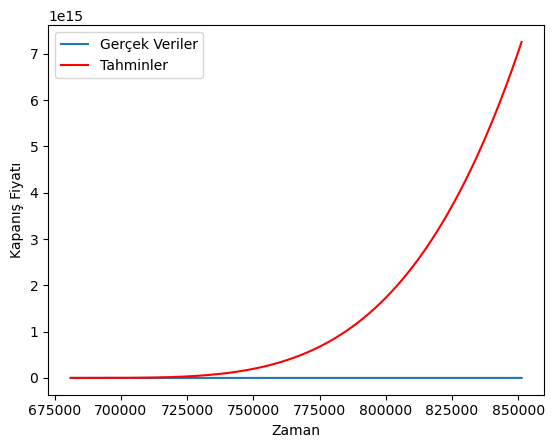

RMSE: 2420123160890076.5


In [225]:
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(X) * 0.8)  # Örneğin, %80 eğitim, %20 test olarak ayırabilirsiniz
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

# Build and train the ARIMA model
p, d, q = 5, 5, 5  # P, D ve Q parametrelerini belirleyin (örnek değerler)
model = ARIMA(train_y, order=(p, d, q))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_X))

# Compare predictions and actual data
plt.plot(test_y.index, test_y.values, label="Gerçek Veriler")
plt.plot(test_y.index, predictions, color='red', label="Predictions")
plt.xlabel("Time")
plt.ylabel("Closing price")
plt.legend()
plt.show()

# Evaluate model performance (for example, you can use RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print(f"RMSE: {rmse}")


**Result and discussion:**


The emergence of very different values in polynomial regression may be due to many reasons. One of these may be choosing the wrong parameter, a data set that is not suitable for regression, or insufficient data. One or more of these problems can cause the Polynomial Regression model to produce meaningless predictions. To detect and solve such problems, it is important to carefully analyze the data, adjust the model, and collect more data when necessary. Additionally, considering simplifying the model or using different regression techniques may also be a solution. Therefore, our decision on this issue is that the Liner recession is more suitable for New York Stock Price prediction. The chart supports us in this regard.

Additionally, it can be analyzed for different P, Q, and D values. However, we decided that this was not appropriate and that polynomial regression was not suitable for the data we had.

## ANN

To determine how many epochs should be performed when you have 681,011 data points in your dataset and are using a mini-batch size of 17,026, you can calculate it using the following formula:

Total Number of Epochs = Total Number of Data Points / Mini-Batch Size 

So,

Total Number of Epochs = 681,011 / 17,026 ≈ 40

In this case, we would need to perform approximately 40 epochs to process all 681,011 data points in mini-batches of size 17,026. However, it's important to note that determining the number of epochs should not solely rely on this calculation. That is why we need to monitoring the performance of the model and We will decide the outcome.

In [115]:
# Model Creation
def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [116]:
model_11 = regressor(inp_dim=3)
model_11.fit(X_MinMaxScaler_pred_train, y_MinMaxScaler_pred_train, epochs=10, batch_size=40, validation_split=0.2)

Epoch 1/10
13621/13621 [==============================] - 31s 2ms/step - loss: 1.7562e-05 - val_loss: 5.4724e-07
Epoch 2/10
13621/13621 [==============================] - 27s 2ms/step - loss: 5.9483e-07 - val_loss: 4.8629e-07
Epoch 3/10
13621/13621 [==============================] - 26s 2ms/step - loss: 5.8321e-07 - val_loss: 4.3815e-07
Epoch 4/10
13621/13621 [==============================] - 27s 2ms/step - loss: 6.1602e-07 - val_loss: 9.4700e-07
Epoch 5/10
13621/13621 [==============================] - 27s 2ms/step - loss: 6.4618e-07 - val_loss: 1.0305e-06
Epoch 6/10
13621/13621 [==============================] - 26s 2ms/step - loss: 5.6168e-07 - val_loss: 3.8700e-06
Epoch 7/10
13621/13621 [==============================] - 28s 2ms/step - loss: 4.9357e-07 - val_loss: 4.1869e-07
Epoch 8/10
13621/13621 [==============================] - 28s 2ms/step - loss: 4.4963e-07 - val_loss: 4.2301e-07
Epoch 9/10
13621/13621 [==============================] - 26s 2ms/step - loss: 5.3202e-07 - val_

In [117]:
y_pred_11 = model_11.predict(X_MinMaxScaler_pred_test)

5321/5321 [==============================] - 8s 1ms/step


In [118]:
pred_df_11 = pd.DataFrame({'Actual': y_MinMaxScaler_pred_test, 'Predicted': y_pred_11.flatten()})
pred_df_11.head()

Actual  Predicted
681011  0.060994   0.060347
681012  0.051664   0.051232
681013  0.024205   0.023543
681014  0.055241   0.055037
681015  0.026032   0.025569

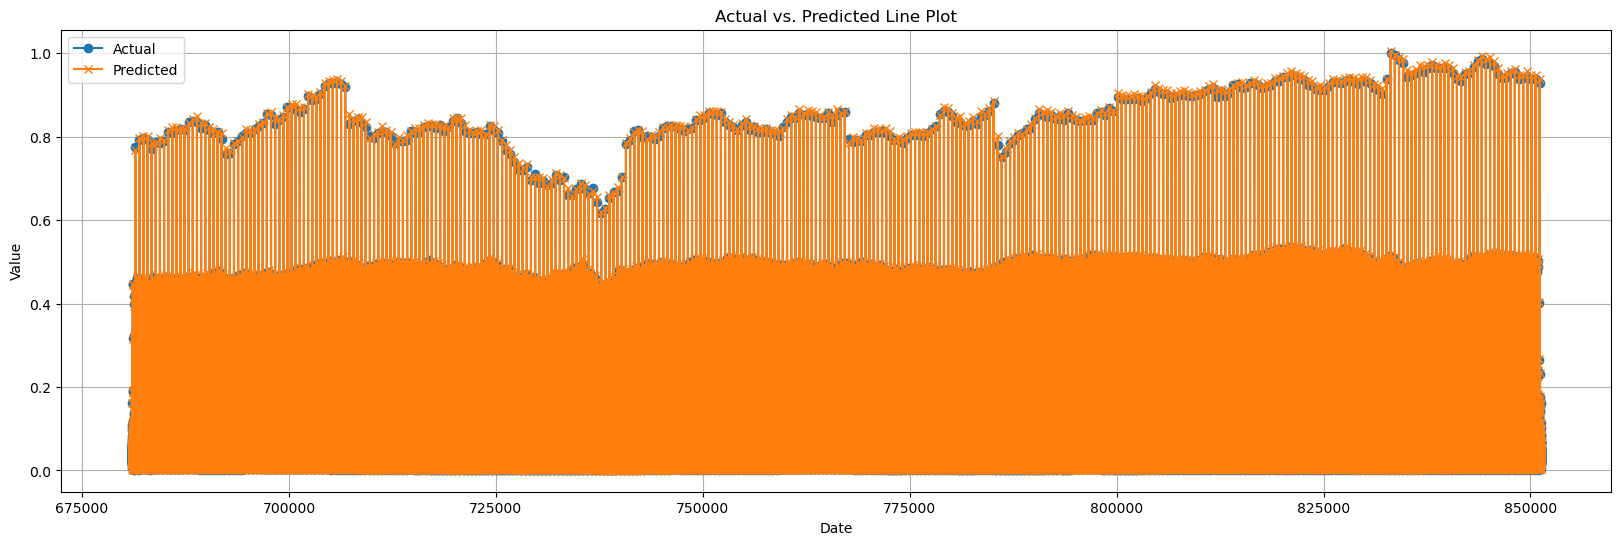

In [261]:
# Get your data
actual = pred_df_11['Actual']
predicted = pred_df_11['Predicted']

# Draw the graph
plt.figure(figsize = (20, 6))
plt.plot(actual, label='Actual', marker='o', linestyle='-')
plt.plot(predicted, label='Predicted', marker='x', linestyle='-')

# Label the axes and add the title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Line Plot')
plt.legend()

# Show chart
plt.grid(True)
plt.show()

Although the graph is not clear due to the large amount of data, it offers an estimated approach. Could different graph drawing methods be tried, or could it be tried to plot weekly average or monthly average values on the graph instead of day by day?

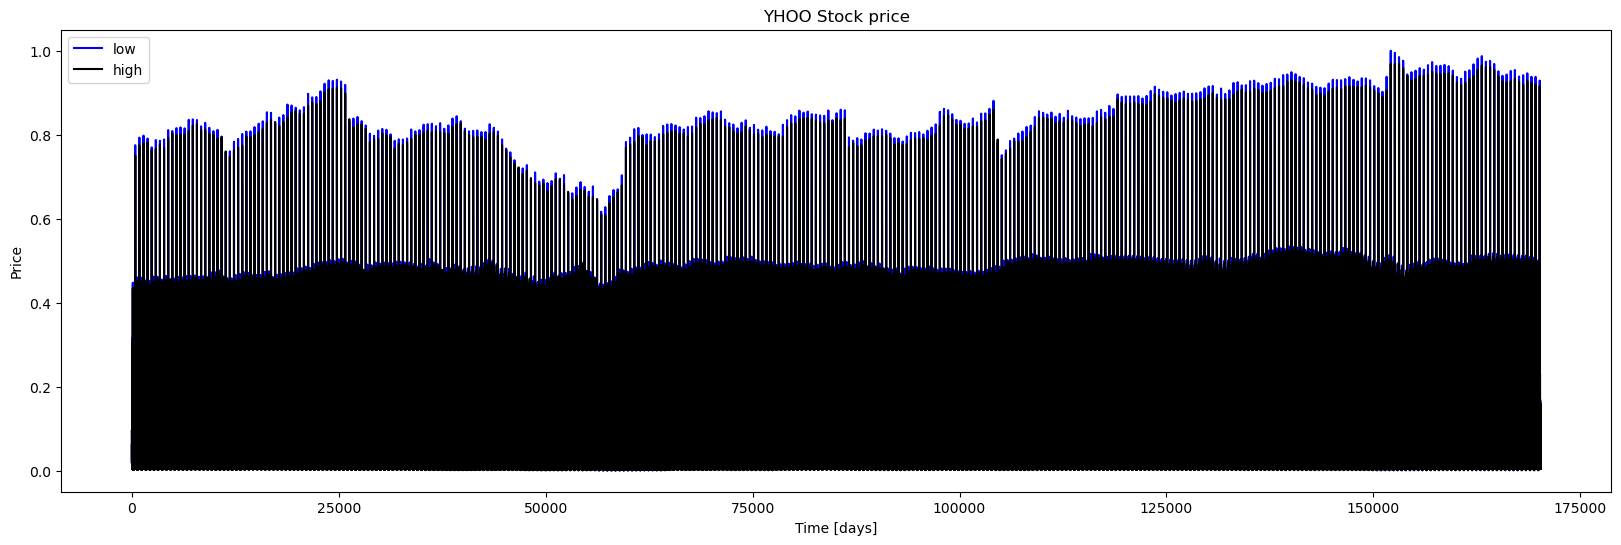

In [120]:
#plotting aapl low & high price
plt.figure(figsize = (20, 6))
plt.plot(pred_df_11.Actual.values, color='blue', label='low')
plt.plot(pred_df_11.Predicted.values, color='black', label='high')
plt.title('YHOO Stock price')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')

Although the graph is not clear due to the large amount of data, it offers an estimated approach. Could different graph drawing methods be tried, or could it be tried to plot weekly average or monthly average values on the graph instead of day by day?

In [121]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_MinMaxScaler_pred_test, y_pred_11)))
Acc.append(r2_score(y_MinMaxScaler_pred_test, y_pred_11))

Accuracy score of the predictions: 0.9991026211909817


In [122]:
MSE = mean_squared_error(y_MinMaxScaler_pred_test, y_pred_11)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: ")
print(RMSE)

Root Mean Square Error: 
0.0019489162139401503


#### ANN Model With All Data

In this section, historical data of a whole company and predictions of YHOO company were made.

In [265]:
model_11 = regressor(inp_dim=3)
model_11.fit(X_MinMaxScaler_pred_train, y_MinMaxScaler_pred_train, epochs=50, batch_size=40, validation_split=0.2)

Epoch 1/50
13621/13621 [==============================] - 35s 2ms/step - loss: 1.4291e-05 - val_loss: 1.2793e-06
Epoch 2/50
13621/13621 [==============================] - 27s 2ms/step - loss: 7.6571e-07 - val_loss: 3.9421e-07
Epoch 3/50
13621/13621 [==============================] - 24s 2ms/step - loss: 6.8552e-07 - val_loss: 4.5359e-07
Epoch 4/50
13621/13621 [==============================] - 26s 2ms/step - loss: 5.8726e-07 - val_loss: 7.0023e-07
Epoch 5/50
13621/13621 [==============================] - 27s 2ms/step - loss: 6.4434e-07 - val_loss: 6.8750e-07
Epoch 6/50
13621/13621 [==============================] - 26s 2ms/step - loss: 6.0090e-07 - val_loss: 4.4174e-07
Epoch 7/50
13621/13621 [==============================] - 27s 2ms/step - loss: 5.3981e-07 - val_loss: 5.2737e-07
Epoch 8/50
13621/13621 [==============================] - 26s 2ms/step - loss: 5.8366e-07 - val_loss: 4.2244e-07
Epoch 9/50
13621/13621 [==============================] - 26s 2ms/step - loss: 4.9366e-07 - val_

In [266]:
numerical_columns_YHOO = df_YHOO.select_dtypes(include=['float64', 'int64']) #this code selects "float64" and "int64" data and 
                                                                    #save this data as name numerical_columns dataframe
numerical_columns_YHOO = numerical_columns_YHOO.drop('volume', axis=1)

numerical_columns_YHOO

open      close        low       high
713     16.940001  17.100000  16.879999  17.200001
1181    17.219999  17.230000  17.000000  17.230000
1649    17.170000  17.170000  17.070000  17.299999
2117    16.809999  16.700001  16.570000  16.900000
2585    16.680000  16.700001  16.620001  16.760000
...           ...        ...        ...        ...
849257  38.459999  38.660000  38.369999  38.810001
849757  38.590000  38.919998  38.500000  39.070000
850257  39.119999  38.730000  38.709999  39.220001
850757  38.759998  38.639999  38.480000  38.930000
851257  38.720001  38.669998  38.430000  39.000000

[1762 rows x 4 columns]

In [267]:
scaler_MinMaxScaler_YHOO = MinMaxScaler()
X_MinMaxScaler_YHOO = pd.DataFrame(scaler_MinMaxScaler_YHOO.fit_transform(numerical_columns_YHOO), columns=numerical_columns_YHOO.columns)
X_MinMaxScaler.head()

open     close       low      high
0  0.076934  0.078812  0.078020  0.077818
1  0.078078  0.075095  0.076490  0.077374
2  0.072480  0.071904  0.073254  0.073747
3  0.071911  0.072964  0.072331  0.072309
4  0.072878  0.071917  0.072712  0.072240

In [268]:
X_MinMaxScaler_pred_YHOO = X_MinMaxScaler_YHOO.drop(['close'], axis=1)
y_MinMaxScaler_pred_YHOO = X_MinMaxScaler_YHOO['close']
X_MinMaxScaler_pred_YHOO

open       low      high
0     0.137628  0.142787  0.132288
1     0.144461  0.145746  0.133023
2     0.143241  0.147472  0.134738
3     0.134456  0.135142  0.124939
4     0.131284  0.136375  0.121509
...        ...       ...       ...
1757  0.662762  0.672750  0.661685
1758  0.665935  0.675956  0.668055
1759  0.678868  0.681134  0.671730
1760  0.670083  0.675462  0.664625
1761  0.669107  0.674229  0.666340

[1762 rows x 3 columns]

In [269]:
X_MinMaxScaler_pred_YHOO_train

open       low      high
0     0.137628  0.142787  0.132288
1     0.144461  0.145746  0.133023
2     0.143241  0.147472  0.134738
3     0.134456  0.135142  0.124939
4     0.131284  0.136375  0.121509
...        ...       ...       ...
1404  0.619082  0.623428  0.616854
1405  0.617618  0.629100  0.622489
1406  0.634944  0.644636  0.634738
1407  0.635432  0.621702  0.630083
1408  0.615422  0.618003  0.611465

[1409 rows x 3 columns]

In [270]:
y_pred_11 = model_11.predict(X_MinMaxScaler_pred_YHOO_test)

12/12 [==============================] - 0s 1ms/step


In [271]:
pred_df_11 = pd.DataFrame({'Actual': y_MinMaxScaler_pred_YHOO_test, 'Predicted': y_pred_11.flatten()})
pred_df_11.head()

Actual  Predicted
1409  0.631299   0.636722
1410  0.604167   0.602856
1411  0.566861   0.560122
1412  0.601744   0.600656
1413  0.609254   0.604267

In [272]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_MinMaxScaler_pred_YHOO_test, y_pred_11)))
Acc.append(r2_score(y_MinMaxScaler_pred_YHOO_test, y_pred_11))

Accuracy score of the predictions: 0.9964006506177757


In [132]:
MSE = mean_squared_error(y_MinMaxScaler_pred_YHOO_test, y_pred_11)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: ")
print(RMSE)

Root Mean Square Error: 
0.0008392425741520152


#### ANN Model With Spesific Data

In this section, past data of a company and future predictions were made.

In [133]:
df_YHOO = df[df['symbol']=='YHOO']   # Choosin stock values for any company 
df_YHOO

date symbol       open      close        low       high  \
713     2010-01-04   YHOO  16.940001  17.100000  16.879999  17.200001   
1181    2010-01-05   YHOO  17.219999  17.230000  17.000000  17.230000   
1649    2010-01-06   YHOO  17.170000  17.170000  17.070000  17.299999   
2117    2010-01-07   YHOO  16.809999  16.700001  16.570000  16.900000   
2585    2010-01-08   YHOO  16.680000  16.700001  16.620001  16.760000   
...            ...    ...        ...        ...        ...        ...   
849257  2016-12-23   YHOO  38.459999  38.660000  38.369999  38.810001   
849757  2016-12-27   YHOO  38.590000  38.919998  38.500000  39.070000   
850257  2016-12-28   YHOO  39.119999  38.730000  38.709999  39.220001   
850757  2016-12-29   YHOO  38.759998  38.639999  38.480000  38.930000   
851257  2016-12-30   YHOO  38.720001  38.669998  38.430000  39.000000   

            volume  
713     16587400.0  
1181    11718100.0  
1649    16422000.0  
2117    31816300.0  
2585    15470000.0  
...            ...  
849257   3840100.0  
849757   4240300.0  
850257   4393500.0  
850757   4170200.0  
851257   6431600.0  

[1762 rows x 7 columns]

In [134]:
numerical_columns_YHOO = df_YHOO.select_dtypes(include=['float64', 'int64']) #this code selects "float64" and "int64" data and 
                                                                             #save this data as name numerical_columns dataframe
numerical_columns_YHOO = numerical_columns_YHOO.drop('volume', axis=1)

In [135]:
numerical_columns_YHOO

open      close        low       high
713     16.940001  17.100000  16.879999  17.200001
1181    17.219999  17.230000  17.000000  17.230000
1649    17.170000  17.170000  17.070000  17.299999
2117    16.809999  16.700001  16.570000  16.900000
2585    16.680000  16.700001  16.620001  16.760000
...           ...        ...        ...        ...
849257  38.459999  38.660000  38.369999  38.810001
849757  38.590000  38.919998  38.500000  39.070000
850257  39.119999  38.730000  38.709999  39.220001
850757  38.759998  38.639999  38.480000  38.930000
851257  38.720001  38.669998  38.430000  39.000000

[1762 rows x 4 columns]

In [136]:
scaler_MinMaxScaler_YHOO = MinMaxScaler()
X_MinMaxScaler_YHOO = pd.DataFrame(scaler_MinMaxScaler_YHOO.fit_transform(numerical_columns_YHOO), columns=numerical_columns_YHOO.columns)
X_MinMaxScaler.head()

open     close       low      high
0  0.076934  0.078812  0.078020  0.077818
1  0.078078  0.075095  0.076490  0.077374
2  0.072480  0.071904  0.073254  0.073747
3  0.071911  0.072964  0.072331  0.072309
4  0.072878  0.071917  0.072712  0.072240

In [137]:
X_MinMaxScaler_pred_YHOO = X_MinMaxScaler_YHOO.drop(['close'], axis=1)
y_MinMaxScaler_pred_YHOO = X_MinMaxScaler_YHOO['close']
X_MinMaxScaler_pred_YHOO

open       low      high
0     0.137628  0.142787  0.132288
1     0.144461  0.145746  0.133023
2     0.143241  0.147472  0.134738
3     0.134456  0.135142  0.124939
4     0.131284  0.136375  0.121509
...        ...       ...       ...
1757  0.662762  0.672750  0.661685
1758  0.665935  0.675956  0.668055
1759  0.678868  0.681134  0.671730
1760  0.670083  0.675462  0.664625
1761  0.669107  0.674229  0.666340

[1762 rows x 3 columns]

In [239]:
X_MinMaxScaler_pred_YHOO_train, X_MinMaxScaler_pred_YHOO_test, y_MinMaxScaler_pred_YHOO_train, y_MinMaxScaler_pred_YHOO_test = train_test_split(X_MinMaxScaler_pred_YHOO, y_MinMaxScaler_pred_YHOO, test_size = 0.2, shuffle=False)
X_MinMaxScaler_pred_YHOO_train

open       low      high
0     0.137628  0.142787  0.132288
1     0.144461  0.145746  0.133023
2     0.143241  0.147472  0.134738
3     0.134456  0.135142  0.124939
4     0.131284  0.136375  0.121509
...        ...       ...       ...
1404  0.619082  0.623428  0.616854
1405  0.617618  0.629100  0.622489
1406  0.634944  0.644636  0.634738
1407  0.635432  0.621702  0.630083
1408  0.615422  0.618003  0.611465

[1409 rows x 3 columns]

In [140]:
model_12 = regressor(inp_dim=3)
model_12.fit(X_MinMaxScaler_pred_YHOO_train, y_MinMaxScaler_pred_YHOO_train, epochs=29, batch_size=47, validation_split=0.2)

Epoch 1/29
24/24 [==============================] - 1s 8ms/step - loss: 0.0849 - val_loss: 0.5491
Epoch 2/29
24/24 [==============================] - 0s 3ms/step - loss: 0.0703 - val_loss: 0.4761
Epoch 3/29
24/24 [==============================] - 0s 4ms/step - loss: 0.0505 - val_loss: 0.3367
Epoch 4/29
24/24 [==============================] - 0s 4ms/step - loss: 0.0301 - val_loss: 0.1624
Epoch 5/29
24/24 [==============================] - 0s 3ms/step - loss: 0.0221 - val_loss: 0.1154
Epoch 6/29
24/24 [==============================] - 0s 4ms/step - loss: 0.0161 - val_loss: 0.0673
Epoch 7/29
24/24 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.0194
Epoch 8/29
24/24 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 9/29
24/24 [==============================] - 0s 4ms/step - loss: 4.1625e-04 - val_loss: 1.1547e-04
Epoch 10/29
24/24 [==============================] - 0s 3ms/step - loss: 1.3085e-04 - val_loss: 2.5602e-04
Epo

In [141]:
y_pred_12 = model_12.predict(X_MinMaxScaler_pred_YHOO_test)

12/12 [==============================] - 0s 1ms/step


In [142]:
pred_df_12 = pd.DataFrame({'Actual': y_MinMaxScaler_pred_YHOO_test, 'Predicted': y_pred_12.flatten()})
pred_df_12.head()

Actual  Predicted
1409  0.631299   0.634038
1410  0.604167   0.614912
1411  0.566861   0.564294
1412  0.601744   0.594002
1413  0.609254   0.605113

In [233]:
print("Accuracy score of the predictions: {0}".format(r2_score(y_MinMaxScaler_pred_YHOO_test, y_pred_12)))
Acc.append(r2_score(y_MinMaxScaler_pred_YHOO_test, y_MinMaxScaler_pred_YHOO_test))

Accuracy score of the predictions: 0.9930393086182212


##### RMS Value

In [144]:
# Properly convert y_pred_12 into a 1D pandas Series
y_pred_12_series = pd.Series(y_pred_12.ravel(), index=y_MinMaxScaler_pred_YHOO_test.index)
 
MSE = mean_squared_error(y_MinMaxScaler_pred_YHOO_test, y_pred_12)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: ")
print(RMSE)

Root Mean Square Error: 
0.008859226338951072


**RESULT of Last Two section**

In the 'ANN Model With All Data' section, we trained our model with all available data and made predictions for the future of the 'YHOO' company. However, in the 'ANN Model With Specific Data' section, we trained the model using historical data only for the 'YHOO' company and made predictions based on that. The goal in this section is to determine which training approach is more suitable.

## LSTM 

### Model Preparing

In [145]:
df_YHOO

date symbol       open      close        low       high  \
713     2010-01-04   YHOO  16.940001  17.100000  16.879999  17.200001   
1181    2010-01-05   YHOO  17.219999  17.230000  17.000000  17.230000   
1649    2010-01-06   YHOO  17.170000  17.170000  17.070000  17.299999   
2117    2010-01-07   YHOO  16.809999  16.700001  16.570000  16.900000   
2585    2010-01-08   YHOO  16.680000  16.700001  16.620001  16.760000   
...            ...    ...        ...        ...        ...        ...   
849257  2016-12-23   YHOO  38.459999  38.660000  38.369999  38.810001   
849757  2016-12-27   YHOO  38.590000  38.919998  38.500000  39.070000   
850257  2016-12-28   YHOO  39.119999  38.730000  38.709999  39.220001   
850757  2016-12-29   YHOO  38.759998  38.639999  38.480000  38.930000   
851257  2016-12-30   YHOO  38.720001  38.669998  38.430000  39.000000   

            volume  
713     16587400.0  
1181    11718100.0  
1649    16422000.0  
2117    31816300.0  
2585    15470000.0  
...            ...  
849257   3840100.0  
849757   4240300.0  
850257   4393500.0  
850757   4170200.0  
851257   6431600.0  

[1762 rows x 7 columns]

In [146]:
df_YHOO_Closing = df_YHOO.reset_index()['close']
df_YHOO_Closing

0       17.100000
1       17.230000
2       17.170000
3       16.700001
4       16.700001
          ...    
1757    38.660000
1758    38.919998
1759    38.730000
1760    38.639999
1761    38.669998
Name: close, Length: 1762, dtype: float64

In [147]:
# Normalizing our data using MinMaxScaler
scaler_LSTM_MinMaxScaler = MinMaxScaler()
scaled_data_LSTM = scaler_LSTM_MinMaxScaler.fit_transform(np.array(df_YHOO_Closing).reshape(-1,1))
scaled_data_LSTM

array([[0.14559109],
       [0.14874031],
       [0.14728683],
       ...,
       [0.66957366],
       [0.6673934 ],
       [0.66812012]])

In [148]:
# Split into training and testing sets
train_size = int(len(scaled_data_LSTM) * 0.8)  # 80% for training
train_data_LSTM, test_data_LSTM = scaled_data_LSTM[:train_size], scaled_data_LSTM[train_size:]
train_data_LSTM

array([[0.14559109],
       [0.14874031],
       [0.14728683],
       ...,
       [0.63372095],
       [0.61458332],
       [0.61967051]])

In [149]:
# Define the sequence length (number of past time steps)
n_past = 60

# Prepare sequences for LSTM
X_train_LSTM, y_train_LSTM = [], []
for i in range(n_past, len(train_data_LSTM)):
    X_train_LSTM.append(train_data_LSTM[i - n_past:i, 0])
    y_train_LSTM.append(train_data_LSTM[i, 0])
X_train_LSTM, y_train_LSTM = np.array(X_train_LSTM), np.array(y_train_LSTM)

# Similarly prepare sequences for the test set
X_test_LSTM, y_test_LSTM = [], []
for i in range(n_past, len(test_data_LSTM)):
    X_test_LSTM.append(test_data_LSTM[i - n_past:i, 0])
    y_test_LSTM.append(test_data_LSTM[i, 0])
X_test_LSTM, y_test_LSTM = np.array(X_test_LSTM), np.array(y_test_LSTM)

In [150]:
#Check shape of our DF
print("Training set size:-")
print(X_train_LSTM.shape), print(y_train_LSTM.shape)
print("\n")
print("Testing set size:-")
print(X_test_LSTM.shape), print(y_test_LSTM.shape)

Training set size:-
(1349, 60)
(1349,)


Testing set size:-
(293, 60)
(293,)


(None, None)

In [151]:
# Reshape input data for LSTM([samples, time steps, features])
X_train_LSTM = X_train_LSTM.reshape(X_train_LSTM.shape[0], X_train_LSTM.shape[1], 1)
X_test_LSTM = X_test_LSTM.reshape(X_test_LSTM.shape[0], X_test_LSTM.shape[1], 1)

### Model training

In [152]:
# Initialize a sequential model
model_13 = Sequential()

# First GRU layer with 50 units, input shape, and return sequences
model_13.add(GRU(units=50, return_sequences=True, input_shape=(X_train_LSTM.shape[1], 1)))
model_13.add(Dropout(0.2))  # Adding dropout to prevent overfitting

# Second GRU layer with 50 units and return sequences
model_13.add(GRU(units=50, return_sequences=True))
model_13.add(Dropout(0.2))

# Third GRU layer with 50 units
model_13.add(GRU(units=50))
model_13.add(Dropout(0.2))

# Add a dense output layer with one unit
model_13.add(Dense(units=1))

In [153]:
model_13.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 50)            7950      
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 60, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_2 (GRU)                 (None, 50)                15300     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                

In [154]:
X_train_LSTM = X_train_LSTM.reshape(X_train_LSTM.shape[0], X_train_LSTM.shape[1], 1)
X_test_LSTM = X_test_LSTM.reshape(X_test_LSTM.shape[0], X_test_LSTM.shape[1], 1)


In [240]:
y_train_LSTM = np.array(y_train_LSTM).reshape(-1, 1)
X_train_LSTM = X_train_LSTM.reshape(X_train_LSTM.shape[0], X_train_LSTM.shape[1], 1)
y_test_LSTM = np.array(y_test_LSTM).reshape(-1, 1)
X_test_LSTM = X_test_LSTM.reshape(X_test_LSTM.shape[0], X_test_LSTM.shape[1], 1)

In [159]:
# Defining our callbacks
checkpoints = ModelCheckpoint(filepath = 'my_weights.h5', save_best_only = True)
# Defining our early stopping point
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model_13.compile(loss='mean_squared_error', optimizer='rmsprop')

# Training our lstm model
model_13.fit(X_train_LSTM, y_train_LSTM,
          validation_data=(X_test_LSTM,y_test_LSTM),
          epochs=75,
          batch_size=32,
          verbose=1,
          callbacks= [checkpoints, early_stopping])

Epoch 1/75
43/43 [==============================] - ETA: 0s - loss: 0.0134

C:\anaconda\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



43/43 [==============================] - 10s 92ms/step - loss: 0.0134 - val_loss: 0.0603
Epoch 2/75
43/43 [==============================] - 3s 60ms/step - loss: 0.0054 - val_loss: 0.0864
Epoch 3/75
43/43 [==============================] - 3s 62ms/step - loss: 0.0063 - val_loss: 9.5145e-04
Epoch 4/75
43/43 [==============================] - 3s 62ms/step - loss: 0.0046 - val_loss: 0.0179
Epoch 5/75
43/43 [==============================] - 3s 74ms/step - loss: 0.0039 - val_loss: 0.0417
Epoch 6/75
43/43 [==============================] - 3s 64ms/step - loss: 0.0040 - val_loss: 0.0053
Epoch 7/75
43/43 [==============================] - 3s 60ms/step - loss: 0.0038 - val_loss: 0.0012
Epoch 8/75
43/43 [==============================] - 3s 61ms/step - loss: 0.0031 - val_loss: 0.0258
Epoch 9/75
43/43 [==============================] - 3s 60ms/step - loss: 0.0036 - val_loss: 0.0015
Epoch 10/75
43/43 [==============================] - 3s 64ms/step - loss: 0.0032 - val_loss: 6.8076e-04
Epoch 11/75

In [160]:
X_train_LSTM

array([[[0.14559109],
        [0.14874031],
        [0.14728683],
        ...,
        [0.13202522],
        [0.13250967],
        [0.13372096]],

       [[0.14874031],
        [0.14728683],
        [0.13590119],
        ...,
        [0.13250967],
        [0.13372096],
        [0.13178297]],

       [[0.14728683],
        [0.13590119],
        [0.13590119],
        ...,
        [0.13372096],
        [0.13178297],
        [0.12596902]],

       ...,

       [[0.78754842],
        [0.79336242],
        [0.80692836],
        ...,
        [0.61967051],
        [0.62015503],
        [0.6305717 ]],

       [[0.79336242],
        [0.80692836],
        [0.82025198],
        ...,
        [0.62015503],
        [0.6305717 ],
        [0.63372095]],

       [[0.80692836],
        [0.82025198],
        [0.815407  ],
        ...,
        [0.6305717 ],
        [0.63372095],
        [0.61458332]]])

In [161]:
y_train_LSTM

array([[0.13178297],
       [0.12596902],
       [0.13129845],
       ...,
       [0.63372095],
       [0.61458332],
       [0.61967051]])

In [162]:
y_pred_13 = model_13.predict(X_test_LSTM)

10/10 [==============================] - 1s 18ms/step


In [242]:
print("Accuracy score of the predictions: {0}".format(r2_score(y_test_LSTM, y_pred_13)))
Acc.append(r2_score(y_test_LSTM, y_test_LSTM))

Accuracy score of the predictions: 0.9582168770369709


In [241]:
MSE = mean_squared_error(y_test_LSTM, y_pred_13)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: ")
print(RMSE)

Root Mean Square Error: 
0.02129006236233908


## LSTM With Different Activation Function

In [250]:
df_price_adjusted = pd.read_csv('prices-split-adjusted.csv')

df_price_adjusted

date symbol        open       close         low        high  \
0       2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1       2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2       2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3       2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4       2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   
...            ...    ...         ...         ...         ...         ...   
851259  2016-12-30    ZBH  103.309998  103.199997  102.849998  103.930000   
851260  2016-12-30   ZION   43.070000   43.040001   42.689999   43.310001   
851261  2016-12-30    ZTS   53.639999   53.529999   53.270000   53.740002   
851262  2016-12-30    AIV   44.730000   45.450001   44.410000   45.590000   
851263  2016-12-30    FTV   54.200001   53.630001   53.389999   54.480000   

           volume  
0       2163600.0  
1       2386400.0  
2       2489500.0  
3       2006300.0  
4       1408600.0  
...           ...  
851259   973800.0  
851260  1938100.0  
851261  1701200.0  
851262  1380900.0  
851263   705100.0  

[851264 rows x 7 columns]

In [251]:
df_price_adjusted = df_price_adjusted[df_price_adjusted['symbol']=='YHOO']   # Choosin stock values for any company 
df_price_adjusted

date symbol       open      close        low       high  \
713     2010-01-04   YHOO  16.940001  17.100000  16.879999  17.200001   
1181    2010-01-05   YHOO  17.219999  17.230000  17.000000  17.230000   
1649    2010-01-06   YHOO  17.170000  17.170000  17.070000  17.299999   
2117    2010-01-07   YHOO  16.809999  16.700001  16.570000  16.900000   
2585    2010-01-08   YHOO  16.680000  16.700001  16.620001  16.760000   
...            ...    ...        ...        ...        ...        ...   
849257  2016-12-23   YHOO  38.459999  38.660000  38.369999  38.810001   
849757  2016-12-27   YHOO  38.590000  38.919998  38.500000  39.070000   
850257  2016-12-28   YHOO  39.119999  38.730000  38.709999  39.220001   
850757  2016-12-29   YHOO  38.759998  38.639999  38.480000  38.930000   
851257  2016-12-30   YHOO  38.720001  38.669998  38.430000  39.000000   

            volume  
713     16587400.0  
1181    11718100.0  
1649    16422000.0  
2117    31816300.0  
2585    15470000.0  
...            ...  
849257   3840100.0  
849757   4240300.0  
850257   4393500.0  
850757   4170200.0  
851257   6431600.0  

[1762 rows x 7 columns]

In [252]:
df_price_adjusted = df_price_adjusted[['date', 'close']]

df_price_adjusted

date      close
713     2010-01-04  17.100000
1181    2010-01-05  17.230000
1649    2010-01-06  17.170000
2117    2010-01-07  16.700001
2585    2010-01-08  16.700001
...            ...        ...
849257  2016-12-23  38.660000
849757  2016-12-27  38.919998
850257  2016-12-28  38.730000
850757  2016-12-29  38.639999
851257  2016-12-30  38.669998

[1762 rows x 2 columns]

In [253]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [254]:
df_price_adjusted['date'] = df_price_adjusted['date'].apply(str_to_datetime)
df_price_adjusted['date']

C:\Users\ANILERMAN\AppData\Local\Temp\ipykernel_7444\695649248.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



713      2010-01-04
1181     2010-01-05
1649     2010-01-06
2117     2010-01-07
2585     2010-01-08
            ...    
849257   2016-12-23
849757   2016-12-27
850257   2016-12-28
850757   2016-12-29
851257   2016-12-30
Name: date, Length: 1762, dtype: datetime64[ns]

In [255]:
df_price_adjusted.index = df_price_adjusted.pop('date')
df_price_adjusted

close
date                 
2010-01-04  17.100000
2010-01-05  17.230000
2010-01-06  17.170000
2010-01-07  16.700001
2010-01-08  16.700001
...               ...
2016-12-23  38.660000
2016-12-27  38.919998
2016-12-28  38.730000
2016-12-29  38.639999
2016-12-30  38.669998

[1762 rows x 1 columns]

Text(0, 0.5, 'Closing Price')

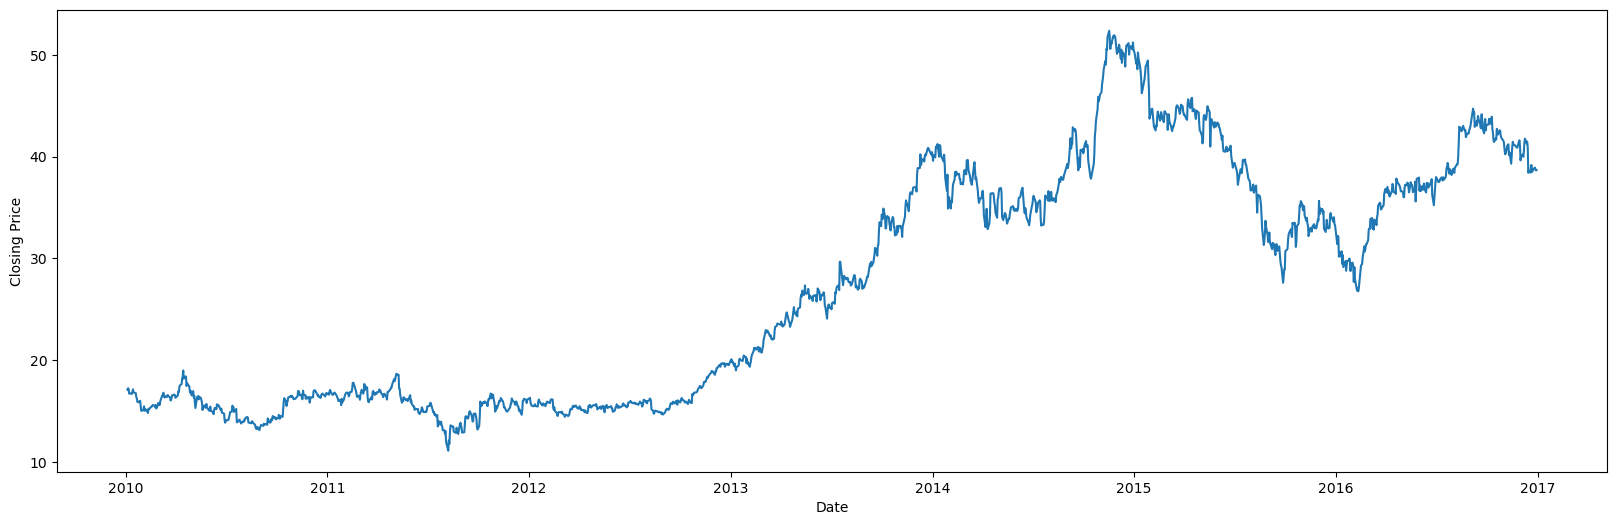

In [258]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 6))
plt.plot(df_price_adjusted.index, df_price_adjusted['close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')

In [172]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df_price_adjusted, 
                                '2010-03-25', 
                                '2012-03-23', 
                                n=3)
windowed_df

Target Date   Target-3   Target-2   Target-1     Target
0    2010-03-25  16.340000  16.030001  16.090000  16.320000
1    2010-03-26  16.030001  16.090000  16.320000  16.540001
2    2010-03-29  16.090000  16.320000  16.540001  16.559999
3    2010-03-30  16.320000  16.540001  16.559999  16.610001
4    2010-03-31  16.540001  16.559999  16.610001  16.530001
..          ...        ...        ...        ...        ...
500  2012-03-19  14.630000  14.890000  15.180000  15.150000
501  2012-03-20  14.890000  15.180000  15.150000  15.410000
502  2012-03-21  15.180000  15.150000  15.410000  15.510000
503  2012-03-22  15.150000  15.410000  15.510000  15.490000
504  2012-03-23  15.410000  15.510000  15.490000  15.390000

[505 rows x 5 columns]

In [173]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X_adjusted, y_adjusted = windowed_df_to_date_X_y(windowed_df)

dates.shape, X_adjusted.shape, y_adjusted.shape

((505,), (505, 3, 1), (505,))

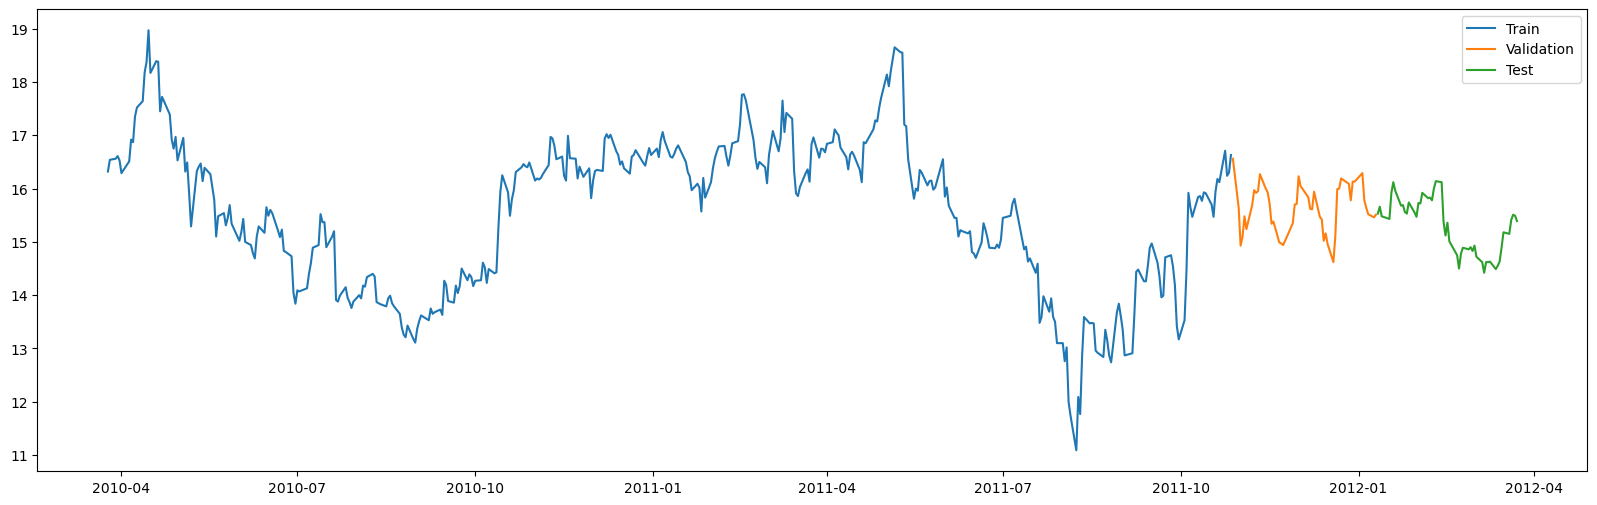

In [174]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train_adjusted, X_train_adjusted, y_train_adjusted = dates[:q_80], X_adjusted[:q_80], y_adjusted[:q_80]

dates_val_adjusted, X_val_adjusted, y_val_adjusted = dates[q_80:q_90], X_adjusted[q_80:q_90], y_adjusted[q_80:q_90]
dates_test_adjusted, X_test_adjusted, y_test_adjusted = dates[q_90:], X_adjusted[q_90:], y_adjusted[q_90:]
plt.figure(figsize = (20, 6))
plt.plot(dates_train_adjusted, y_train_adjusted)
plt.plot(dates_val_adjusted, y_val_adjusted)
plt.plot(dates_test_adjusted, y_test_adjusted)

plt.legend(['Train', 'Validation', 'Test'])

#### LSTM with ReLu Activation Function

In [175]:
best_hyperparameters = None
best_model = None

def build_model(hp):
    model = Sequential()
    model.add(layers.Input((3, 1)))
    model.add(layers.LSTM(64))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    
    # Tune edilecek hiperparametreler ve değer aralıkları
    hp_learning_rate = hp.Choice('learning_rate', values=[0.0001, 0.001, 0.01, 0.1])
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adagrad', 'nadam'])
    
    model.compile(loss='mse', optimizer=hp_optimizer, metrics=['mean_absolute_error'])
    
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Denenecek farklı hiperparametre kombinasyonlarının sayısı
    directory='random_search',
    project_name='my_model')

# Modeli arama işlemi başlatın
tuner.search(X_train_adjusted, y_train_adjusted, validation_data=(X_val_adjusted, y_val_adjusted), epochs=100)

# En iyi hiperparametreleri ve modeli alın
best_hyperparameters = tuner.get_best_hyperparameters()[0]
best_model = tuner.hypermodel.build(best_hyperparameters)

# Eğitim işlemi
best_model.fit(X_train_adjusted, y_train_adjusted, validation_data=(X_val_adjusted, y_val_adjusted), epochs=100)

# En iyi hiperparametreleri ve modeli yazdırın
print("En iyi hiperparametreler:")
print(best_hyperparameters.values)
print("\nEn iyi model özeti:")
best_model.summary()


Reloading Tuner from random_search\my_model\tuner0.json
Epoch 1/100
13/13 [==============================] - 2s 43ms/step - loss: 208.2091 - mean_absolute_error: 14.3400 - val_loss: 164.7431 - val_mean_absolute_error: 12.8276
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 122.9252 - mean_absolute_error: 10.9194 - val_loss: 70.3307 - val_mean_absolute_error: 8.3741
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 36.6229 - mean_absolute_error: 5.6595 - val_loss: 7.4765 - val_mean_absolute_error: 2.6968
Epoch 4/100
13/13 [==============================] - 0s 9ms/step - loss: 3.9864 - mean_absolute_error: 1.6654 - val_loss: 0.2855 - val_mean_absolute_error: 0.4535
Epoch 5/100
13/13 [==============================] - 0s 10ms/step - loss: 1.9779 - mean_absolute_error: 1.1844 - val_loss: 0.2604 - val_mean_absolute_error: 0.4326
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 1.9162 - mean_absolute_error: 1.1675 - val_

Epoch 100/100
13/13 [==============================] - 0s 9ms/step - loss: 0.2661 - mean_absolute_error: 0.4174 - val_loss: 0.1030 - val_mean_absolute_error: 0.2442
En iyi hiperparametreler:
{'learning_rate': 0.1, 'optimizer': 'rmsprop'}

En iyi model özeti:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20065 (78.38 KB)
Trainable params: 20065 (78.

13/13 [==============================] - 0s 2ms/step


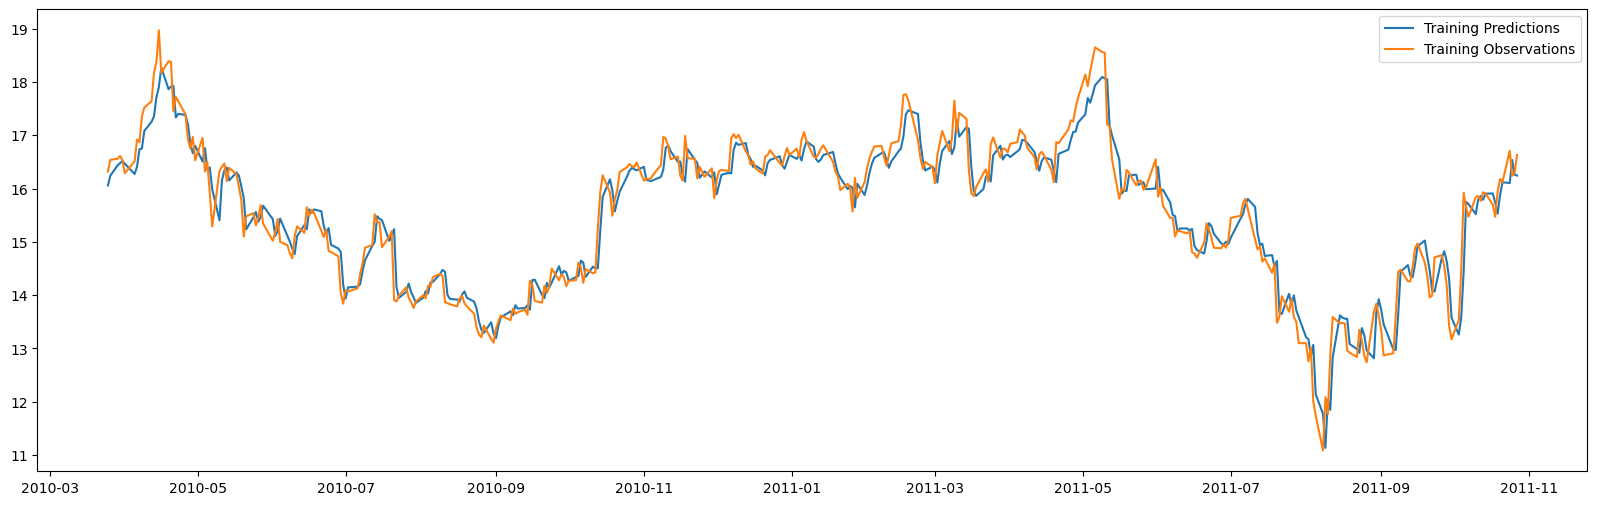

In [176]:
train_predictions_adjusted = best_model.predict(X_train_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_train_adjusted, train_predictions_adjusted)
plt.plot(dates_train_adjusted, y_train_adjusted)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 3ms/step


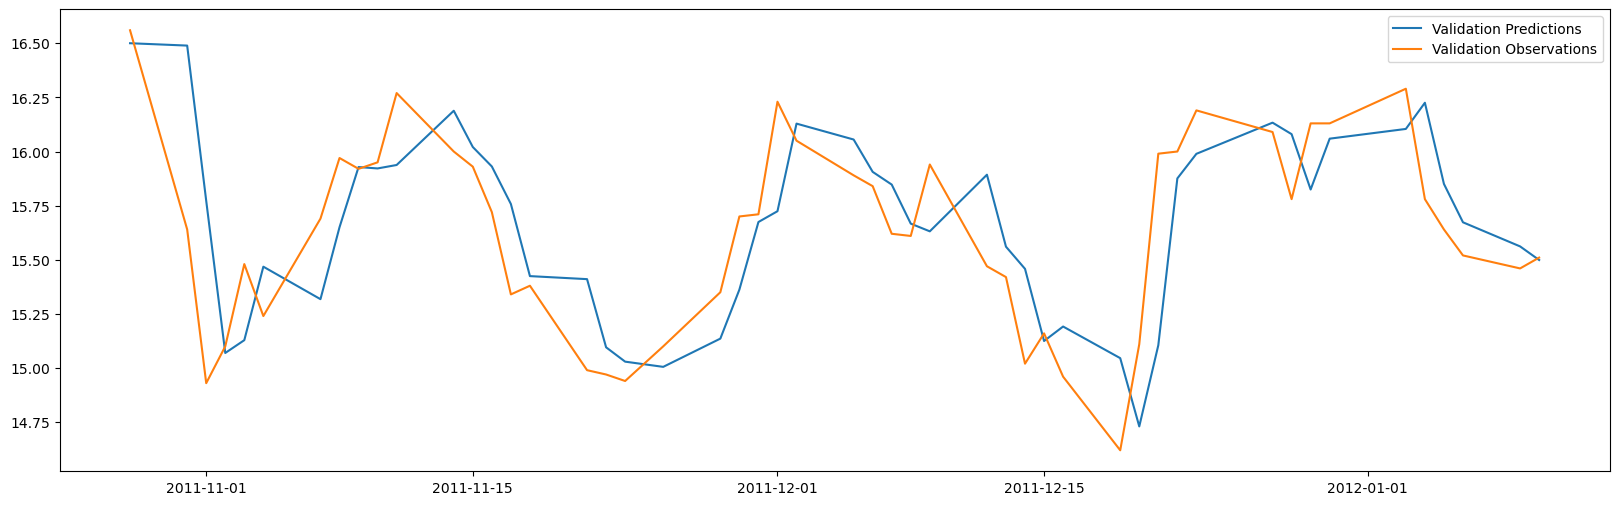

In [177]:
val_predictions_adjusted = best_model.predict(X_val_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_val_adjusted, val_predictions_adjusted)
plt.plot(dates_val_adjusted, y_val_adjusted)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 3ms/step


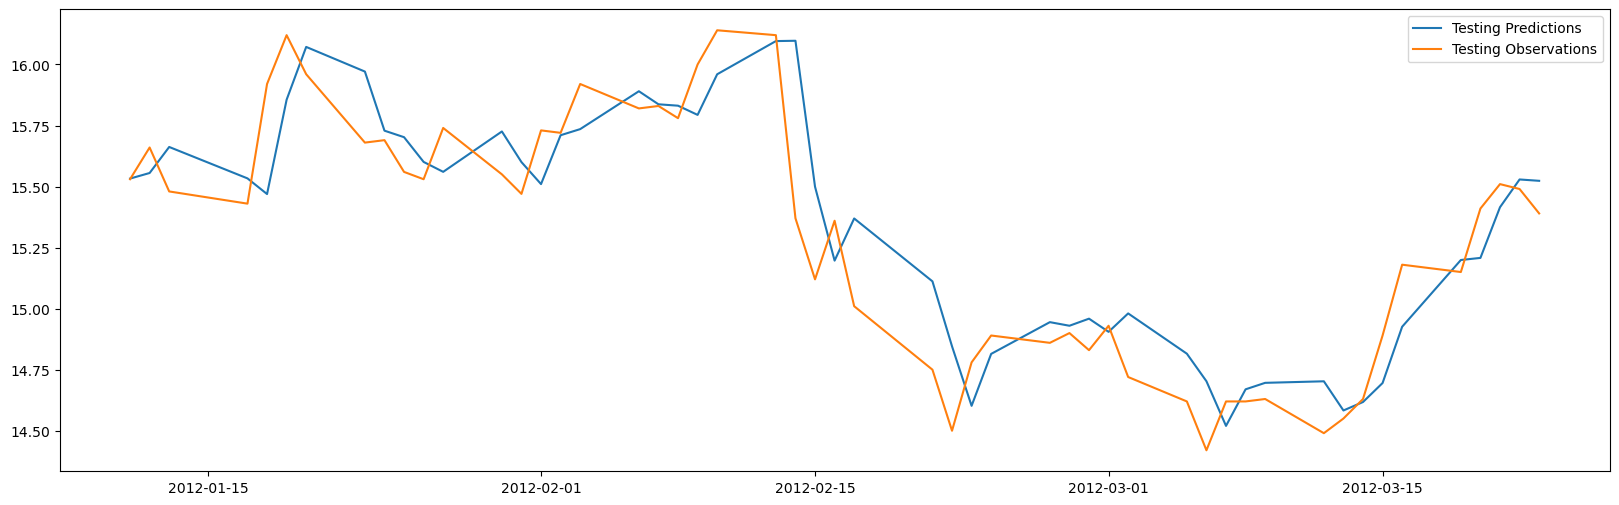

In [178]:
test_predictions_adjusted = best_model.predict(X_test_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_test_adjusted, test_predictions_adjusted)
plt.plot(dates_test_adjusted, y_test_adjusted)
plt.legend(['Testing Predictions', 'Testing Observations'])

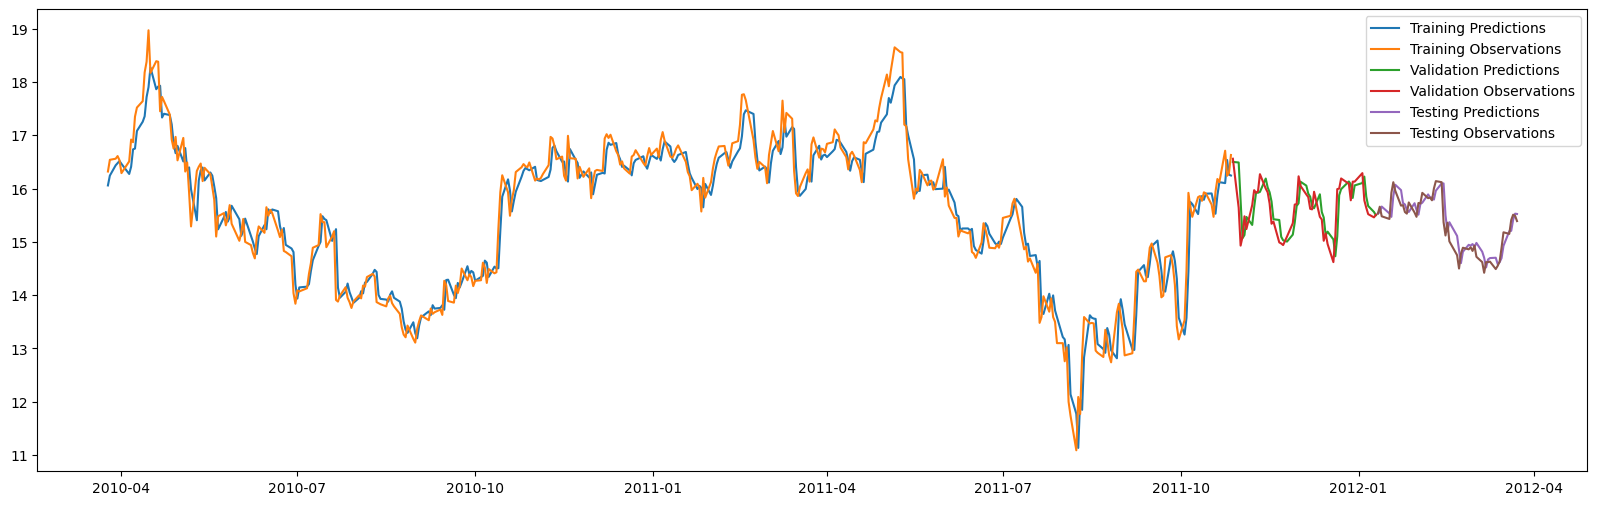

In [179]:
plt.figure(figsize = (20, 6))
plt.plot(dates_train_adjusted, train_predictions_adjusted)
plt.plot(dates_train_adjusted, y_train_adjusted)
plt.plot(dates_val_adjusted, val_predictions_adjusted)
plt.plot(dates_val_adjusted, y_val_adjusted)
plt.plot(dates_test_adjusted, test_predictions_adjusted)
plt.plot(dates_test_adjusted, y_test_adjusted)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [180]:
# RMSE hesaplama
squared_errors = (np.concatenate((y_train_adjusted, y_val_adjusted, y_test_adjusted)) - np.concatenate((train_predictions_adjusted, val_predictions_adjusted, test_predictions_adjusted))) ** 2
mean_squared_error_value = np.mean(squared_errors)
rmse_value_LSTM = np.sqrt(mean_squared_error_value)

print("RMSE Value: {0}".format(rmse_value_LSTM))

RMSE Value: 0.3397522270679474


In [181]:
print("Accuracy score of the predictions: {0}".format(r2_score(np.concatenate((y_train_adjusted, y_val_adjusted, y_test_adjusted)), np.concatenate((train_predictions_adjusted, val_predictions_adjusted, test_predictions_adjusted)))))


Accuracy score of the predictions: 0.9292019624409587


**RESULT**

The RMSE value we obtained with the Relu activation function is within a very acceptable range. More successful predictions can be made by increasing the number of data we have.

The ReLU (Rectified Linear Unit) activation function is widely used, especially in deep learning and artificial neural network models. ReLU is a function that directly transmits the input as an activation function when the weighted sum of the input is positive and gives zero output when it is negative.

However, ReLU is a preferred activation function in many cases because it can provide better flow of gradients and faster learning when training the network. However, since it also carries the risk of overfitting, it must be carefully adjusted in model development and must be tested strictly to increase prediction success.

#### LSTM with Sigmoid Activation Function

In [182]:
best_hyperparameters = None
best_model = None
def build_model(hp):
    model = Sequential()
    model.add(layers.Input((3, 1)))
    model.add(layers.LSTM(64))
    model.add(layers.Dense(32, activation='sigmoid'))
    model.add(layers.Dense(32, activation='sigmoid'))
    model.add(layers.Dense(1))
    
    # Tune edilecek hiperparametreler ve değer aralıkları
    hp_learning_rate = hp.Choice('learning_rate', values=[0.0001, 0.001, 0.01, 0.1])
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adagrad', 'nadam'])
    
    model.compile(loss='mse', optimizer=hp_optimizer, metrics=['mean_absolute_error'])
    
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Denenecek farklı hiperparametre kombinasyonlarının sayısı
    directory='random_search',
    project_name='my_model')

# Modeli arama işlemi başlatın
tuner.search(X_train_adjusted, y_train_adjusted, validation_data=(X_val_adjusted, y_val_adjusted), epochs=100)

# En iyi hiperparametreleri ve modeli alın
best_hyperparameters = tuner.get_best_hyperparameters()[0]
best_model = tuner.hypermodel.build(best_hyperparameters)

# Eğitim işlemi
best_model.fit(X_train_adjusted, y_train_adjusted, validation_data=(X_val_adjusted, y_val_adjusted), epochs=100)

# En iyi hiperparametreleri ve modeli yazdırın
print("En iyi hiperparametreler:")
print(best_hyperparameters.values)
print("\nEn iyi model özeti:")
best_model.summary()


Reloading Tuner from random_search\my_model\tuner0.json
Epoch 1/100
13/13 [==============================] - 2s 45ms/step - loss: 235.2184 - mean_absolute_error: 15.2672 - val_loss: 217.3255 - val_mean_absolute_error: 14.7354
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 204.8784 - mean_absolute_error: 14.2426 - val_loss: 192.7206 - val_mean_absolute_error: 13.8755
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 183.0331 - mean_absolute_error: 13.4528 - val_loss: 173.5648 - val_mean_absolute_error: 13.1671
Epoch 4/100
13/13 [==============================] - 0s 9ms/step - loss: 165.7583 - mean_absolute_error: 12.7968 - val_loss: 158.1473 - val_mean_absolute_error: 12.5680
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 151.7951 - mean_absolute_error: 12.2402 - val_loss: 145.5899 - val_mean_absolute_error: 12.0581
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 140.3507 - mean_absolute_

Epoch 50/100
13/13 [==============================] - 0s 8ms/step - loss: 1.9738 - mean_absolute_error: 1.1857 - val_loss: 0.2077 - val_mean_absolute_error: 0.3851
Epoch 51/100
13/13 [==============================] - 0s 8ms/step - loss: 1.9688 - mean_absolute_error: 1.1840 - val_loss: 0.2041 - val_mean_absolute_error: 0.3816
Epoch 52/100
13/13 [==============================] - 0s 8ms/step - loss: 1.9648 - mean_absolute_error: 1.1857 - val_loss: 0.1955 - val_mean_absolute_error: 0.3738
Epoch 53/100
13/13 [==============================] - 0s 8ms/step - loss: 1.9569 - mean_absolute_error: 1.1778 - val_loss: 0.2013 - val_mean_absolute_error: 0.3789
Epoch 54/100
13/13 [==============================] - 0s 6ms/step - loss: 1.9395 - mean_absolute_error: 1.1752 - val_loss: 0.1910 - val_mean_absolute_error: 0.3681
Epoch 55/100
13/13 [==============================] - 0s 6ms/step - loss: 1.9137 - mean_absolute_error: 1.1607 - val_loss: 0.2158 - val_mean_absolute_error: 0.3923
Epoch 56/100
13/

Epoch 100/100
13/13 [==============================] - 0s 7ms/step - loss: 0.3396 - mean_absolute_error: 0.4270 - val_loss: 0.2768 - val_mean_absolute_error: 0.4147
En iyi hiperparametreler:
{'learning_rate': 0.1, 'optimizer': 'rmsprop'}

En iyi model özeti:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20065 (78.38 KB)
Trainable params: 20065 (78.

13/13 [==============================] - 0s 2ms/step


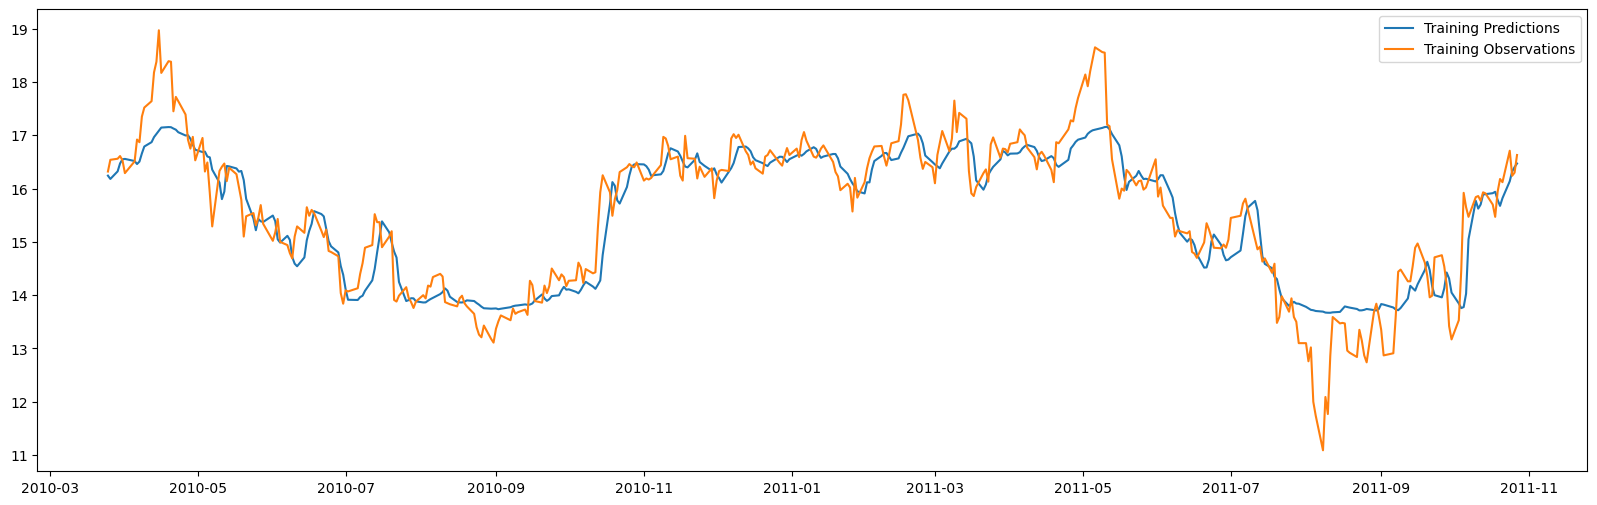

In [183]:
train_predictions_adjusted = best_model.predict(X_train_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_train_adjusted, train_predictions_adjusted)
plt.plot(dates_train_adjusted, y_train_adjusted)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 4ms/step


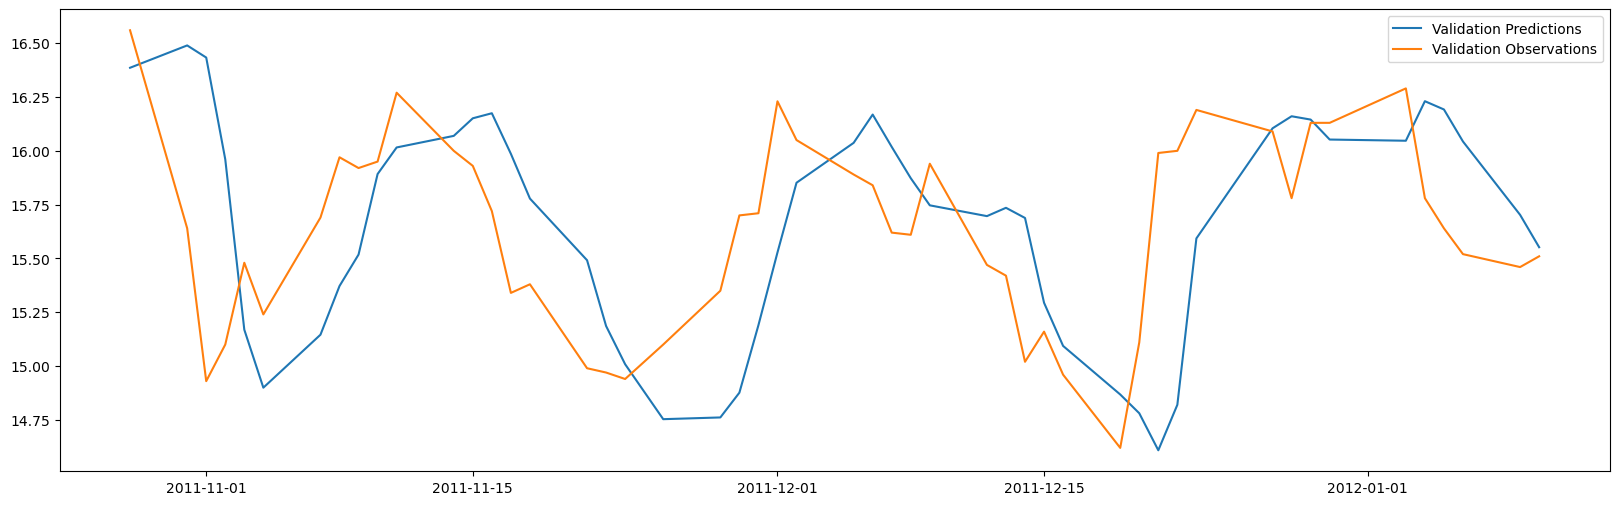

In [184]:
val_predictions_adjusted = best_model.predict(X_val_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_val_adjusted, val_predictions_adjusted)
plt.plot(dates_val_adjusted, y_val_adjusted)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 4ms/step


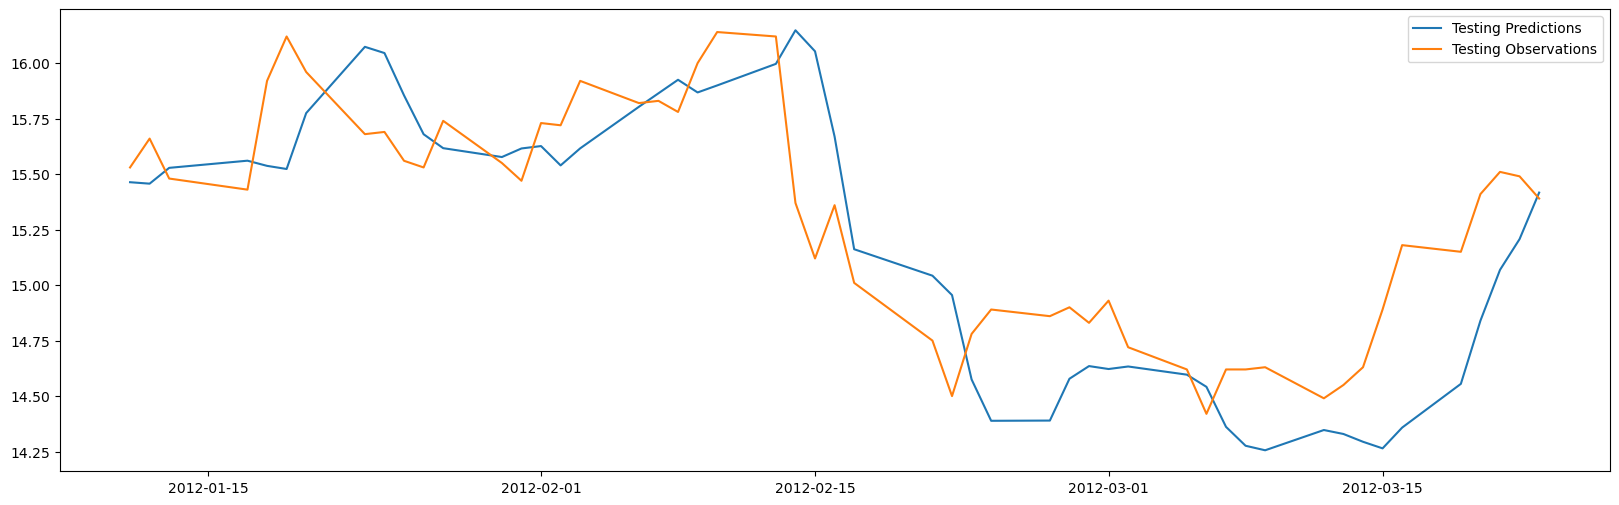

In [185]:
test_predictions_adjusted = best_model.predict(X_test_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_test_adjusted, test_predictions_adjusted)
plt.plot(dates_test_adjusted, y_test_adjusted)
plt.legend(['Testing Predictions', 'Testing Observations'])

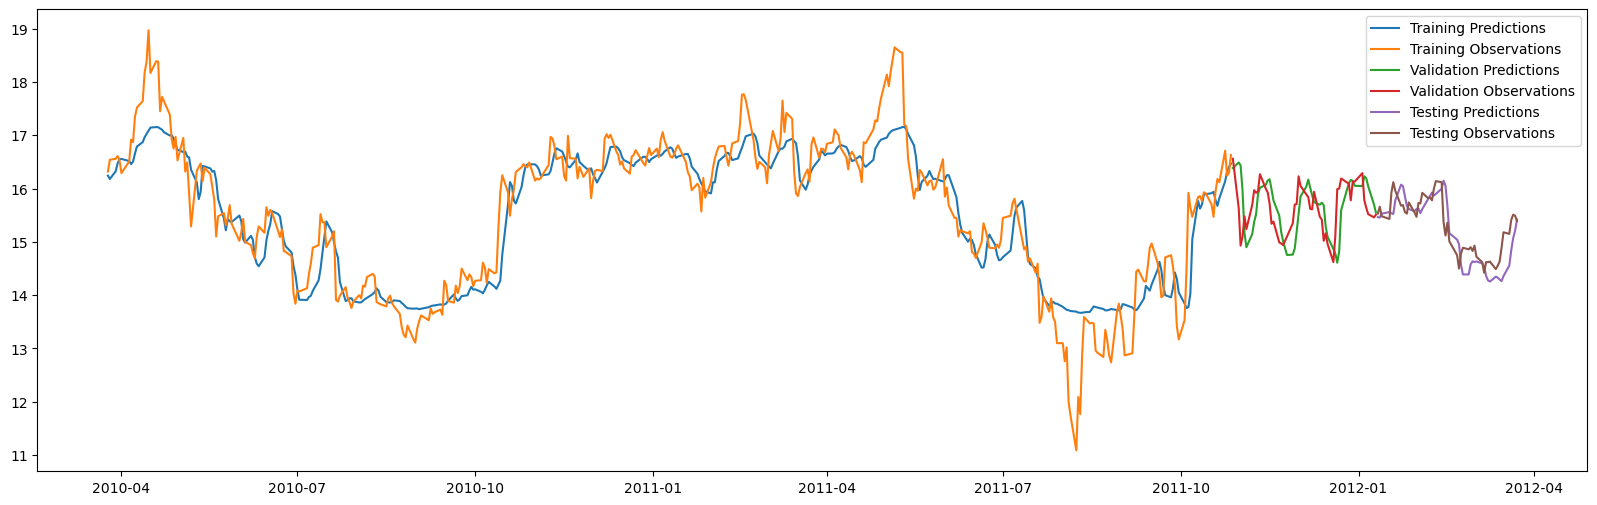

In [186]:
plt.figure(figsize = (20, 6))
plt.plot(dates_train_adjusted, train_predictions_adjusted)
plt.plot(dates_train_adjusted, y_train_adjusted)
plt.plot(dates_val_adjusted, val_predictions_adjusted)
plt.plot(dates_val_adjusted, y_val_adjusted)
plt.plot(dates_test_adjusted, test_predictions_adjusted)
plt.plot(dates_test_adjusted, y_test_adjusted)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [187]:
# RMSE hesaplama
squared_errors = (np.concatenate((y_train_adjusted, y_val_adjusted, y_test_adjusted)) - np.concatenate((train_predictions_adjusted, val_predictions_adjusted, test_predictions_adjusted))) ** 2
mean_squared_error_value = np.mean(squared_errors)
rmse_value_LSTM = np.sqrt(mean_squared_error_value)

print("RMSE Value: {0}".format(rmse_value_LSTM))

RMSE Value: 0.5253307223320007


In [188]:
print("Accuracy score of the predictions: {0}".format(r2_score(np.concatenate((y_train_adjusted, y_val_adjusted, y_test_adjusted)), np.concatenate((train_predictions_adjusted, val_predictions_adjusted, test_predictions_adjusted)))))


Accuracy score of the predictions: 0.830736956872557


**RESULT**


An RMSE value such as 0.5253307223320007 seems to indicate that your model's predictions are close to the true values and provide a good fit to the data. Although it is within the acceptable range, we have activation functions that give better results than this.

#### LSTM with Hyperbolic Tangent Activation Function

In [189]:
best_hyperparameters = None
best_model = None
def build_model(hp):
    model = Sequential()
    model.add(layers.Input((3, 1)))
    model.add(layers.LSTM(64))
    model.add(layers.Dense(32, activation='tanh'))
    model.add(layers.Dense(32, activation='tanh'))
    model.add(layers.Dense(1))
    
    # Tune edilecek hiperparametreler ve değer aralıkları
    hp_learning_rate = hp.Choice('learning_rate', values=[0.0001, 0.001, 0.01, 0.1])
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adagrad', 'nadam'])
    
    model.compile(loss='mse', optimizer=hp_optimizer, metrics=['mean_absolute_error'])
    
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=100,  # Denenecek farklı hiperparametre kombinasyonlarının sayısı
    directory='random_search',
    project_name='my_model')

# Modeli arama işlemi başlatın
tuner.search(X_train_adjusted, y_train_adjusted, validation_data=(X_val_adjusted, y_val_adjusted), epochs=100)

# En iyi hiperparametreleri ve modeli alın
best_hyperparameters = tuner.get_best_hyperparameters()[0]
best_model = tuner.hypermodel.build(best_hyperparameters)

# Eğitim işlemi
best_model.fit(X_train_adjusted, y_train_adjusted, validation_data=(X_val_adjusted, y_val_adjusted), epochs=100)

# En iyi hiperparametreleri ve modeli yazdırın
print("En iyi hiperparametreler:")
print(best_hyperparameters.values)
print("\nEn iyi model özeti:")
best_model.summary()


Reloading Tuner from random_search\my_model\tuner0.json
Epoch 1/100
13/13 [==============================] - 2s 44ms/step - loss: 183.3759 - mean_absolute_error: 13.4066 - val_loss: 131.7381 - val_mean_absolute_error: 11.4691
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 110.2914 - mean_absolute_error: 10.3883 - val_loss: 90.9705 - val_mean_absolute_error: 9.5276
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 81.9006 - mean_absolute_error: 8.9365 - val_loss: 72.6222 - val_mean_absolute_error: 8.5106
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 67.5850 - mean_absolute_error: 8.0952 - val_loss: 61.5313 - val_mean_absolute_error: 7.8319
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 57.9738 - mean_absolute_error: 7.4818 - val_loss: 53.0599 - val_mean_absolute_error: 7.2711
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 50.3098 - mean_absolute_error: 6.9498 -

13/13 [==============================] - 0s 6ms/step - loss: 1.9807 - mean_absolute_error: 1.1896 - val_loss: 0.1979 - val_mean_absolute_error: 0.3764
En iyi hiperparametreler:
{'learning_rate': 0.1, 'optimizer': 'rmsprop'}

En iyi model özeti:
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20065 (78.38 KB)
Trainable params: 20065 (78.38 KB)
Non-tra

13/13 [==============================] - 0s 2ms/step


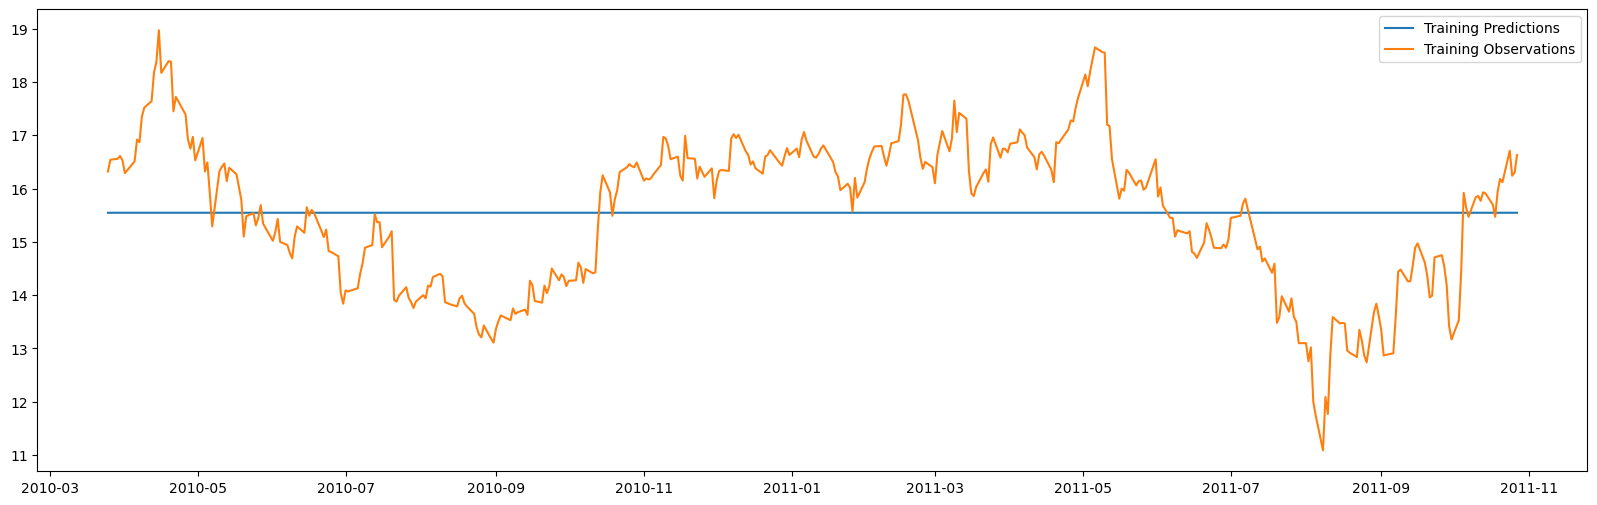

In [190]:
train_predictions_adjusted = best_model.predict(X_train_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_train_adjusted, train_predictions_adjusted)
plt.plot(dates_train_adjusted, y_train_adjusted)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 4ms/step


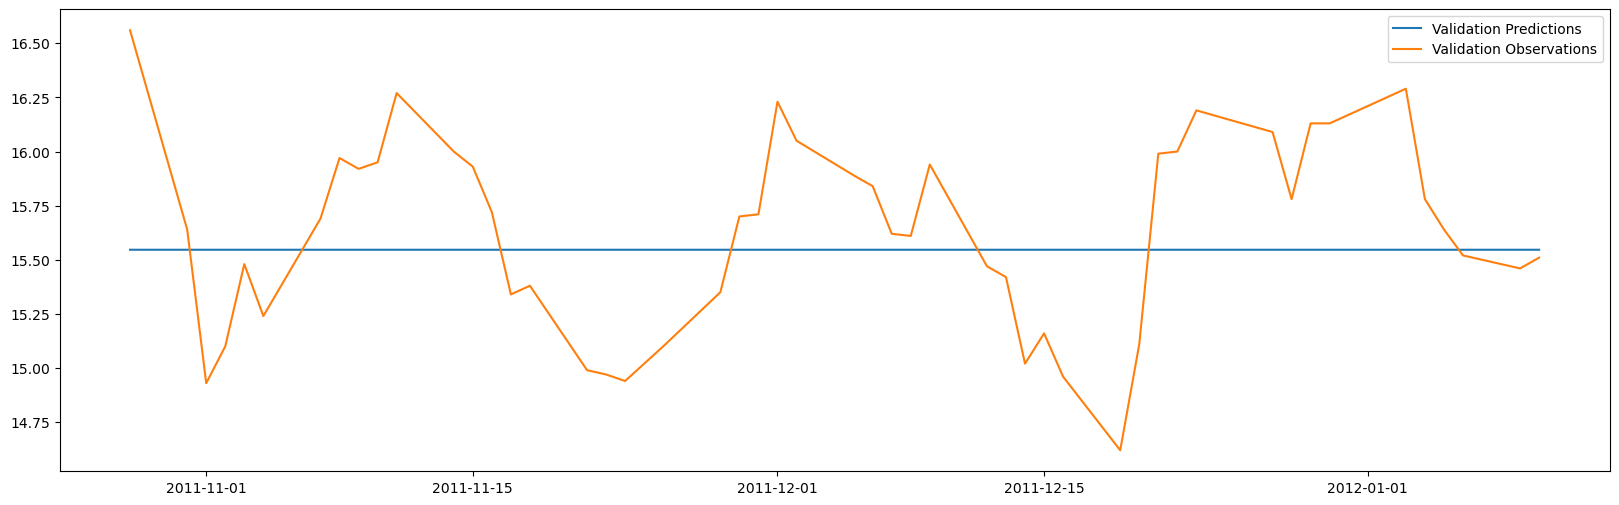

In [191]:
val_predictions_adjusted = best_model.predict(X_val_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_val_adjusted, val_predictions_adjusted)
plt.plot(dates_val_adjusted, y_val_adjusted)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 4ms/step


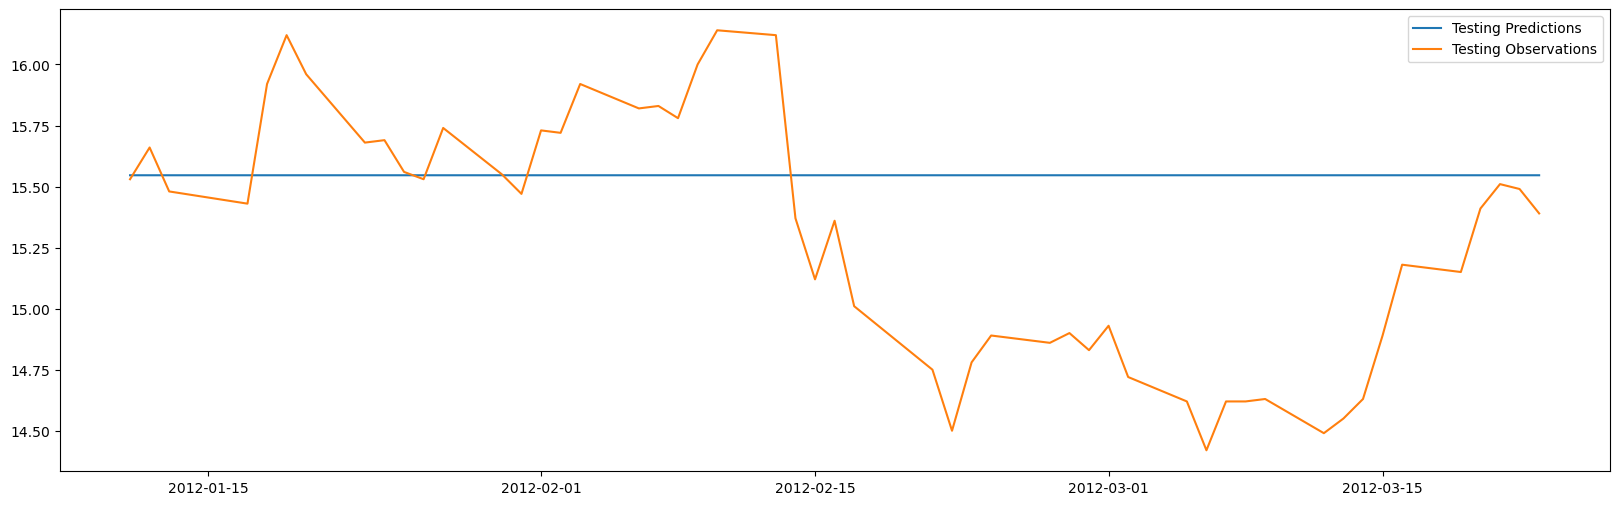

In [192]:
test_predictions_adjusted = best_model.predict(X_test_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_test_adjusted, test_predictions_adjusted)
plt.plot(dates_test_adjusted, y_test_adjusted)
plt.legend(['Testing Predictions', 'Testing Observations'])

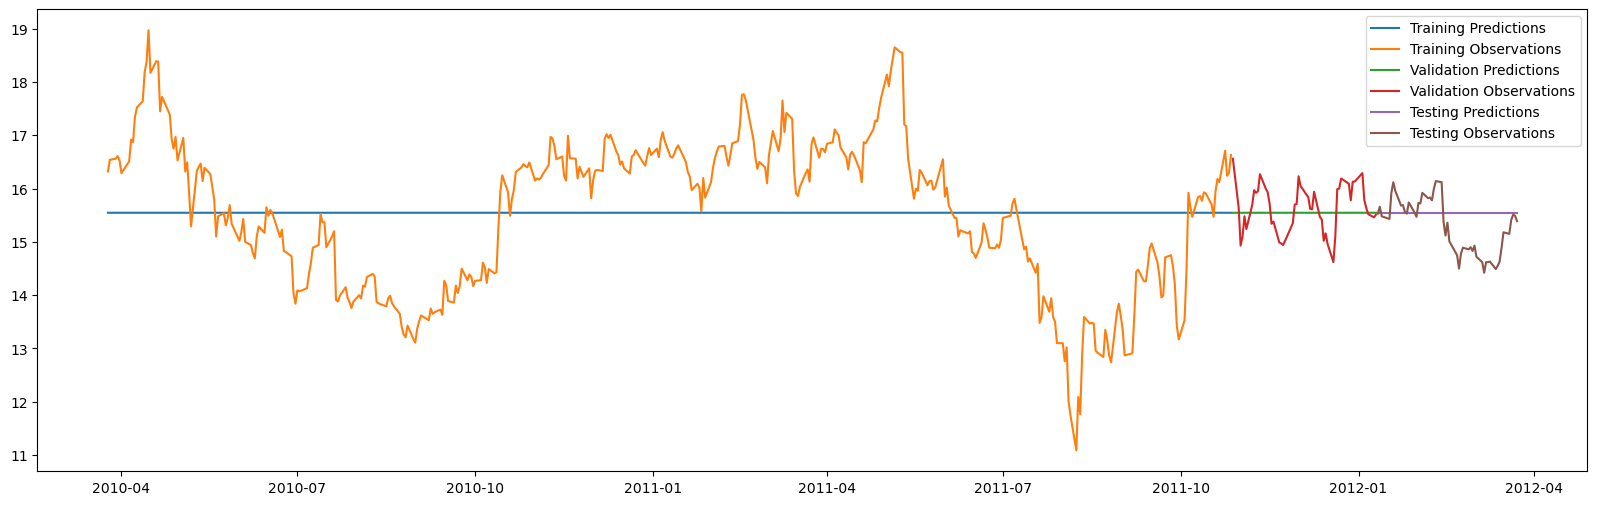

In [193]:
plt.figure(figsize = (20, 6))
plt.plot(dates_train_adjusted, train_predictions_adjusted)
plt.plot(dates_train_adjusted, y_train_adjusted)
plt.plot(dates_val_adjusted, val_predictions_adjusted)
plt.plot(dates_val_adjusted, y_val_adjusted)
plt.plot(dates_test_adjusted, test_predictions_adjusted)
plt.plot(dates_test_adjusted, y_test_adjusted)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [194]:
# RMSE hesaplama
squared_errors = (np.concatenate((y_train_adjusted, y_val_adjusted, y_test_adjusted)) - np.concatenate((train_predictions_adjusted, val_predictions_adjusted, test_predictions_adjusted))) ** 2
mean_squared_error_value = np.mean(squared_errors)
rmse_value_LSTM = np.sqrt(mean_squared_error_value)

print("RMSE Value: {0}".format(rmse_value_LSTM))

RMSE Value: 1.2772005796432495


In [195]:
print("Accuracy score of the predictions: {0}".format(r2_score(np.concatenate((y_train_adjusted, y_val_adjusted, y_test_adjusted)), np.concatenate((train_predictions_adjusted, val_predictions_adjusted, test_predictions_adjusted)))))


Accuracy score of the predictions: -0.0004947348408372854


**RESULT** 

Hyperbolic Tangent activation function is a commonly used activation function in LSTM and similar neural network models. However, it needs correct hyperparameter settings and training process. When the activation function is set incorrectly, it may negatively impact prediction performance. Hyperbolic Tangent activation function, Tanh activation function is especially useful when the input data is between -1 and 1. This is commonly used when data needs to be scaled or when data needs to be compressed into a narrower range. Especially if the mean is around zero and the variance is balanced, the tanh function can be used. Since our data consists mostly of positive values, the predictions are far from the real values because they are not suitable for the data set we have. And the predictions were far from the real values.

As a result, we decided not to use this activation code because the results in the graphs were extremely different from what they should have been. And we thought that the bad result might be incompatibility with the data.

#### LSTM with Rectified Linear Unit (ReLu) Activation Function

In [196]:
best_hyperparameters = None
best_model = None
def build_model(hp):
    model = Sequential()
    model.add(layers.Input((3, 1)))
    model.add(layers.LSTM(64))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    
    # Tune edilecek hiperparametreler ve değer aralıkları
    hp_learning_rate = hp.Choice('learning_rate', values=[0.0001, 0.001, 0.01, 0.1])
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adagrad', 'nadam'])
    
    model.compile(loss='mse', optimizer=hp_optimizer, metrics=['mean_absolute_error'])
    
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=100,  # Denenecek farklı hiperparametre kombinasyonlarının sayısı
    directory='random_search',
    project_name='my_model')

# Modeli arama işlemi başlatın
tuner.search(X_train_adjusted, y_train_adjusted, validation_data=(X_val_adjusted, y_val_adjusted), epochs=100)

# En iyi hiperparametreleri ve modeli alın
best_hyperparameters = tuner.get_best_hyperparameters()[0]
best_model = tuner.hypermodel.build(best_hyperparameters)

# Eğitim işlemi
best_model.fit(X_train_adjusted, y_train_adjusted, validation_data=(X_val_adjusted, y_val_adjusted), epochs=100)

# En iyi hiperparametreleri ve modeli yazdırın
print("En iyi hiperparametreler:")
print(best_hyperparameters.values)
print("\nEn iyi model özeti:")
best_model.summary()


Reloading Tuner from random_search\my_model\tuner0.json
Epoch 1/100
13/13 [==============================] - 2s 43ms/step - loss: 237.3271 - mean_absolute_error: 15.3403 - val_loss: 222.3938 - val_mean_absolute_error: 14.9065
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 195.5237 - mean_absolute_error: 13.8948 - val_loss: 155.7784 - val_mean_absolute_error: 12.4735
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 117.5620 - mean_absolute_error: 10.7088 - val_loss: 71.7710 - val_mean_absolute_error: 8.4605
Epoch 4/100
13/13 [==============================] - 0s 9ms/step - loss: 43.2653 - mean_absolute_error: 6.3262 - val_loss: 14.9472 - val_mean_absolute_error: 3.8414
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 7.5039 - mean_absolute_error: 2.3277 - val_loss: 0.9805 - val_mean_absolute_error: 0.8927
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 1.9967 - mean_absolute_error: 1.2046 

13/13 [==============================] - 0s 7ms/step - loss: 0.3092 - mean_absolute_error: 0.4426 - val_loss: 0.1373 - val_mean_absolute_error: 0.2968
En iyi hiperparametreler:
{'learning_rate': 0.1, 'optimizer': 'rmsprop'}

En iyi model özeti:
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 32)                1056      
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20065 (78.38 KB)
Trainable params: 20065 (78.38 KB)
Non-tra

13/13 [==============================] - 0s 2ms/step


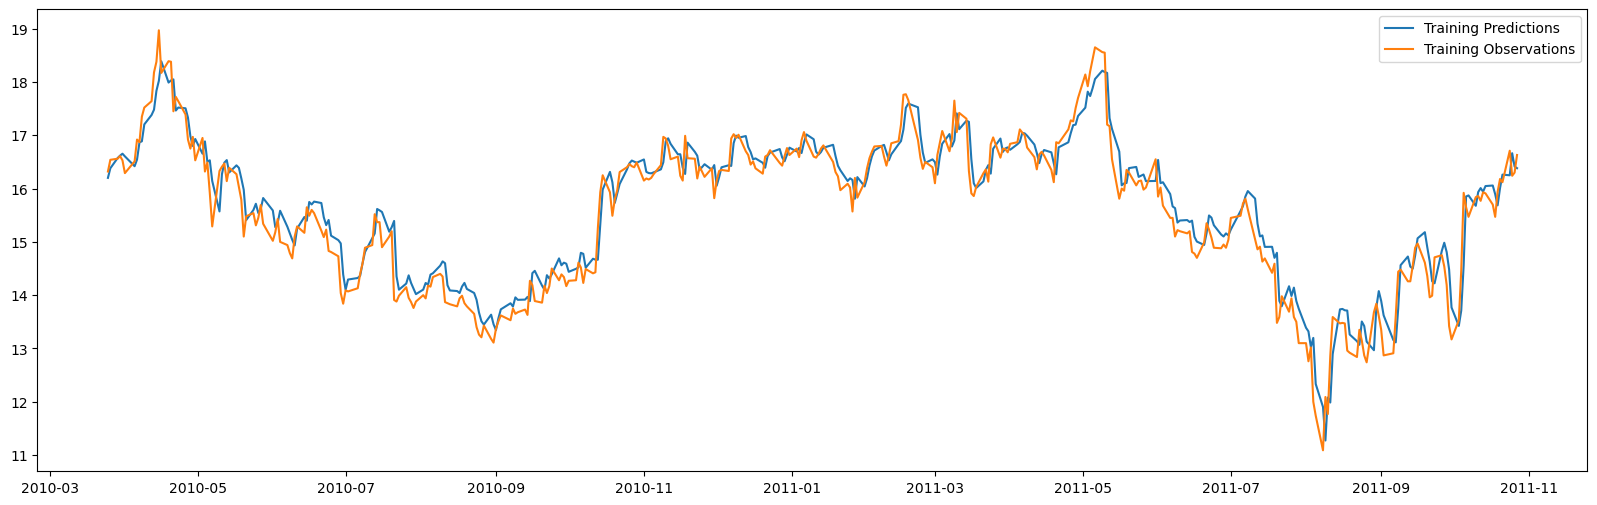

In [197]:
train_predictions_adjusted = best_model.predict(X_train_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_train_adjusted, train_predictions_adjusted)
plt.plot(dates_train_adjusted, y_train_adjusted)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 3ms/step


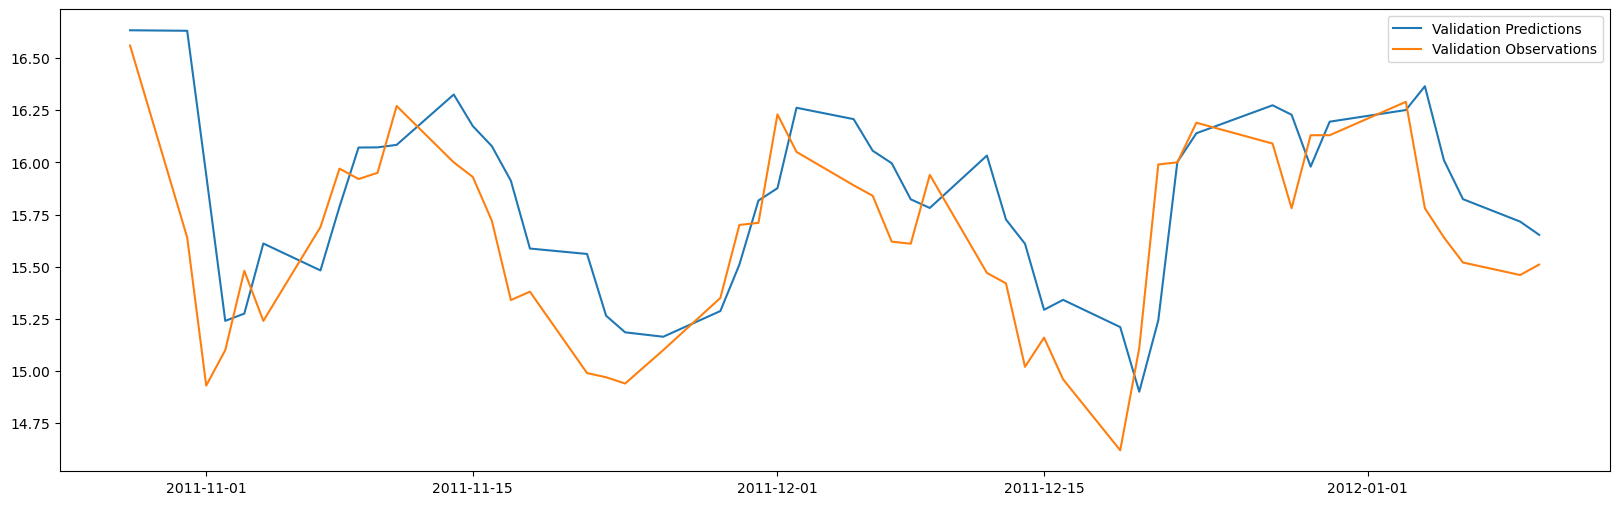

In [198]:
val_predictions_adjusted = best_model.predict(X_val_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_val_adjusted, val_predictions_adjusted)
plt.plot(dates_val_adjusted, y_val_adjusted)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 3ms/step


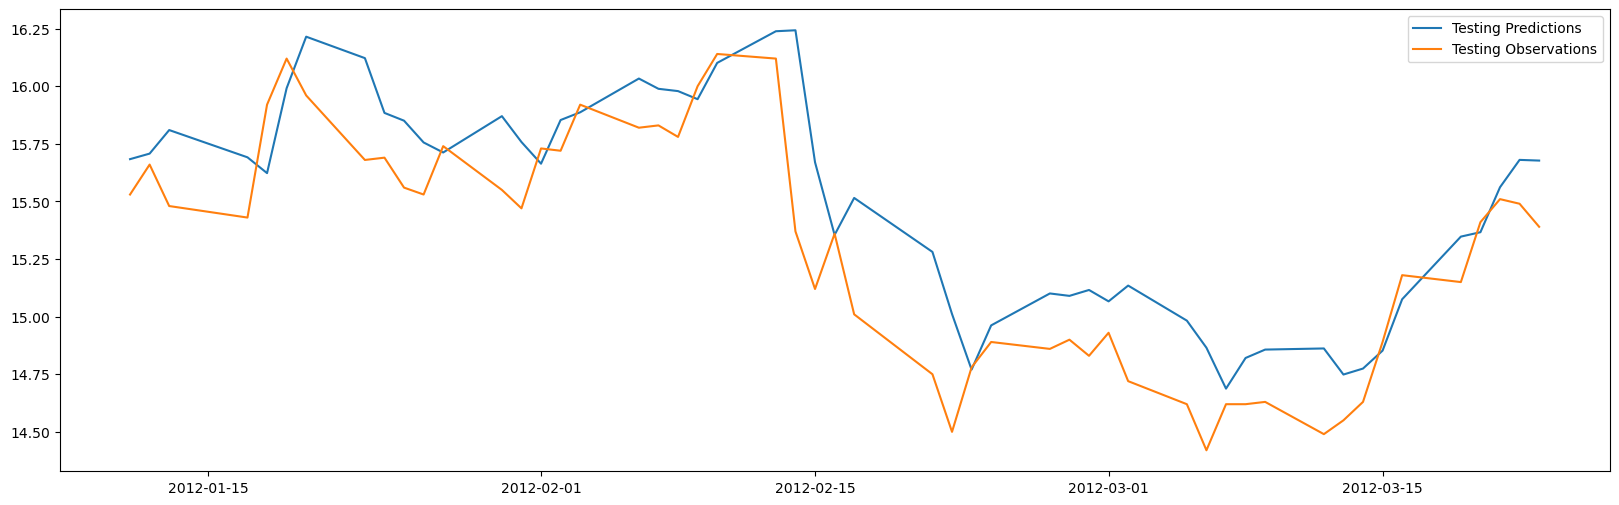

In [199]:
test_predictions_adjusted = best_model.predict(X_test_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_test_adjusted, test_predictions_adjusted)
plt.plot(dates_test_adjusted, y_test_adjusted)
plt.legend(['Testing Predictions', 'Testing Observations'])

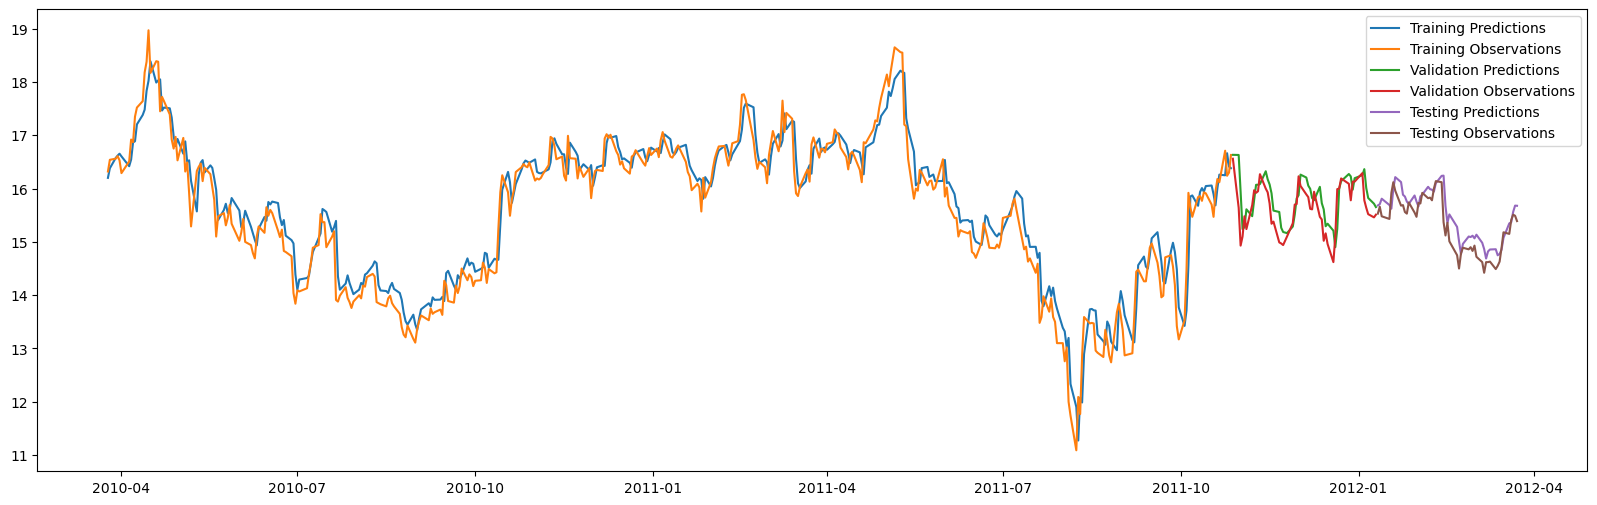

In [200]:
plt.figure(figsize = (20, 6))
plt.plot(dates_train_adjusted, train_predictions_adjusted)
plt.plot(dates_train_adjusted, y_train_adjusted)
plt.plot(dates_val_adjusted, val_predictions_adjusted)
plt.plot(dates_val_adjusted, y_val_adjusted)
plt.plot(dates_test_adjusted, test_predictions_adjusted)
plt.plot(dates_test_adjusted, y_test_adjusted)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [201]:
# RMSE hesaplama
squared_errors = (np.concatenate((y_train_adjusted, y_val_adjusted, y_test_adjusted)) - np.concatenate((train_predictions_adjusted, val_predictions_adjusted, test_predictions_adjusted))) ** 2
mean_squared_error_value = np.mean(squared_errors)
rmse_value_LSTM = np.sqrt(mean_squared_error_value)

print("RMSE Value: {0}".format(rmse_value_LSTM))

RMSE Value: 0.3693530857563019


In [202]:
print("Accuracy score of the predictions: {0}".format(r2_score(np.concatenate((y_train_adjusted, y_val_adjusted, y_test_adjusted)), np.concatenate((train_predictions_adjusted, val_predictions_adjusted, test_predictions_adjusted)))))


Accuracy score of the predictions: 0.916328006086059


#### LSTM with Leaky Rectified Linear Unit (Leaky ReLU) Activation Function

In [203]:
best_hyperparameters = None
best_model = None
def build_model(hp):
    model = Sequential()
    model.add(layers.Input((3, 1)))
    model.add(layers.LSTM(64))
    model.add(layers.Dense(32, activation='linear'))  # Leaky ReLU aktivasyon eklenmiş
    model.add(layers.LeakyReLU(alpha=0.01))  # Leaky ReLU fonksiyonu eklenmiş
    model.add(layers.Dense(32, activation='linear'))  # Leaky ReLU aktivasyon eklenmiş
    model.add(layers.LeakyReLU(alpha=0.01))  # Leaky ReLU fonksiyonu eklenmiş
    model.add(layers.Dense(1))
    
    # Tune edilecek hiperparametreler ve değer aralıkları
    hp_learning_rate = hp.Choice('learning_rate', values=[0.0001, 0.001, 0.01, 0.1])
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adagrad', 'nadam'])
    
    model.compile(loss='mse', optimizer=hp_optimizer, metrics=['mean_absolute_error'])
    
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=100,  # Denenecek farklı hiperparametre kombinasyonlarının sayısı
    directory='random_search',
    project_name='my_model')

# Modeli arama işlemi başlatın
tuner.search(X_train_adjusted, y_train_adjusted, validation_data=(X_val_adjusted, y_val_adjusted), epochs=100)

# En iyi hiperparametreleri ve modeli alın
best_hyperparameters = tuner.get_best_hyperparameters()[0]
best_model = tuner.hypermodel.build(best_hyperparameters)

# Eğitim işlemi
best_model.fit(X_train_adjusted, y_train_adjusted, validation_data=(X_val_adjusted, y_val_adjusted), epochs=100)

# En iyi hiperparametreleri ve modeli yazdırın
print("En iyi hiperparametreler:")
print(best_hyperparameters.values)
print("\nEn iyi model özeti:")
best_model.summary()


Reloading Tuner from random_search\my_model\tuner0.json
Epoch 1/100
13/13 [==============================] - 2s 43ms/step - loss: 188.5821 - mean_absolute_error: 13.6169 - val_loss: 122.0073 - val_mean_absolute_error: 11.0369
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 66.7985 - mean_absolute_error: 7.8062 - val_loss: 14.7075 - val_mean_absolute_error: 3.8085
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 5.6021 - mean_absolute_error: 1.9618 - val_loss: 0.2547 - val_mean_absolute_error: 0.4280
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 1.9855 - mean_absolute_error: 1.1887 - val_loss: 0.2504 - val_mean_absolute_error: 0.4024
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 1.8723 - mean_absolute_error: 1.1356 - val_loss: 0.8813 - val_mean_absolute_error: 0.8353
Epoch 6/100
13/13 [==============================] - 0s 12ms/step - loss: 1.7832 - mean_absolute_error: 1.1271 - val_los

13/13 [==============================] - 0s 6ms/step - loss: 0.3801 - mean_absolute_error: 0.5132 - val_loss: 0.2224 - val_mean_absolute_error: 0.3868
En iyi hiperparametreler:
{'learning_rate': 0.1, 'optimizer': 'rmsprop'}

En iyi model özeti:
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0         
       

13/13 [==============================] - 0s 2ms/step


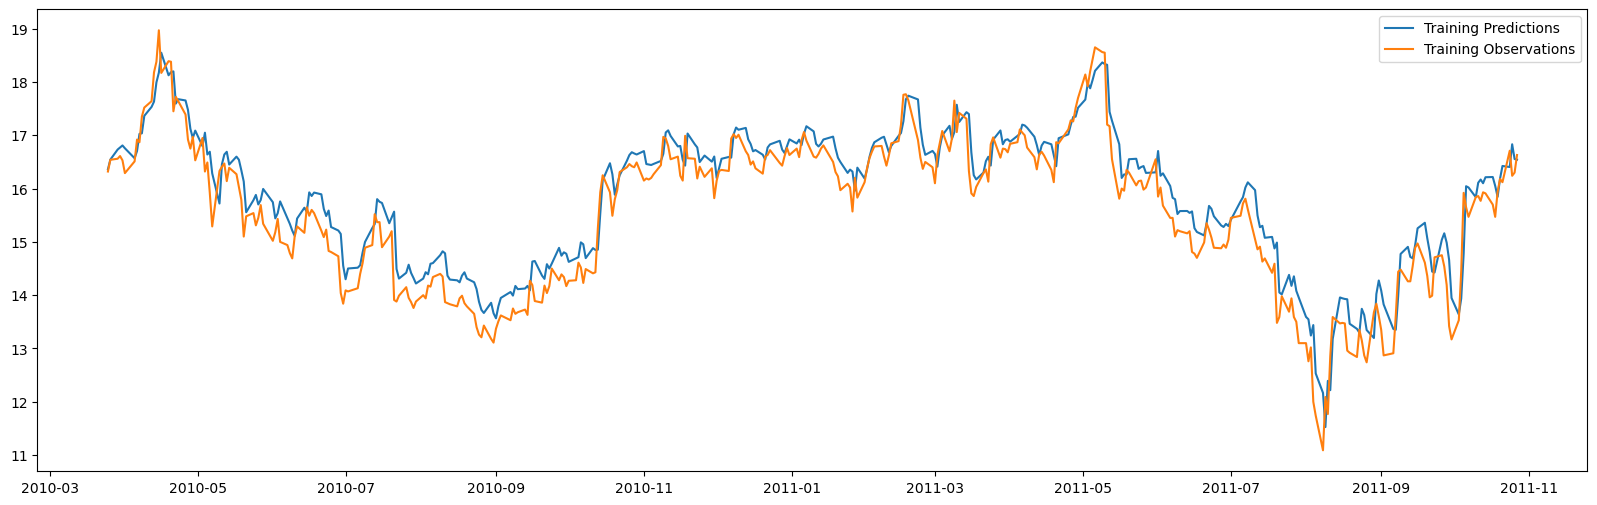

In [204]:
train_predictions_adjusted = best_model.predict(X_train_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_train_adjusted, train_predictions_adjusted)
plt.plot(dates_train_adjusted, y_train_adjusted)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 4ms/step


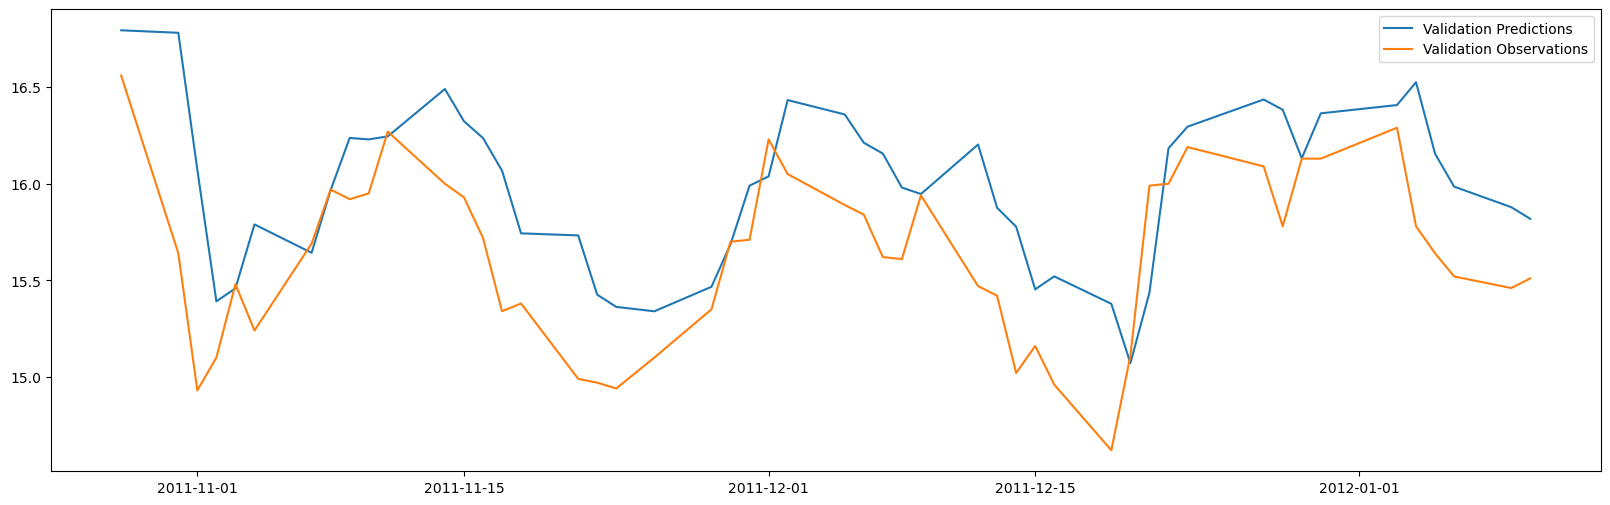

In [205]:
val_predictions_adjusted = best_model.predict(X_val_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_val_adjusted, val_predictions_adjusted)
plt.plot(dates_val_adjusted, y_val_adjusted)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 4ms/step


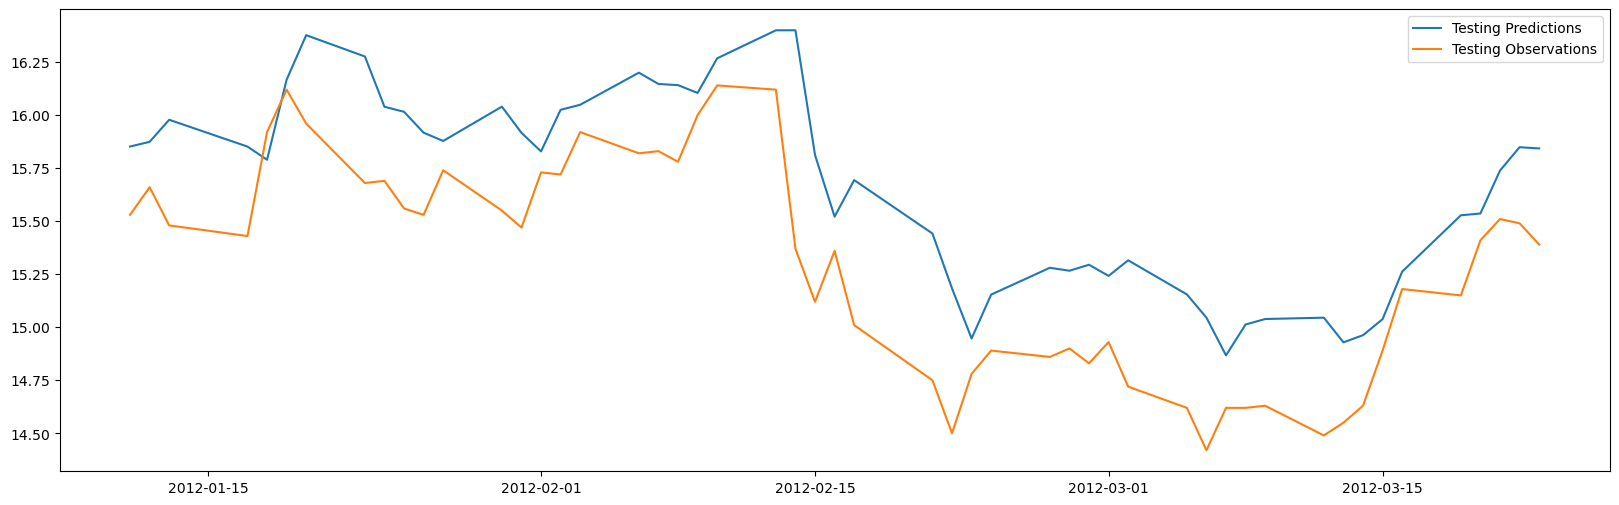

In [206]:
test_predictions_adjusted = best_model.predict(X_test_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_test_adjusted, test_predictions_adjusted)
plt.plot(dates_test_adjusted, y_test_adjusted)
plt.legend(['Testing Predictions', 'Testing Observations'])

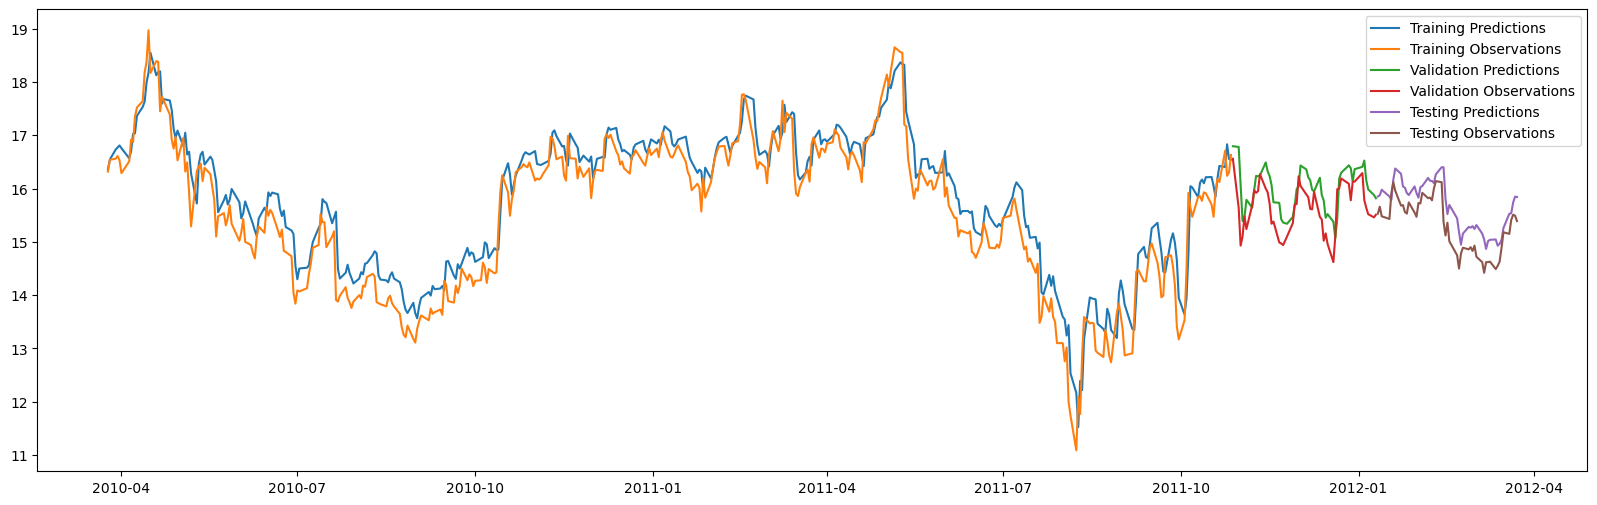

In [207]:
plt.figure(figsize = (20, 6))
plt.plot(dates_train_adjusted, train_predictions_adjusted)
plt.plot(dates_train_adjusted, y_train_adjusted)
plt.plot(dates_val_adjusted, val_predictions_adjusted)
plt.plot(dates_val_adjusted, y_val_adjusted)
plt.plot(dates_test_adjusted, test_predictions_adjusted)
plt.plot(dates_test_adjusted, y_test_adjusted)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [208]:
# RMSE hesaplama
squared_errors = (np.concatenate((y_train_adjusted, y_val_adjusted, y_test_adjusted)) - np.concatenate((train_predictions_adjusted, val_predictions_adjusted, test_predictions_adjusted))) ** 2
mean_squared_error_value = np.mean(squared_errors)
rmse_value_LSTM = np.sqrt(mean_squared_error_value)

print("RMSE Value: {0}".format(rmse_value_LSTM))

RMSE Value: 0.46096888184547424


In [209]:
print("Accuracy score of the predictions: {0}".format(r2_score(np.concatenate((y_train_adjusted, y_val_adjusted, y_test_adjusted)), np.concatenate((train_predictions_adjusted, val_predictions_adjusted, test_predictions_adjusted)))))


Accuracy score of the predictions: 0.8696713782324905


**RESULT**

Although the Leaky ReLU activation function worked well because it is generally used for some special data types, especially image processing, natural language processing, and sensory data, we decided to continue with other activation functions that are better suited to our dataset.

#### LSTM with Exponential Linear Unit (ELU) Activation Function

In [210]:
best_hyperparameters = None
best_model = None
def build_model(hp):
    model = Sequential()
    model.add(layers.Input((3, 1)))
    model.add(layers.LSTM(64))
    model.add(layers.Dense(32, activation='elu'))  # ELU aktivasyon eklenmiş
    model.add(layers.Dense(32, activation='elu'))  # ELU aktivasyon eklenmiş
    model.add(layers.Dense(1))
    
    # Tune edilecek hiperparametreler ve değer aralıkları
    hp_learning_rate = hp.Choice('learning_rate', values=[0.0001, 0.001, 0.01, 0.1])
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adagrad', 'nadam'])
    
    model.compile(loss='mse', optimizer=hp_optimizer, metrics=['mean_absolute_error'])
    
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=100,  # Denenecek farklı hiperparametre kombinasyonlarının sayısı
    directory='random_search',
    project_name='my_model')

# Modeli arama işlemi başlatın
tuner.search(X_train_adjusted, y_train_adjusted, validation_data=(X_val_adjusted, y_val_adjusted), epochs=100)

# En iyi hiperparametreleri ve modeli alın
best_hyperparameters = tuner.get_best_hyperparameters()[0]
best_model = tuner.hypermodel.build(best_hyperparameters)

# Eğitim işlemi
best_model.fit(X_train_adjusted, y_train_adjusted, validation_data=(X_val_adjusted, y_val_adjusted), epochs=100)

# En iyi hiperparametreleri ve modeli yazdırın
print("En iyi hiperparametreler:")
print(best_hyperparameters.values)
print("\nEn iyi model özeti:")
best_model.summary()


Reloading Tuner from random_search\my_model\tuner0.json
Epoch 1/100
13/13 [==============================] - 2s 43ms/step - loss: 135.3810 - mean_absolute_error: 11.3970 - val_loss: 65.7452 - val_mean_absolute_error: 8.0963
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 34.0179 - mean_absolute_error: 5.4212 - val_loss: 6.7790 - val_mean_absolute_error: 2.5639
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 3.6895 - mean_absolute_error: 1.5923 - val_loss: 0.2594 - val_mean_absolute_error: 0.4327
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 2.0494 - mean_absolute_error: 1.2133 - val_loss: 0.2066 - val_mean_absolute_error: 0.3761
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 1.9399 - mean_absolute_error: 1.1664 - val_loss: 0.2284 - val_mean_absolute_error: 0.3870
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - loss: 1.8930 - mean_absolute_error: 1.1501 - val_loss: 

13/13 [==============================] - 0s 6ms/step - loss: 0.3659 - mean_absolute_error: 0.4861 - val_loss: 0.1047 - val_mean_absolute_error: 0.2443
En iyi hiperparametreler:
{'learning_rate': 0.1, 'optimizer': 'rmsprop'}

En iyi model özeti:
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                16896     
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 32)                1056      
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20065 (78.38 KB)
Trainable params: 20065 (78.38 KB)
Non-tra

13/13 [==============================] - 0s 2ms/step


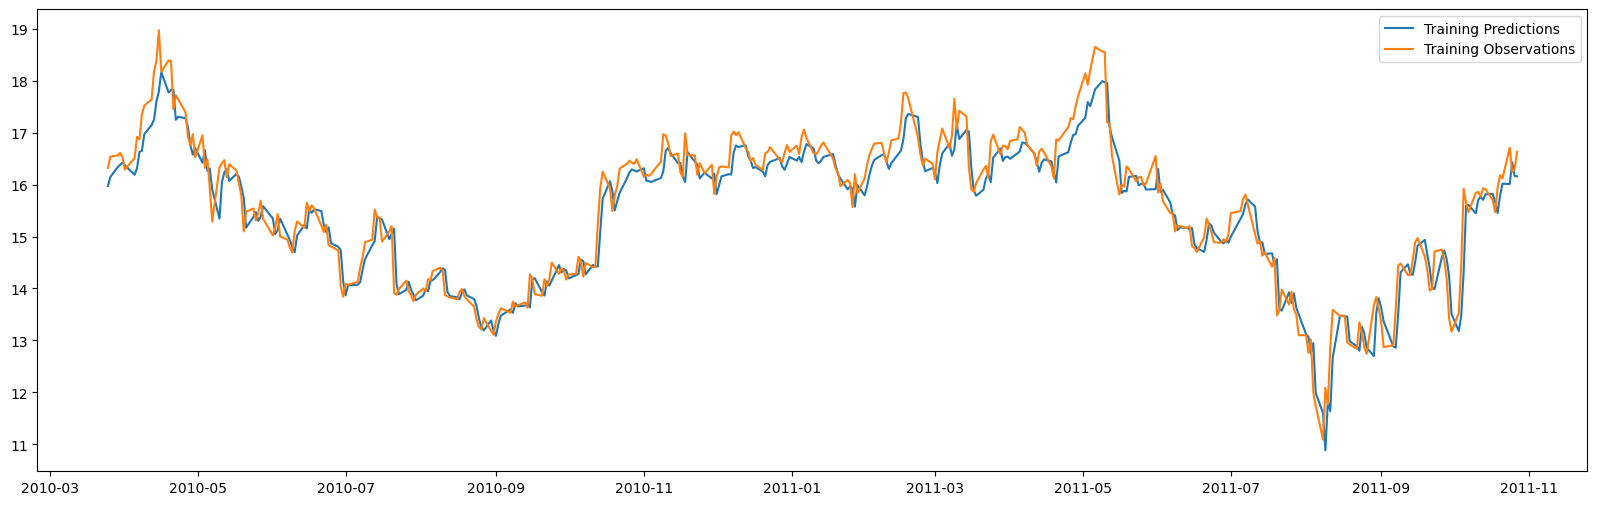

In [211]:
train_predictions_adjusted = best_model.predict(X_train_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_train_adjusted, train_predictions_adjusted)
plt.plot(dates_train_adjusted, y_train_adjusted)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 3ms/step


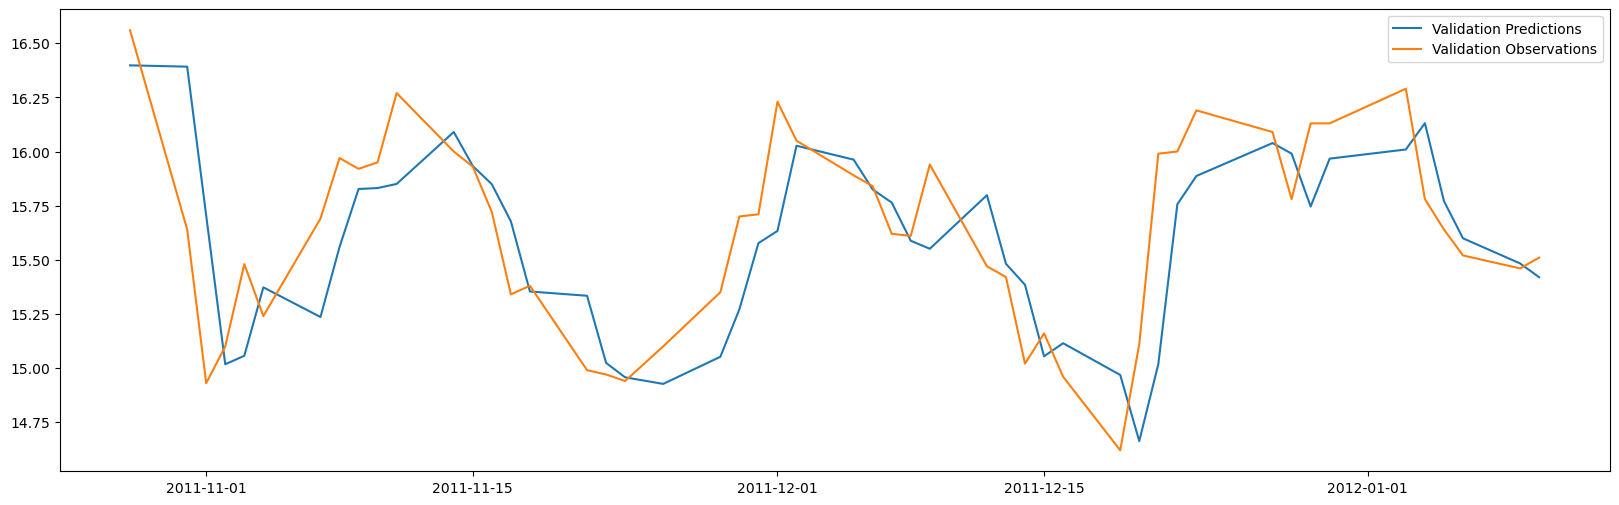

In [212]:
val_predictions_adjusted = best_model.predict(X_val_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_val_adjusted, val_predictions_adjusted)
plt.plot(dates_val_adjusted, y_val_adjusted)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 3ms/step


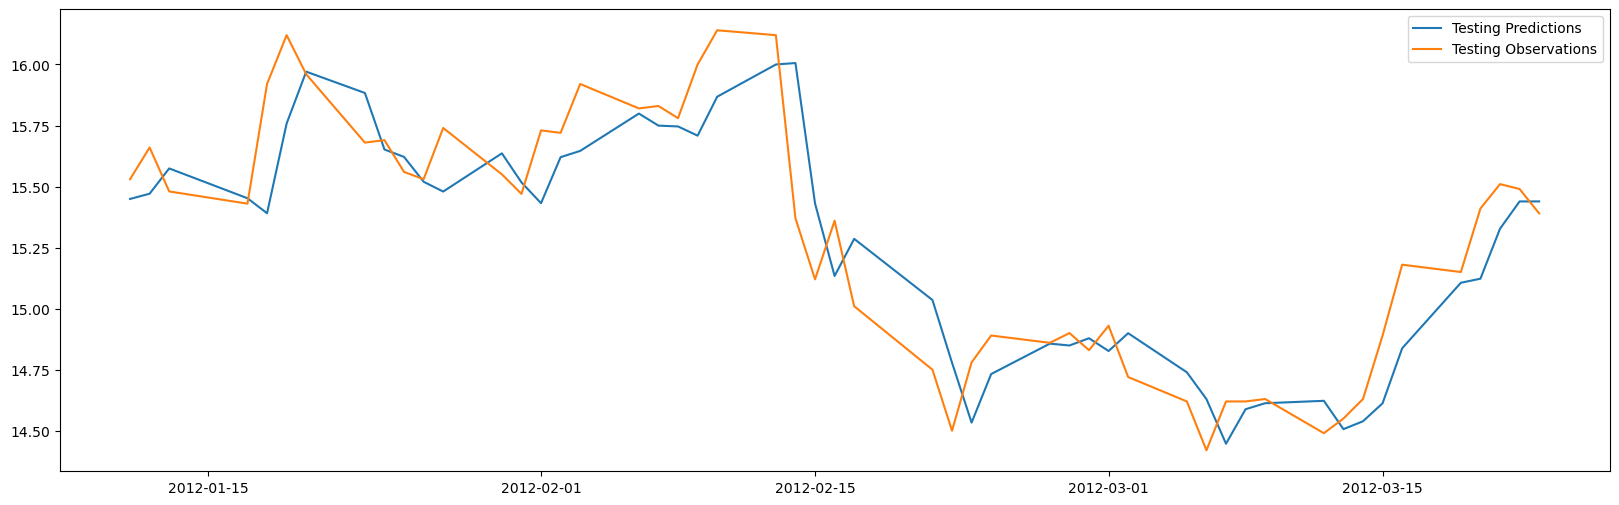

In [213]:
test_predictions_adjusted = best_model.predict(X_test_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_test_adjusted, test_predictions_adjusted)
plt.plot(dates_test_adjusted, y_test_adjusted)
plt.legend(['Testing Predictions', 'Testing Observations'])

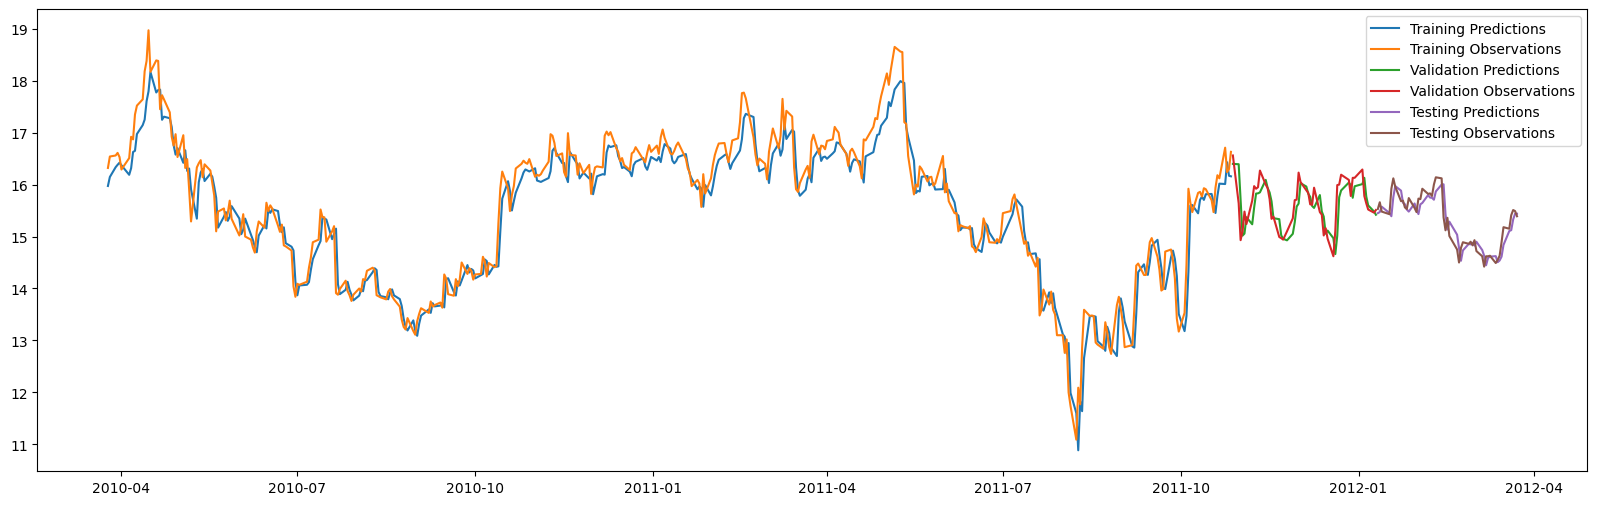

In [214]:
plt.figure(figsize = (20, 6))
plt.plot(dates_train_adjusted, train_predictions_adjusted)
plt.plot(dates_train_adjusted, y_train_adjusted)
plt.plot(dates_val_adjusted, val_predictions_adjusted)
plt.plot(dates_val_adjusted, y_val_adjusted)
plt.plot(dates_test_adjusted, test_predictions_adjusted)
plt.plot(dates_test_adjusted, y_test_adjusted)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [215]:
# RMSE hesaplama
squared_errors = (np.concatenate((y_train_adjusted, y_val_adjusted, y_test_adjusted)) - np.concatenate((train_predictions_adjusted, val_predictions_adjusted, test_predictions_adjusted))) ** 2
mean_squared_error_value = np.mean(squared_errors)
rmse_value_LSTM = np.sqrt(mean_squared_error_value)

print("RMSE Value: {0}".format(rmse_value_LSTM))

RMSE Value: 0.35894837975502014


In [216]:
print("Accuracy score of the predictions: {0}".format(r2_score(np.concatenate((y_train_adjusted, y_val_adjusted, y_test_adjusted)), np.concatenate((train_predictions_adjusted, val_predictions_adjusted, test_predictions_adjusted)))))


Accuracy score of the predictions: 0.9209757032036832


**RESULT**

Exponential Linear Unit (ELU) is one of the artificial neural network (ANN) activation functions and can often be used with more complex or diverse types of data types. Some usage scenarios of the ELU activation function could be:

- **Numeric Data:** The ELU activation function can be used when working with numerical data. It may be particularly suitable for regression problems or numerical predictions.

- **Image Data:** In image processing applications, the ELU activation function can be used. It can be especially useful for more complex image analysis or marking tasks.

- **Text Data:** The ELU activation function can also be used in text processing applications. Text data is often processed in natural language processing (NLP) problems, and ELU can be used when processing such data.

- **Burst Time Data:** Burst time data is another type of data for which you can use the ELU activation function. For time series analysis and forecasting this function can be useful.

The ELU activation function has some advantages over other activation functions, especially sigmoid or ReLU. For example, where ReLU might cause some training problems because its derivative is zero for inputs greater than zero, ELU can overcome this problem. However, which activation function to use depends on the characteristics of your data set and the problem you are trying to solve, so it should be chosen carefully.

ELU is suitable for our dataset and can be used.
As a result, we can use the ELU activation function when necessary. According to our analysis, it is more appropriate to use the ReLu activation function.

#### Gated Recurrent Unit (GRU) Activation Function

**What is GRU?**

GRU has a structure that includes mechanisms such as input gate and forget gate, and these mechanisms are used to control the data flow and hide or discard important information. These gating mechanisms of GRU can reduce overfitting and provide better training results with the ability to learn dependencies over longer time intervals.

The GRU cell often contains activation functions such as sigmoid and tanh, but is not itself an activation function. GRU has a similar structure to more complex LSTM (Long Short-Term Memory) cells, but has fewer parameters and can be trained faster in some cases.

As a result, GRU is a type of RNN cell and contains activation functions, but is not itself an activation function.


The Gated Recurrent Unit (GRU) is a type of recurrent neural network (RNN) architecture commonly used in machine learning for sequential data tasks. The GRU has a unique structure compared to traditional RNNs and uses gating mechanisms to control the flow of information through the network.

The primary components of a GRU cell are the following:

- **Reset Gate:** The reset gate is responsible for deciding which information from the previous time step should be discarded (reset) and which information should be passed through to the current time step. It takes the output from the previous time step and the current input and produces values between 0 and 1. Mathematically, the reset gate is computed using a sigmoid activation function.

- **Update Gate:** The update gate determines how much of the new input and the previous memory cell state should be combined to create the current memory cell state. Like the reset gate, it uses a sigmoid activation function to produce values between 0 and 1.

- **Candidate Memory Cell State:** This is an intermediate step that calculates a candidate memory cell state based on the current input and the reset gate. It uses a tanh (hyperbolic tangent) activation function, which produces values between -1 and 1.

- **Current Memory Cell State:** The current memory cell state is a combination of the previous memory cell state and the candidate memory cell state, weighted by the update gate. It calculates the new memory cell state that will be passed to the next time step.

- **Output:** The final output is produced based on the current memory cell state. The output can be used for making predictions or for other tasks in the neural network.

In summary, the activation functions used in a GRU cell are the sigmoid activation function for the reset gate and the update gate, as well as the hyperbolic tangent (tanh) activation function for the candidate memory cell state. These activation functions help control the flow of information and gradients through the network, allowing the GRU to capture long-range dependencies in sequential data while mitigating the vanishing gradient problem that can affect traditional RNNs.

Aditionally, Since it is especially compatible with numerical data, it will be compatible with our data set and will make predictions close to the real values.

In [217]:
best_hyperparameters = None
best_model = None
def build_model(hp):
    model = Sequential()
    model.add(layers.Input((3, 1)))
    model.add(layers.GRU(64, activation='tanh', recurrent_activation='sigmoid'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    
    # Tune edilecek hiperparametreler ve değer aralıkları
    hp_learning_rate = hp.Choice('learning_rate', values=[0.0001, 0.001, 0.01, 0.1])
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adagrad', 'nadam'])
    
    model.compile(loss='mse', optimizer=hp_optimizer, metrics=['mean_absolute_error'])
    
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=100,  # Denenecek farklı hiperparametre kombinasyonlarının sayısı
    directory='random_search',
    project_name='my_model')

# Modeli arama işlemi başlatın
tuner.search(X_train_adjusted, y_train_adjusted, validation_data=(X_val_adjusted, y_val_adjusted), epochs=100)

# En iyi hiperparametreleri ve modeli alın
best_hyperparameters = tuner.get_best_hyperparameters()[0]
best_model = tuner.hypermodel.build(best_hyperparameters)

# Eğitim işlemi
best_model.fit(X_train_adjusted, y_train_adjusted, validation_data=(X_val_adjusted, y_val_adjusted), epochs=100)

# En iyi hiperparametreleri ve modeli yazdırın
print("En iyi hiperparametreler:")
print(best_hyperparameters.values)
print("\nEn iyi model özeti:")
best_model.summary()


Reloading Tuner from random_search\my_model\tuner0.json
Epoch 1/100
13/13 [==============================] - 2s 40ms/step - loss: 126.1181 - mean_absolute_error: 10.9817 - val_loss: 54.0835 - val_mean_absolute_error: 7.3410
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 25.4906 - mean_absolute_error: 4.5264 - val_loss: 3.3427 - val_mean_absolute_error: 1.7732
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 2.7302 - mean_absolute_error: 1.3808 - val_loss: 0.2397 - val_mean_absolute_error: 0.4153
Epoch 4/100
13/13 [==============================] - 0s 9ms/step - loss: 1.9840 - mean_absolute_error: 1.1880 - val_loss: 0.3750 - val_mean_absolute_error: 0.5186
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 1.9083 - mean_absolute_error: 1.1673 - val_loss: 0.2686 - val_mean_absolute_error: 0.4386
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 1.5175 - mean_absolute_error: 1.0279 - val_loss: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.2696 - mean_absolute_error: 0.4194 - val_loss: 0.0937 - val_mean_absolute_error: 0.2313
En iyi hiperparametreler:
{'learning_rate': 0.1, 'optimizer': 'rmsprop'}

En iyi model özeti:
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 64)                12864     
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16033 (62.63 KB)
Trainable params: 16033 (62.63 KB)
Non-tr

13/13 [==============================] - 0s 2ms/step


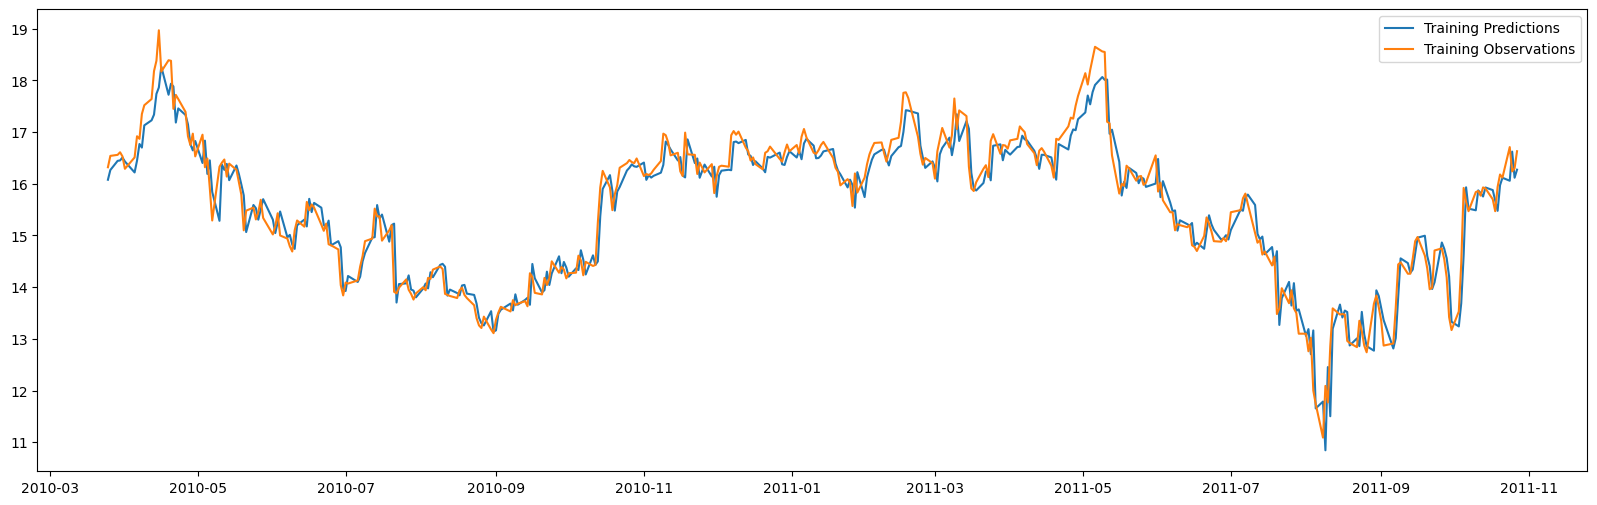

In [218]:
train_predictions_adjusted = best_model.predict(X_train_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_train_adjusted, train_predictions_adjusted)
plt.plot(dates_train_adjusted, y_train_adjusted)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 3ms/step


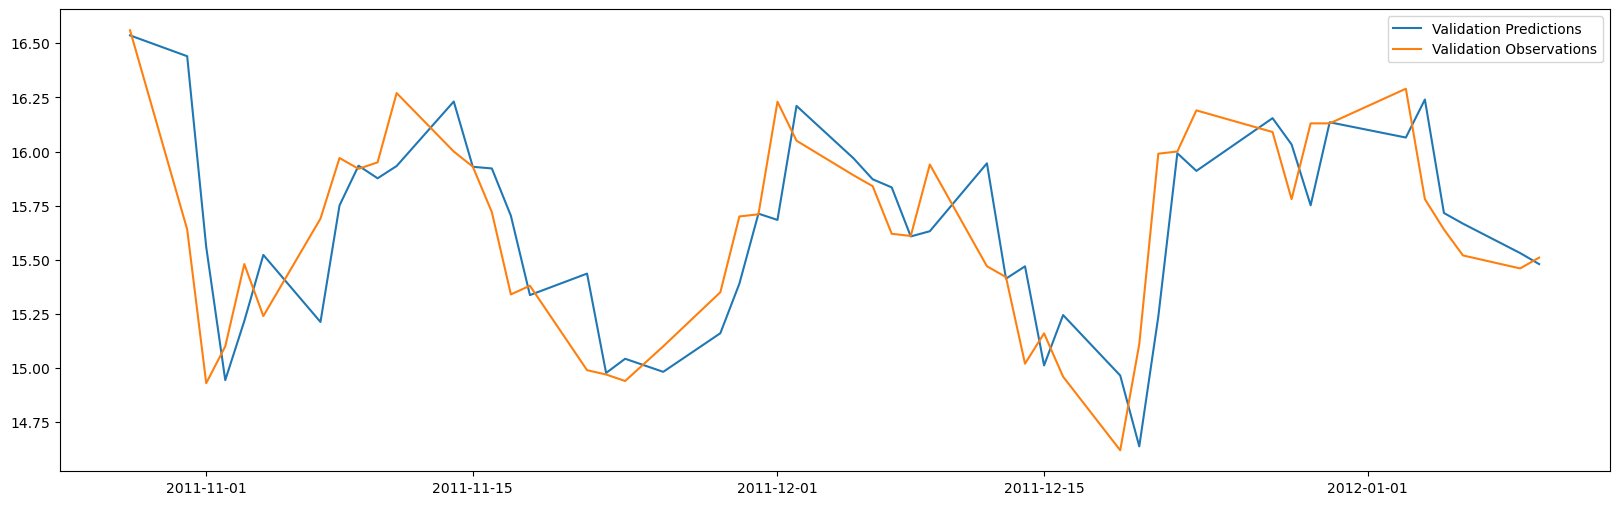

In [219]:
val_predictions_adjusted = best_model.predict(X_val_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_val_adjusted, val_predictions_adjusted)
plt.plot(dates_val_adjusted, y_val_adjusted)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 3ms/step


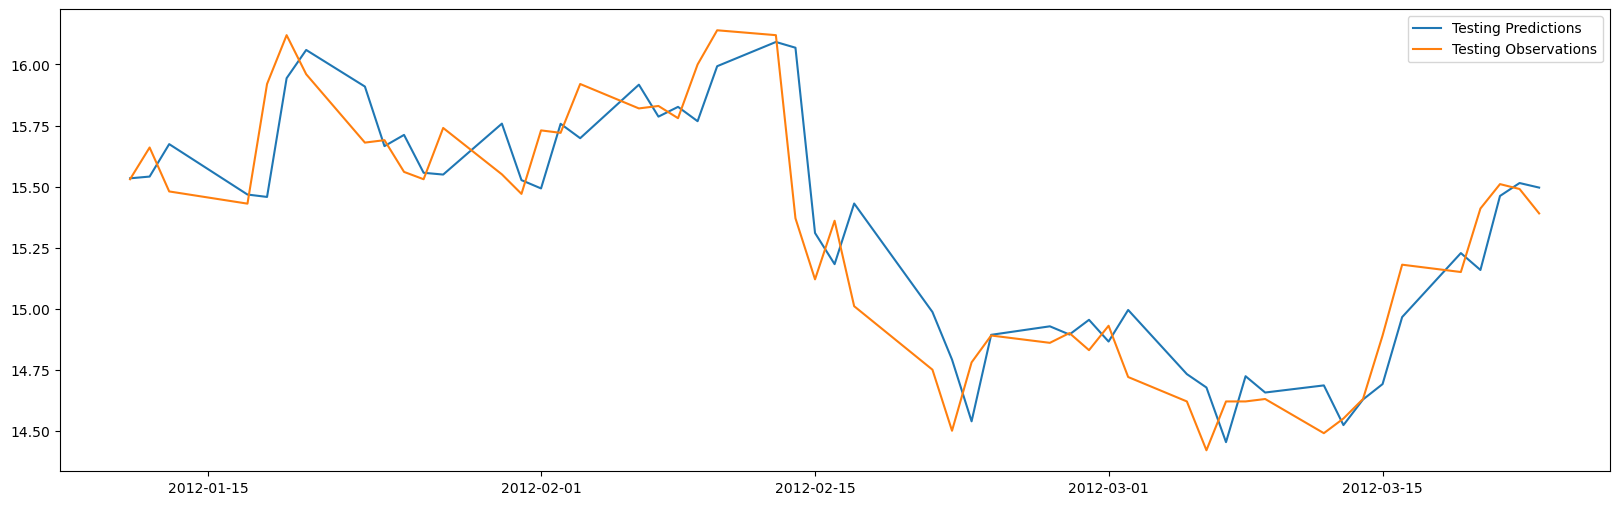

In [220]:
test_predictions_adjusted = best_model.predict(X_test_adjusted).flatten()
plt.figure(figsize = (20, 6))
plt.plot(dates_test_adjusted, test_predictions_adjusted)
plt.plot(dates_test_adjusted, y_test_adjusted)
plt.legend(['Testing Predictions', 'Testing Observations'])

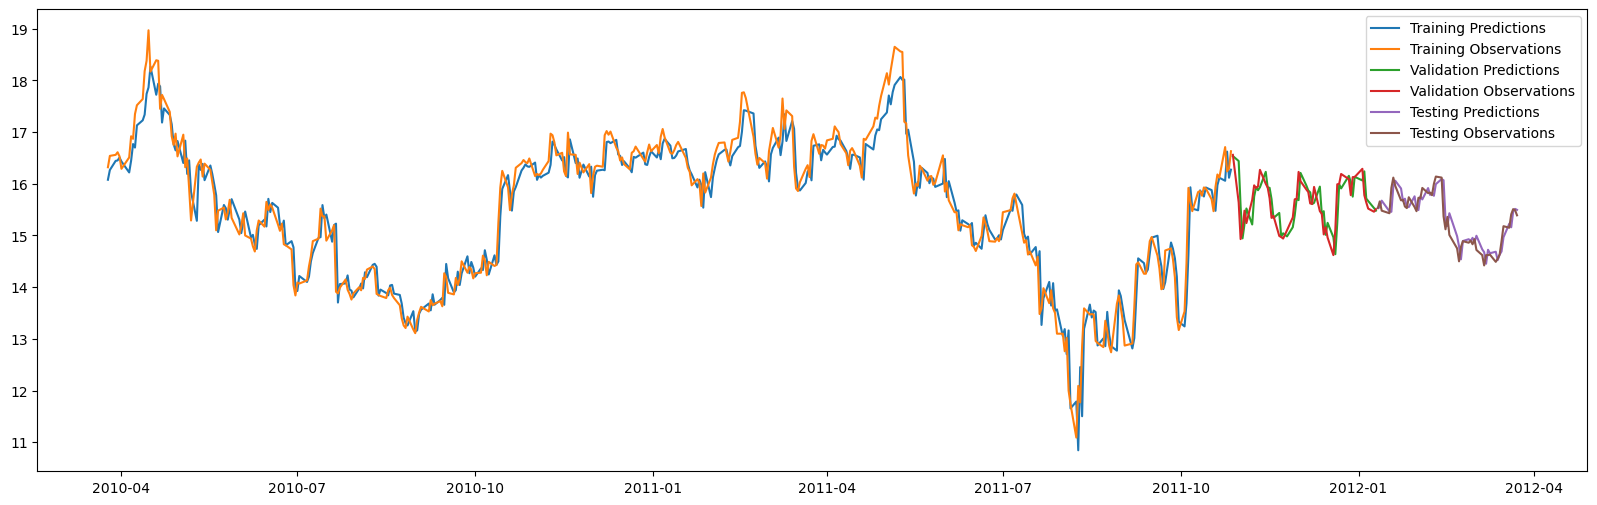

In [221]:
plt.figure(figsize = (20, 6))
plt.plot(dates_train_adjusted, train_predictions_adjusted)
plt.plot(dates_train_adjusted, y_train_adjusted)
plt.plot(dates_val_adjusted, val_predictions_adjusted)
plt.plot(dates_val_adjusted, y_val_adjusted)
plt.plot(dates_test_adjusted, test_predictions_adjusted)
plt.plot(dates_test_adjusted, y_test_adjusted)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [222]:
# RMSE hesaplama
squared_errors = (np.concatenate((y_train_adjusted, y_val_adjusted, y_test_adjusted)) - np.concatenate((train_predictions_adjusted, val_predictions_adjusted, test_predictions_adjusted))) ** 2
mean_squared_error_value = np.mean(squared_errors)
rmse_value_LSTM = np.sqrt(mean_squared_error_value)

print("RMSE Value: {0}".format(rmse_value_LSTM))

RMSE Value: 0.34029072523117065


In [223]:
print("Accuracy score of the predictions: {0}".format(r2_score(np.concatenate((y_train_adjusted, y_val_adjusted, y_test_adjusted)), np.concatenate((train_predictions_adjusted, val_predictions_adjusted, test_predictions_adjusted)))))


Accuracy score of the predictions: 0.9289773584771112


**RESULT**

Classes of recurrence neural networks (RNNs), such as Gated Recurrent Unit (GRU) and Long Short-Term Memory (LSTM), are widely used for modeling on sequential data such as time series.
As a result, the RMSE value of 0.34029072523117065 seems to indicate that you have created a successful forecasting model.

And new york stock price is sequential data containing time series and therefore uses the ReLu activation code in its algorithm. Therefore, it is one of the Activation codes that best suits our data s

# Overview and Discussion results

GRU has a structure that includes mechanisms such as input gate and forget gate, and these mechanisms are used to control the data flow and hide or discard important information. These gating mechanisms of GRU can reduce overfitting and provide better training results with the ability to learn dependencies over longer time intervals.

The GRU cell often contains activation functions such as sigmoid and tanh, but is not itself an activation function. GRU has a similar structure to more complex LSTM (Long Short-Term Memory) cells, but has fewer parameters and can be trained faster in some cases.

As a result, GRU is a type of RNN cell and contains activation functions, but is not itself an activation function.

The Gated Recurrent Unit (GRU) is a type of recurrent neural network (RNN) architecture commonly used in machine learning for sequential data tasks. The GRU has a unique structure compared to traditional RNNs and uses gating mechanisms to control the flow of information through the network.

- **ReLu Activation Function:** RMSE Value: 0.3397522270679474
- **Gated Recurrent Unit (GRU) Activation Function: RMSE Value:** 0.34029072523117065
- **Exponential Linear Unit (ELU) Activation Function: RMSE Value:** 0.35894837975502014
- **Leaky Rectified Linear Unit (Leaky ReLU) Activation Function:** RMSE Value: 0.46096888184547424
- **Sigmoid Activation Function:** RMSE Value: 0.5253307223320007
- **Hyperbolic Tangent Activation Function:** RMSE Value: 1.2772005796432495

--------------------------------------------------------------------------------------------------------------------------------

- **ReLu Activation Function:** Accuracy score of the predictions: 0.9292019624409587
- **Gated Recurrent Unit (GRU) Activation Function:** Accuracy score of the predictions: 0.9289773584771112
- **Exponential Linear Unit (ELU) Activation Function:** Accuracy score of the predictions: 0.9209757032036832
- **Leaky Rectified Linear Unit (Leaky ReLU) Activation Function:** Accuracy score of the predictions: 0.8696713782324905
- **Sigmoid Activation Function:** Accuracy score of the predictions: 0.830736956872557
- **Hyperbolic Tangent Activation Function:** Accuracy score of the predictions: -0.0004947348408372854

--------------------------------------------------------------------------------------------------------------------------------

Considering the data we have, using ReLu for the LSTM model is the most appropriate option. However, GRU can also be preferred because it is a method that uses various activation codes and provides development opportunities. According to the results we have now, GRU and ReLu should be preferred. Various development methods should be tried and cross-compared to make the final decision.



# Team Members

### Anil Erman                        - 5005026
### Asha Babu                        - 5006025
### Aswin Purathoottu Sibi    - 5006110